In [1]:
import networkx as nx
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
from operator import itemgetter
from IPython.display import display
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

from IPython.display import Markdown
def print_markdown(string):
    display(Markdown(string))
def printmd(string):
    display(Markdown(string))
    
img_counter = 23 # useful to save images
img_dir = 'images/' # useful to save images
image_format = 'pdf' # useful to save images

# Graph coloring in a simple line graph

In [2]:
n_nodes = 10

In [3]:
nodes = list(range(1, n_nodes+1))
printmd("$\mathcal{V} = $")
print(nodes)

$\mathcal{V} = $

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [4]:
edges = [(i,i+1) for i in nodes[:n_nodes-1]]

In [5]:
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

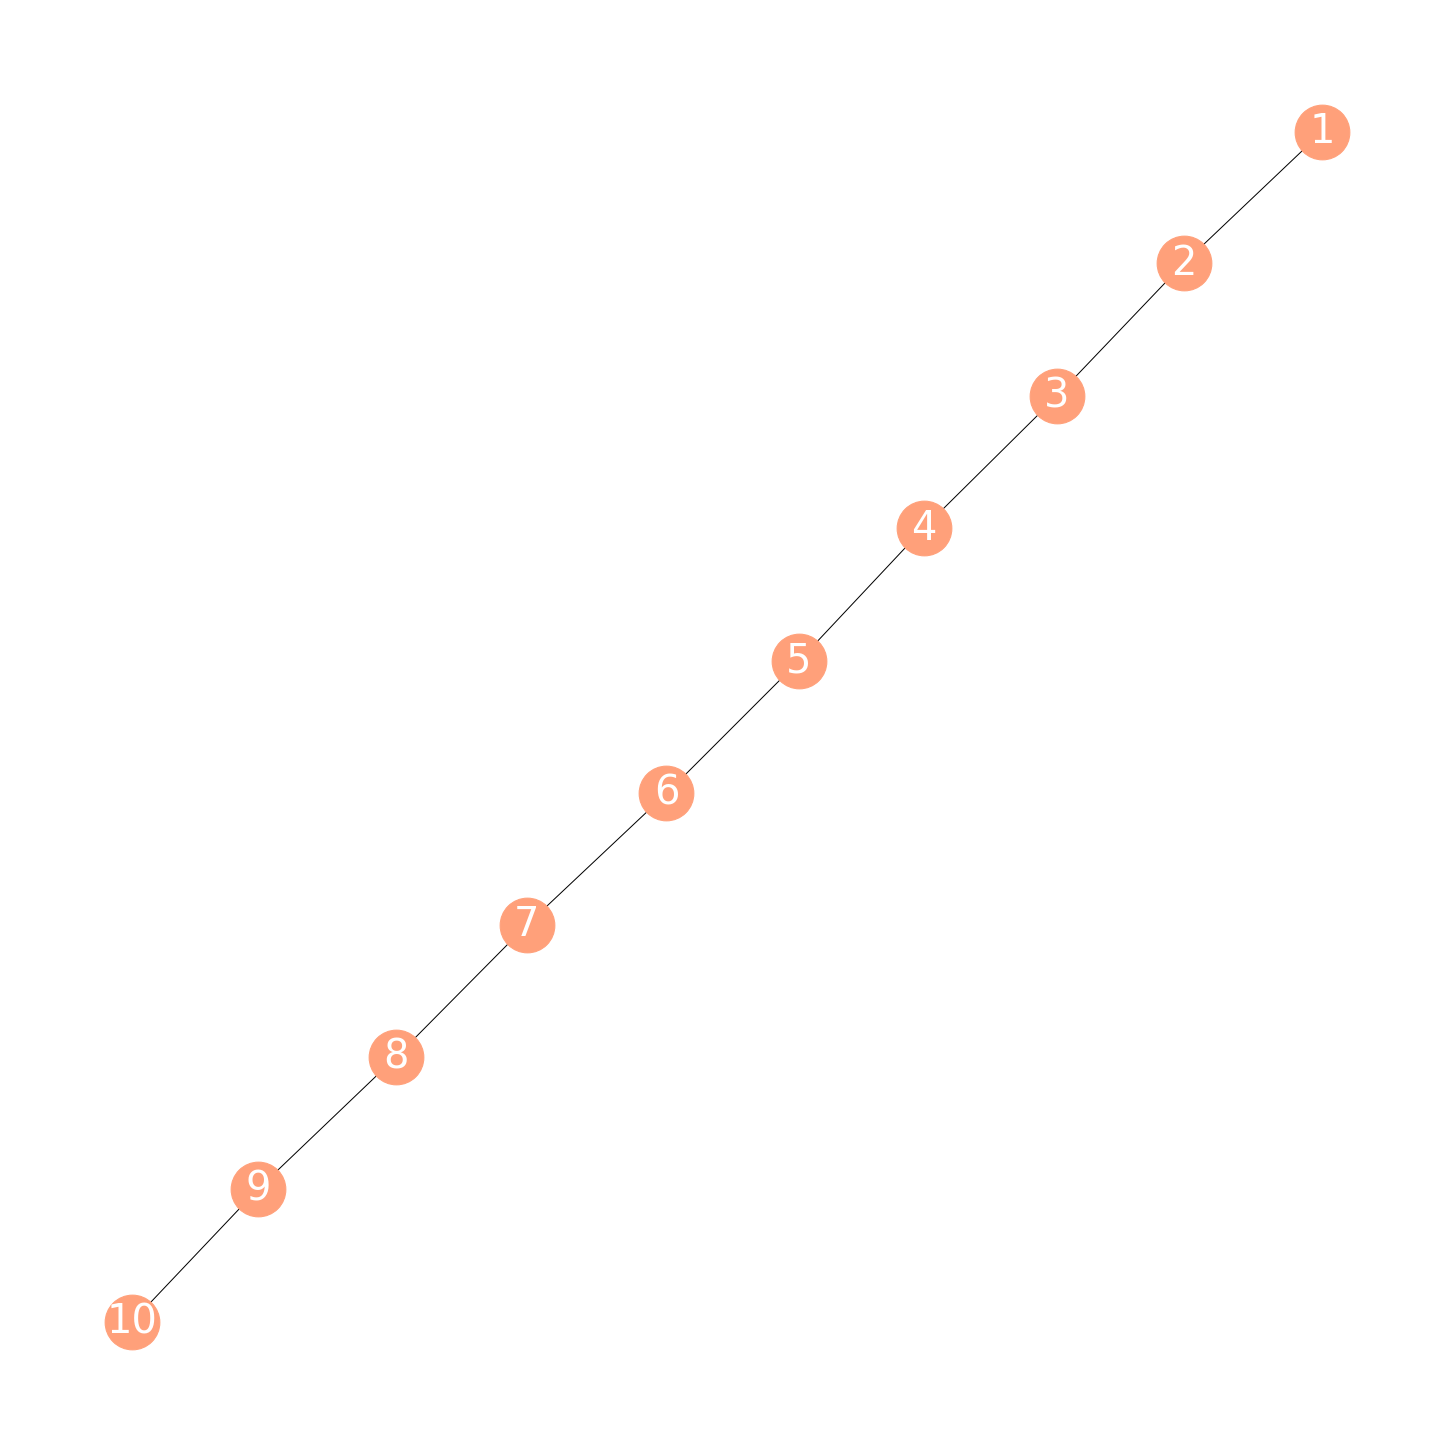

In [6]:
fig = plt.figure(figsize=(20, 20))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos, node_color='#FFA07A', arrowsize=30, node_size=3000, font_size=40, font_color='white', with_labels=True)
fig.savefig(img_dir + 'img ' + str(img_counter) + '.' + image_format, format=image_format)
img_counter += 1

In [7]:
C = {}
C['red'] = 0
C['green'] = 1
printmd("$\mathcal{C}$=")
for c in C:
    print(c + ": " + str(C[c]))
    
# Computes the inverse of the noise as a function of time t.
# It returns a tuple (val,descr) where 'val' is a float representing the value computed and 'descr' is a string useful to describe how the function works.
def inv_noise(t=0):
    return t/100, 't/100'

# Compute the cost as a function of 2 states: s and t
# It returns the value computed.
def cost(s,t):
    if t==s:
        return 1
    return 0

printmd("Inverse noise $\eta(t) = " + inv_noise()[1] + "$")

$\mathcal{C}$=

red: 0
green: 1


Inverse noise $\eta(t) = t/100$

In [8]:
# Computes the potential of a configuration 'conf', given the graph whose adjacency matrix is W and the cost function 'costf'
def potential(conf, W, costf):
    return 0.5 * (W.reshape(W.shape[0]*W.shape[1]) @ np.array([costf(conf[i],conf[j]) for i in range(W.shape[0]) for j in range(W.shape[0])]))

In [9]:
# Adjacency matrix
W = nx.convert_matrix.to_numpy_array(G)

## Dynamics simulation

In [10]:
initial_configuration = ['red'] * n_nodes

In [11]:
# Simulates the learning dynamics on an unweighted graph whith adjacency matrix W.
# Time is discrete, from 0 to 't_final'.
# 'C': dictionary with possible states.
# 'initial_configuration': initial configuration at time 0, list of strings representing states of nodes
# 'eta': function to determine the inverse of the noise at time t. 'eta' is the name of the function, whose parameter is t and return value is a tuple, whose element in pos 0 is the inverse of the noise at time t.
# 'costf': function to determine the cost, given two states. 'cost' is the name of the function, whose parameters are s and t (1st and second state) and return value is the cost value.

# It returns a matrix such that:
# each row i represents the state of each node at time i.
# each column j represents the state of node j.

def simulate(C, W, initial_configuration, eta, costf, t_final = 30):
    
    n_nodes = W.shape[0]
    
    # store the ids of visited configurations, describing the state of each node
    states = np.zeros((t_final+1, n_nodes), dtype=int)
    # initial configuration set according to 'initial_configuration'
    states[0] = np.array([C[s] for s in initial_configuration])
    
    
    # for each step of the simulation
    for t in range(1,t_final+1): # for each unit of time
        # choose a node
        node = np.random.choice(n_nodes, 1)[0]
        
        probs = np.zeros(len(C))
        for pos, a in enumerate(C.values()): # for each possible state 'a'
            # calculate probability for node 'node' to update its state to 'a'
            costs = np.array([costf(a,x) for x in states[t-1]])
            probs[pos] = np.exp(-eta(t)[0]*(W[node]@costs))
        probs = probs/np.sum(probs)
        
         # all nodes expect 'node' don't update their state
        states[t] = states[t-1]
        # 'node' node update its state based on 'probs'
        new_state = np.random.choice(list(C.values()), 1, p=probs)[0]
        states[t, node] = new_state
       
            
    return states

In [12]:
t_final = 40

# run 1 simulation and plot state values at each time unit.
states = simulate(C, W, initial_configuration, inv_noise, cost, t_final)
C_rev = dict((v,k) for k,v in C.items())
for t in range(0,t_final+1):
    x = states[t]
    pot = potential(x, W, cost)
    print("Time unit " + str(t))
    print("Configuration:")
    df = pd.DataFrame(data=[C_rev[z] for z in x], index=np.arange(1, len(G)+1), columns=['state']) # nodes start from 0
    df.index.name = 'node'
    display(df)
    print("POTENTIAL:", pot)
    print("\n")

Time unit 0
Configuration:


,state
node,
1,red
2,red
3,red
4,red
5,red
6,red
7,red
8,red
9,red


POTENTIAL: 9.0


Time unit 1
Configuration:


,state
node,
1,red
2,red
3,red
4,red
5,red
6,red
7,red
8,red
9,green


POTENTIAL: 7.0


Time unit 2
Configuration:


,state
node,
1,red
2,red
3,red
4,red
5,red
6,green
7,red
8,red
9,green


POTENTIAL: 5.0


Time unit 3
Configuration:


,state
node,
1,red
2,red
3,red
4,green
5,red
6,green
7,red
8,red
9,green


POTENTIAL: 3.0


Time unit 4
Configuration:


,state
node,
1,red
2,red
3,red
4,green
5,red
6,green
7,green
8,red
9,green


POTENTIAL: 3.0


Time unit 5
Configuration:


,state
node,
1,red
2,red
3,red
4,green
5,red
6,green
7,green
8,red
9,green


POTENTIAL: 3.0


Time unit 6
Configuration:


,state
node,
1,red
2,red
3,red
4,green
5,red
6,green
7,green
8,red
9,green


POTENTIAL: 3.0


Time unit 7
Configuration:


,state
node,
1,red
2,red
3,red
4,green
5,red
6,green
7,green
8,red
9,green


POTENTIAL: 3.0


Time unit 8
Configuration:


,state
node,
1,red
2,red
3,red
4,green
5,red
6,green
7,green
8,red
9,green


POTENTIAL: 3.0


Time unit 9
Configuration:


,state
node,
1,red
2,red
3,red
4,green
5,red
6,green
7,green
8,red
9,green


POTENTIAL: 3.0


Time unit 10
Configuration:


,state
node,
1,red
2,red
3,red
4,green
5,green
6,green
7,green
8,red
9,green


POTENTIAL: 5.0


Time unit 11
Configuration:


,state
node,
1,red
2,red
3,red
4,green
5,green
6,green
7,green
8,red
9,green


POTENTIAL: 5.0


Time unit 12
Configuration:


,state
node,
1,red
2,red
3,red
4,green
5,green
6,green
7,red
8,red
9,green


POTENTIAL: 5.0


Time unit 13
Configuration:


,state
node,
1,red
2,red
3,red
4,green
5,green
6,green
7,red
8,red
9,green


POTENTIAL: 5.0


Time unit 14
Configuration:


,state
node,
1,red
2,red
3,red
4,green
5,green
6,green
7,red
8,red
9,green


POTENTIAL: 5.0


Time unit 15
Configuration:


,state
node,
1,red
2,red
3,red
4,green
5,green
6,green
7,red
8,red
9,green


POTENTIAL: 6.0


Time unit 16
Configuration:


,state
node,
1,red
2,red
3,red
4,green
5,green
6,green
7,red
8,green
9,green


POTENTIAL: 6.0


Time unit 17
Configuration:


,state
node,
1,red
2,red
3,red
4,green
5,green
6,green
7,red
8,green
9,green


POTENTIAL: 6.0


Time unit 18
Configuration:


,state
node,
1,red
2,green
3,red
4,green
5,green
6,green
7,red
8,green
9,green


POTENTIAL: 4.0


Time unit 19
Configuration:


,state
node,
1,red
2,green
3,red
4,green
5,green
6,red
7,red
8,green
9,green


POTENTIAL: 4.0


Time unit 20
Configuration:


,state
node,
1,red
2,green
3,green
4,green
5,green
6,red
7,red
8,green
9,green


POTENTIAL: 6.0


Time unit 21
Configuration:


,state
node,
1,red
2,green
3,green
4,green
5,green
6,red
7,red
8,green
9,green


POTENTIAL: 6.0


Time unit 22
Configuration:


,state
node,
1,red
2,green
3,green
4,green
5,green
6,red
7,red
8,green
9,green


POTENTIAL: 6.0


Time unit 23
Configuration:


,state
node,
1,red
2,green
3,green
4,green
5,green
6,red
7,red
8,green
9,green


POTENTIAL: 6.0


Time unit 24
Configuration:


,state
node,
1,red
2,green
3,green
4,green
5,red
6,red
7,red
8,green
9,green


POTENTIAL: 6.0


Time unit 25
Configuration:


,state
node,
1,red
2,green
3,green
4,red
5,red
6,red
7,red
8,green
9,green


POTENTIAL: 6.0


Time unit 26
Configuration:


,state
node,
1,red
2,green
3,green
4,red
5,red
6,red
7,red
8,green
9,green


POTENTIAL: 6.0


Time unit 27
Configuration:


,state
node,
1,red
2,green
3,green
4,red
5,red
6,red
7,red
8,green
9,green


POTENTIAL: 6.0


Time unit 28
Configuration:


,state
node,
1,red
2,green
3,green
4,red
5,red
6,red
7,red
8,green
9,green


POTENTIAL: 6.0


Time unit 29
Configuration:


,state
node,
1,red
2,green
3,green
4,red
5,red
6,red
7,red
8,green
9,green


POTENTIAL: 6.0


Time unit 30
Configuration:


,state
node,
1,red
2,green
3,green
4,red
5,red
6,red
7,red
8,green
9,green


POTENTIAL: 6.0


Time unit 31
Configuration:


,state
node,
1,green
2,green
3,green
4,red
5,red
6,red
7,red
8,green
9,green


POTENTIAL: 7.0


Time unit 32
Configuration:


,state
node,
1,green
2,green
3,green
4,red
5,green
6,red
7,red
8,green
9,green


POTENTIAL: 5.0


Time unit 33
Configuration:


,state
node,
1,green
2,green
3,green
4,red
5,green
6,red
7,red
8,green
9,green


POTENTIAL: 5.0


Time unit 34
Configuration:


,state
node,
1,red
2,green
3,green
4,red
5,green
6,red
7,red
8,green
9,green


POTENTIAL: 4.0


Time unit 35
Configuration:


,state
node,
1,red
2,green
3,green
4,red
5,green
6,red
7,red
8,green
9,green


POTENTIAL: 4.0


Time unit 36
Configuration:


,state
node,
1,red
2,green
3,green
4,red
5,green
6,red
7,green
8,green
9,green


POTENTIAL: 4.0


Time unit 37
Configuration:


,state
node,
1,red
2,green
3,green
4,red
5,green
6,red
7,green
8,green
9,green


POTENTIAL: 4.0


Time unit 38
Configuration:


,state
node,
1,red
2,green
3,green
4,red
5,green
6,red
7,green
8,green
9,green


POTENTIAL: 4.0


Time unit 39
Configuration:


,state
node,
1,red
2,green
3,green
4,red
5,green
6,red
7,green
8,green
9,green


POTENTIAL: 4.0


Time unit 40
Configuration:


,state
node,
1,red
2,green
3,green
4,red
5,green
6,red
7,green
8,green
9,green


POTENTIAL: 4.0




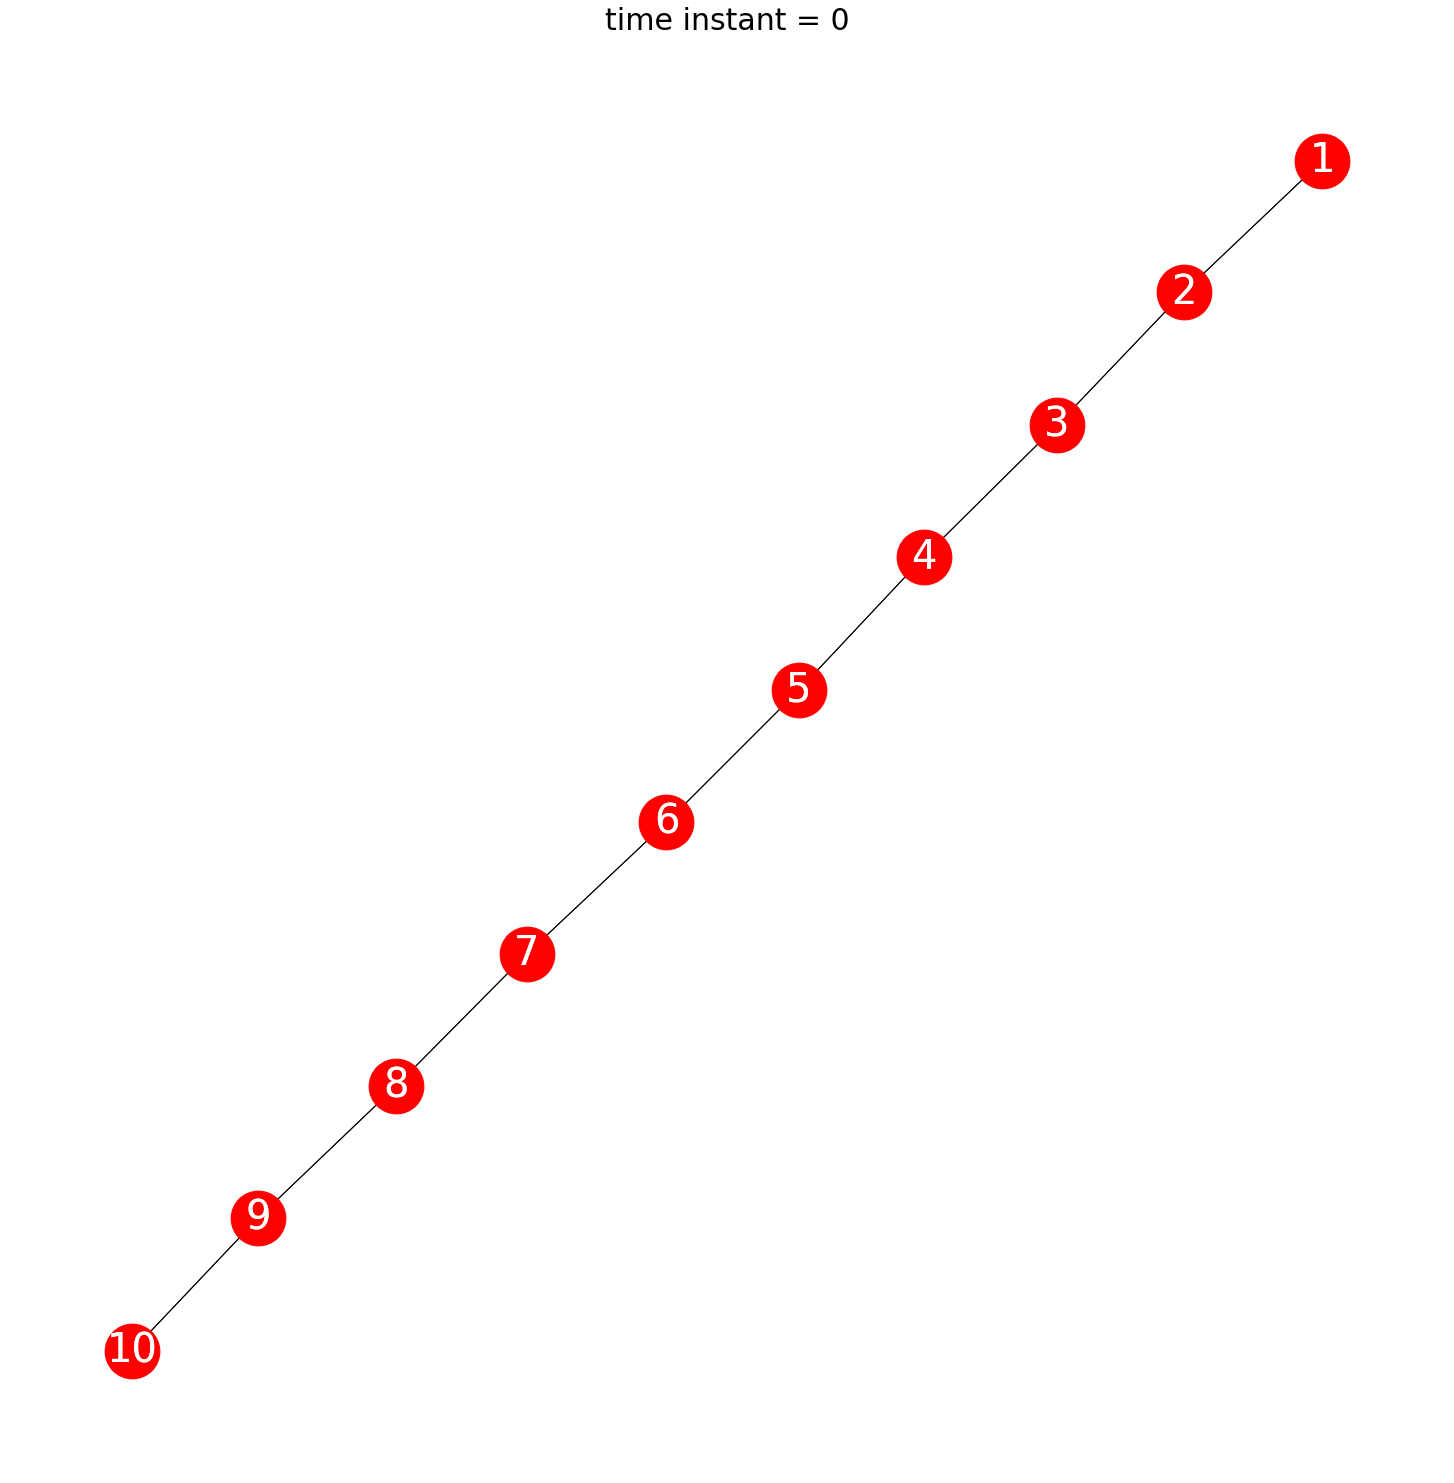

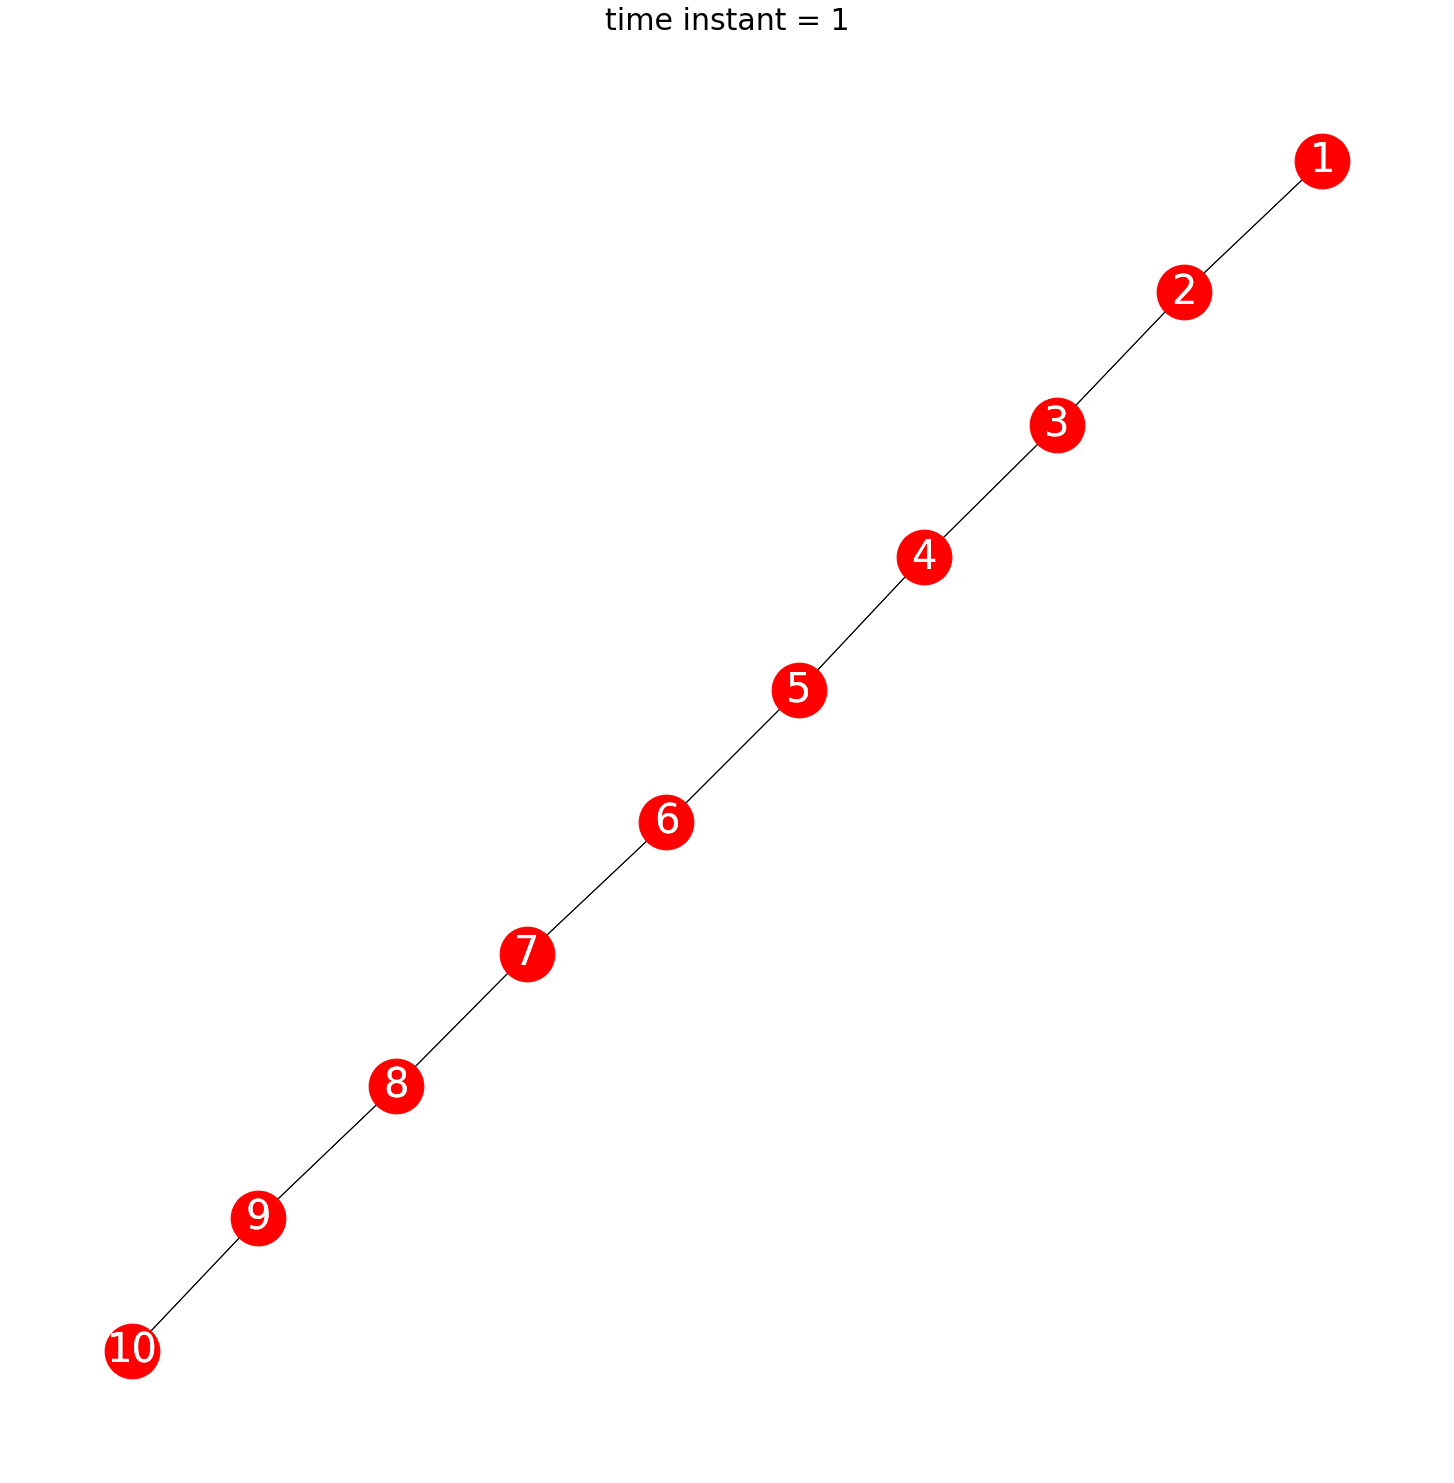

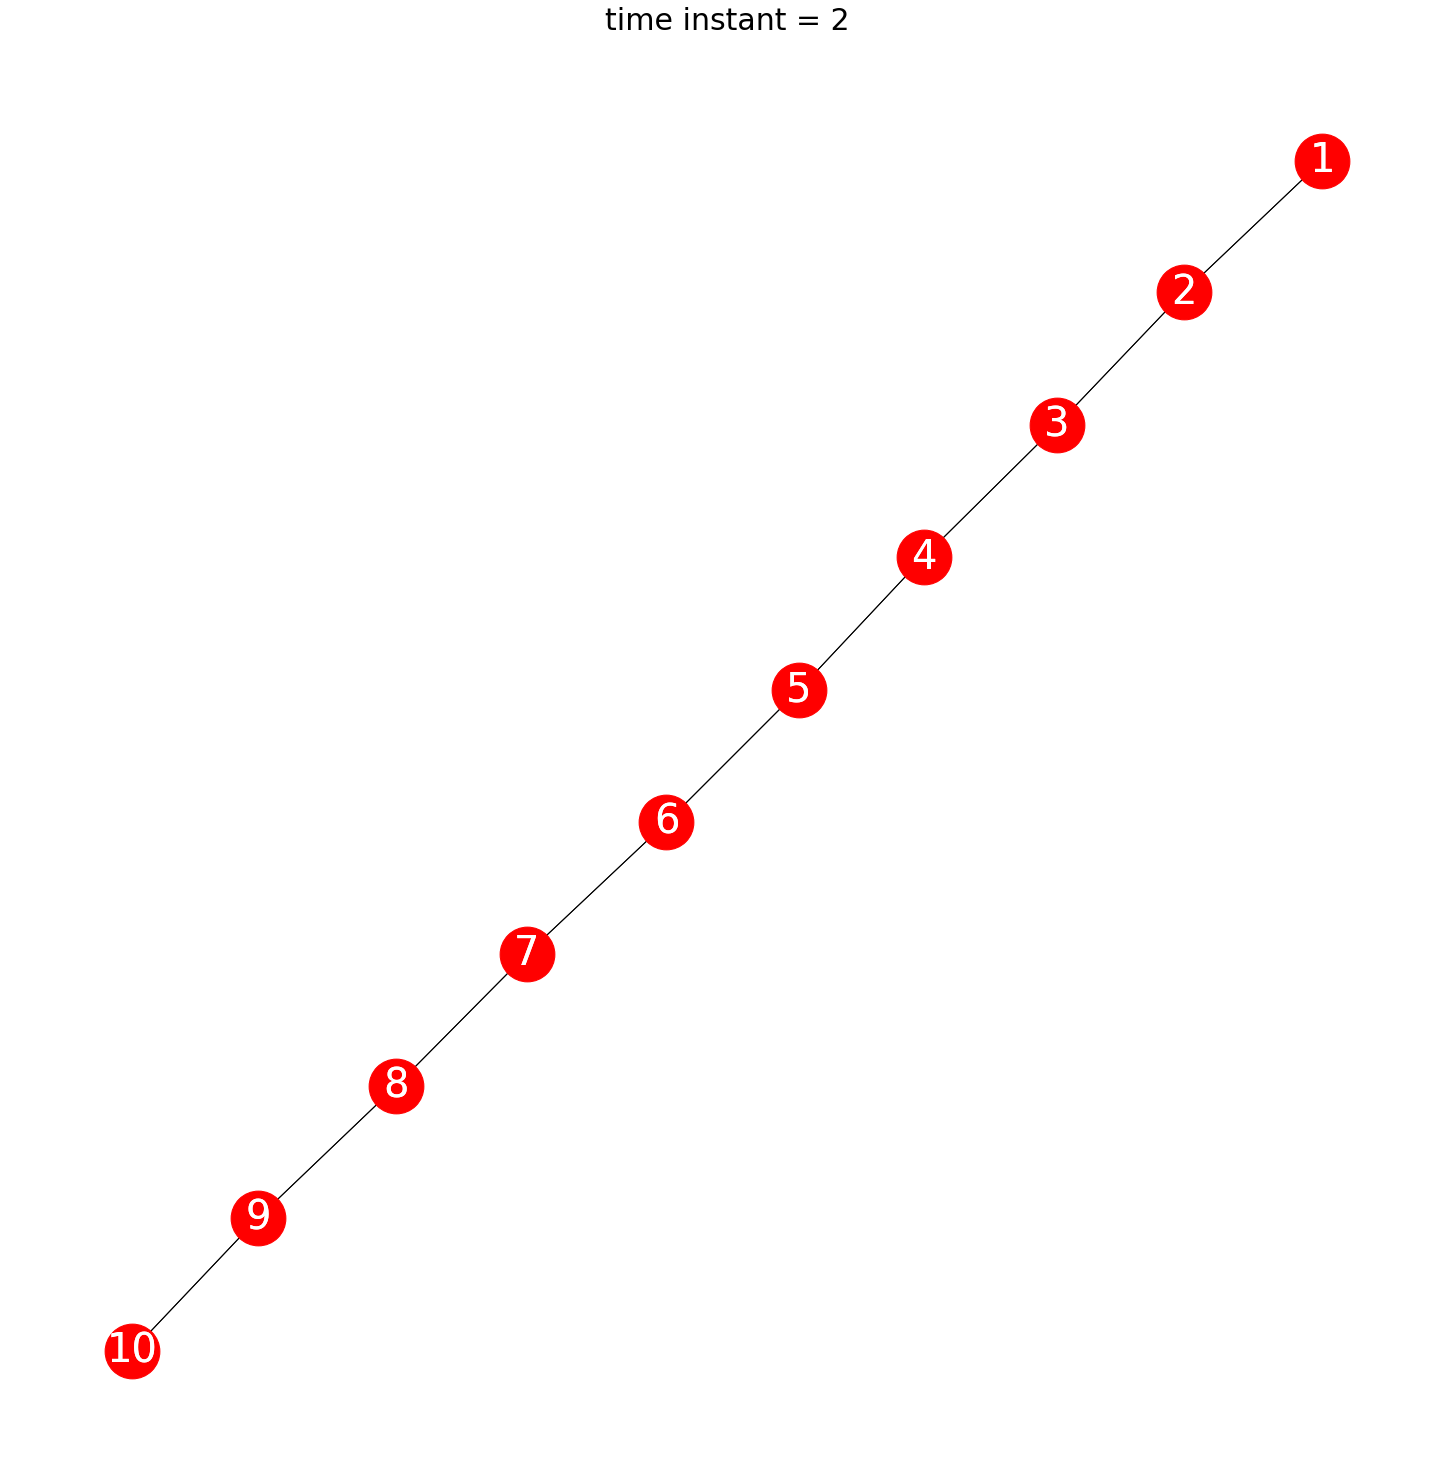

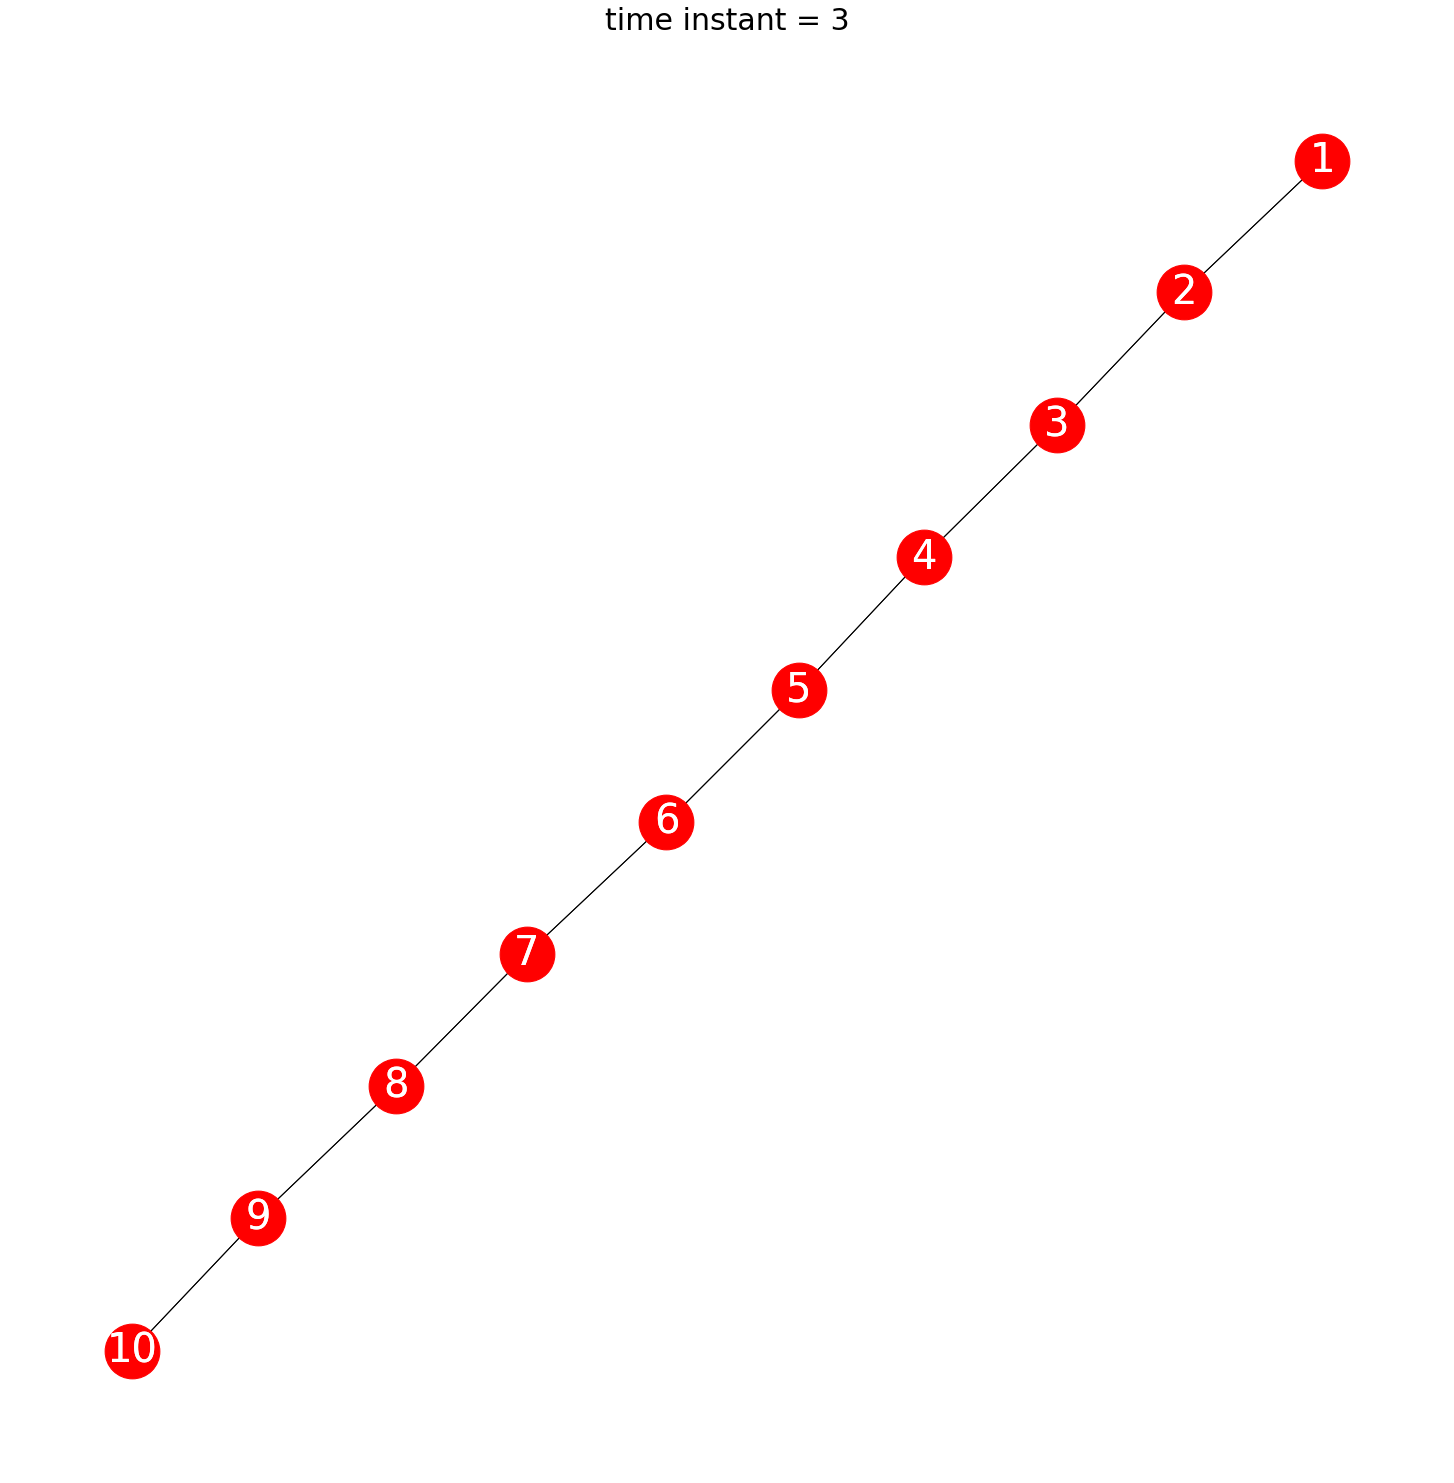

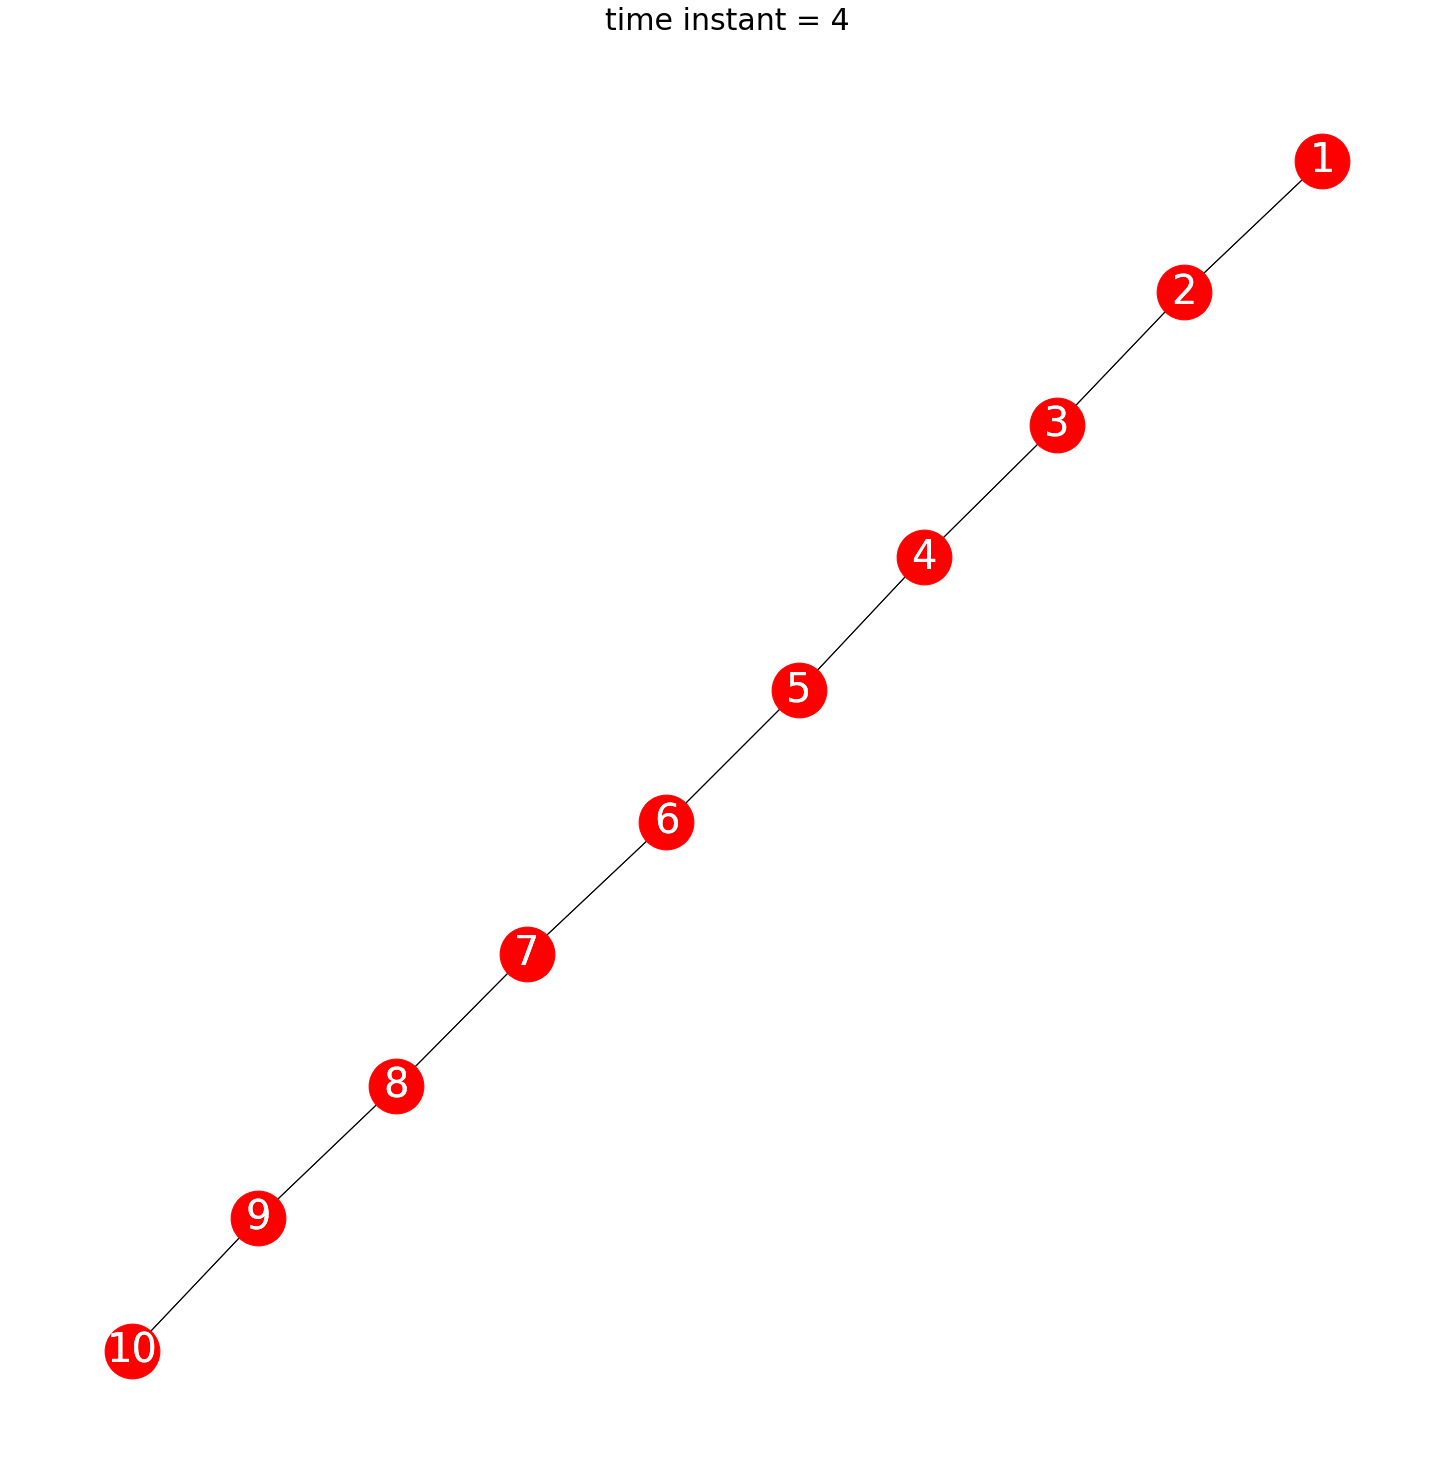

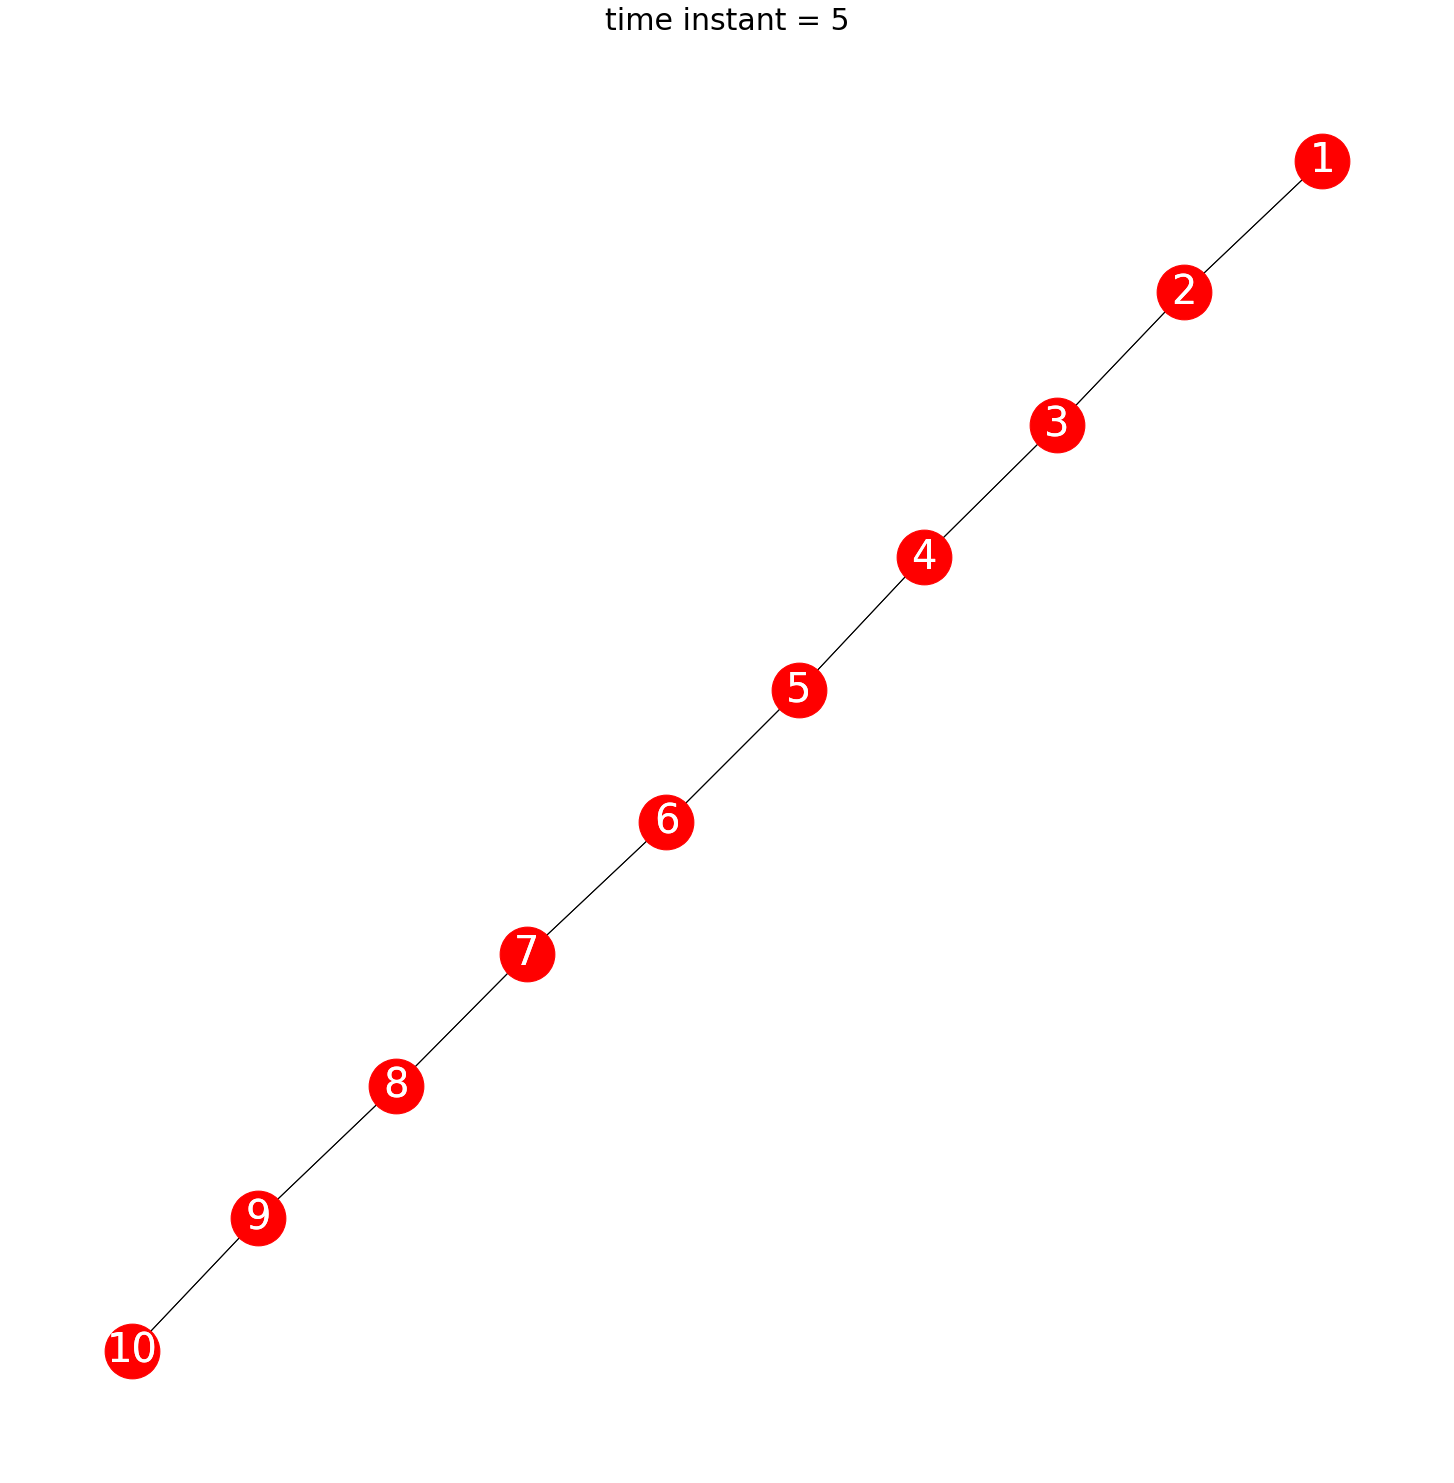

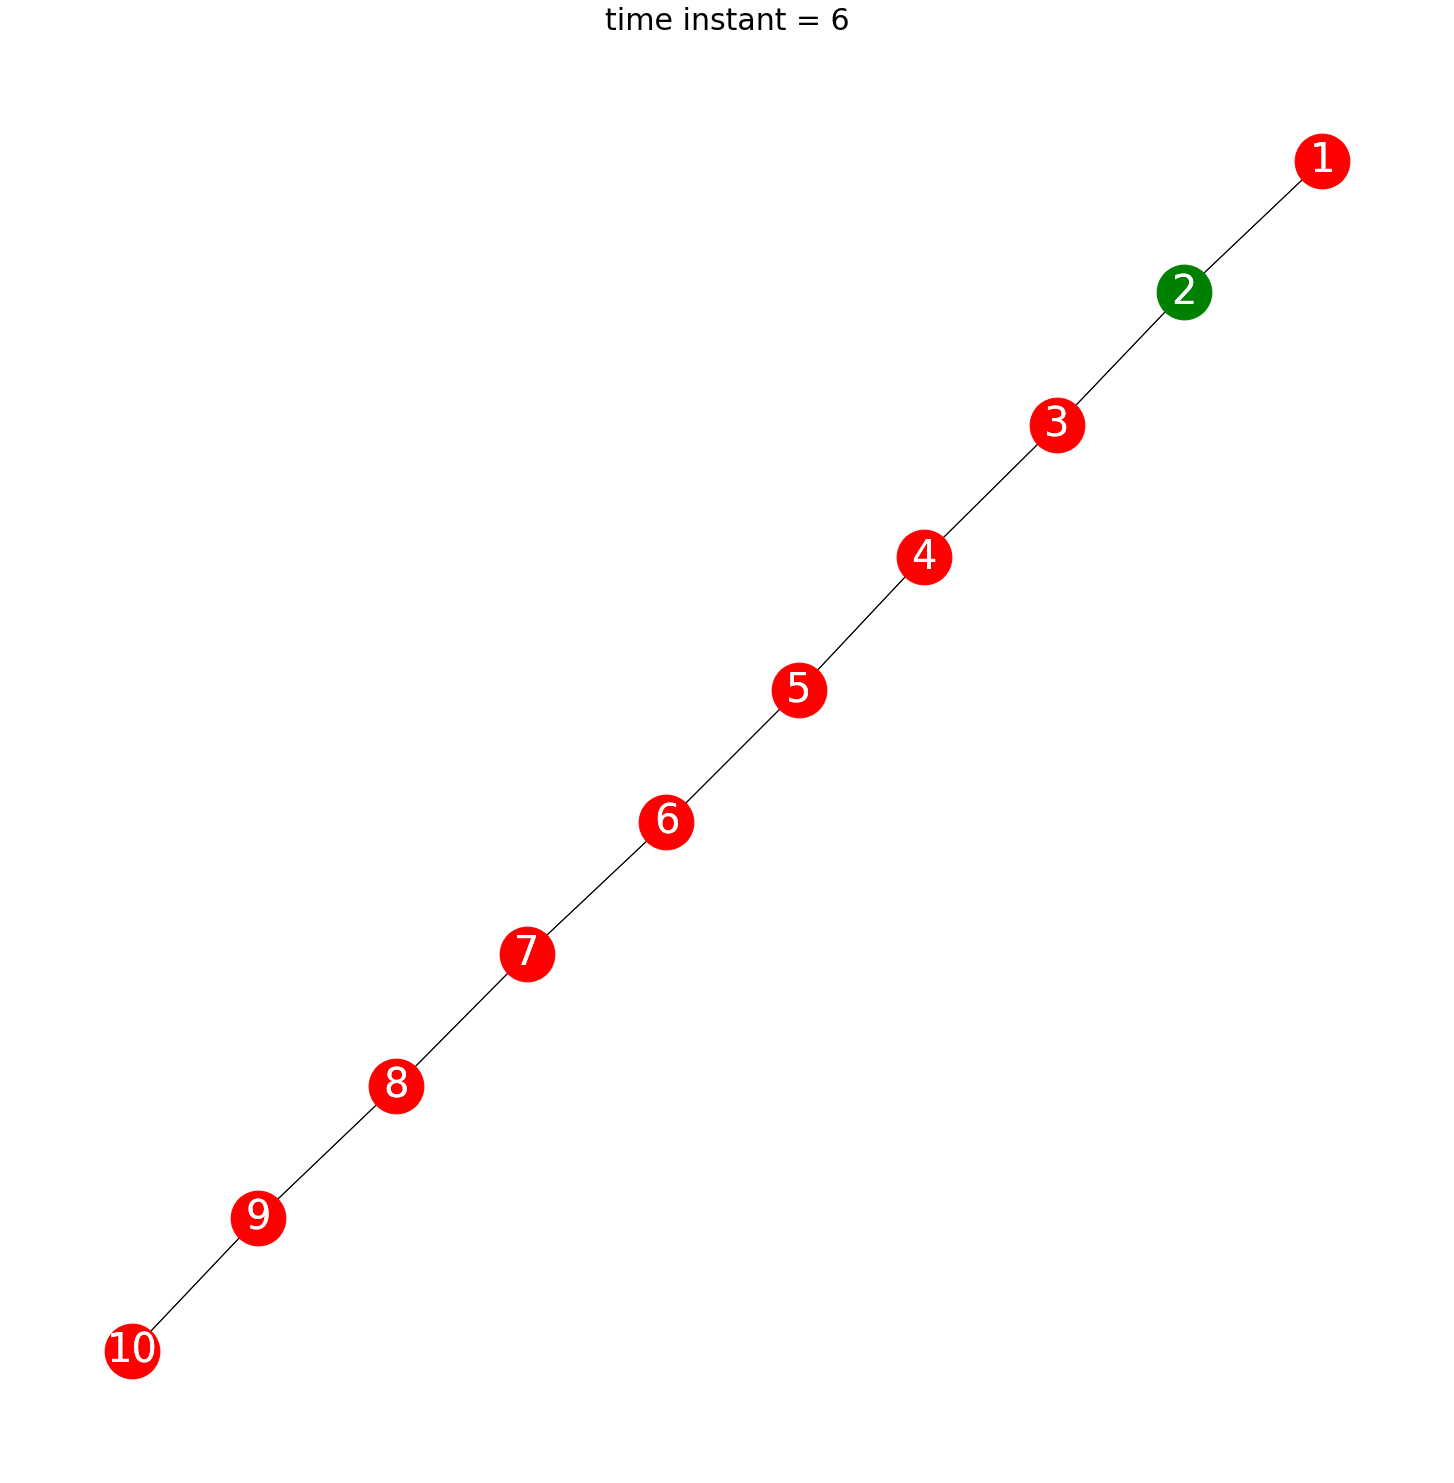

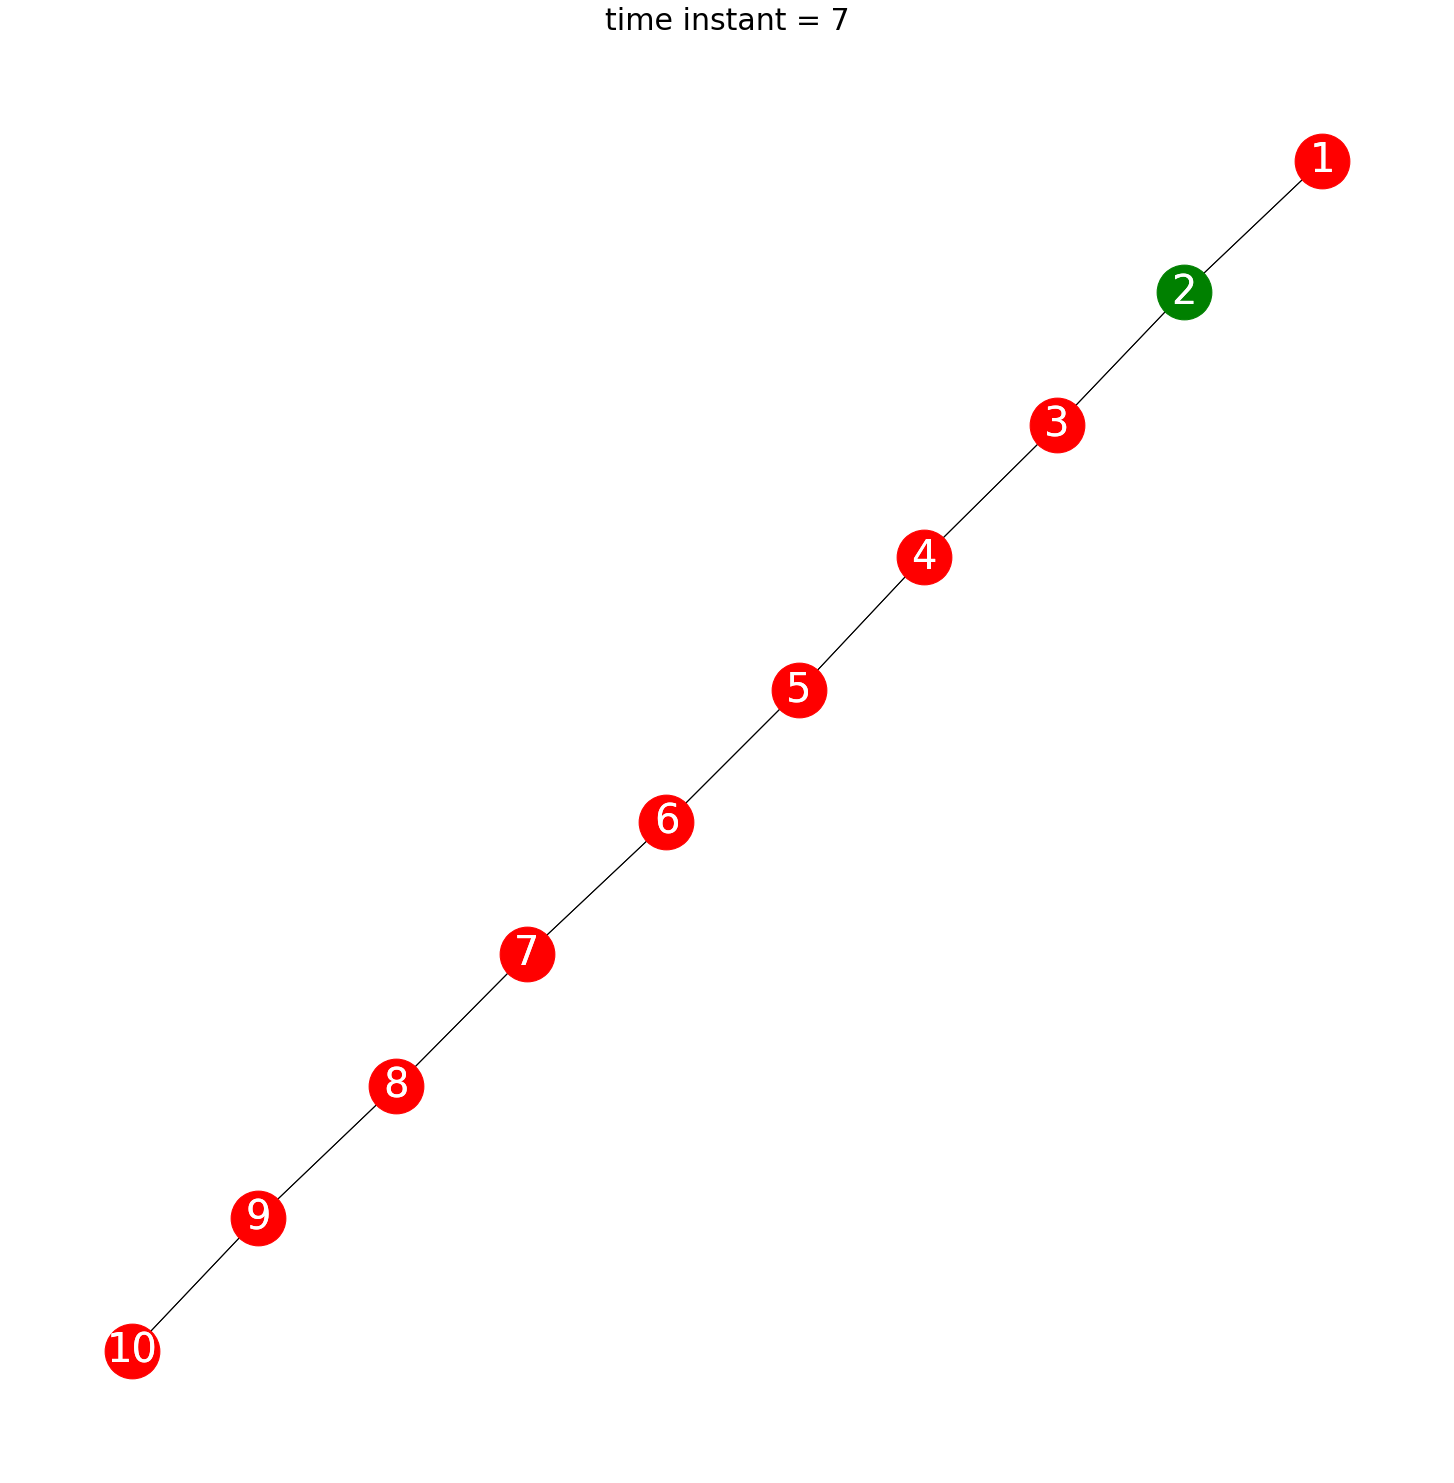

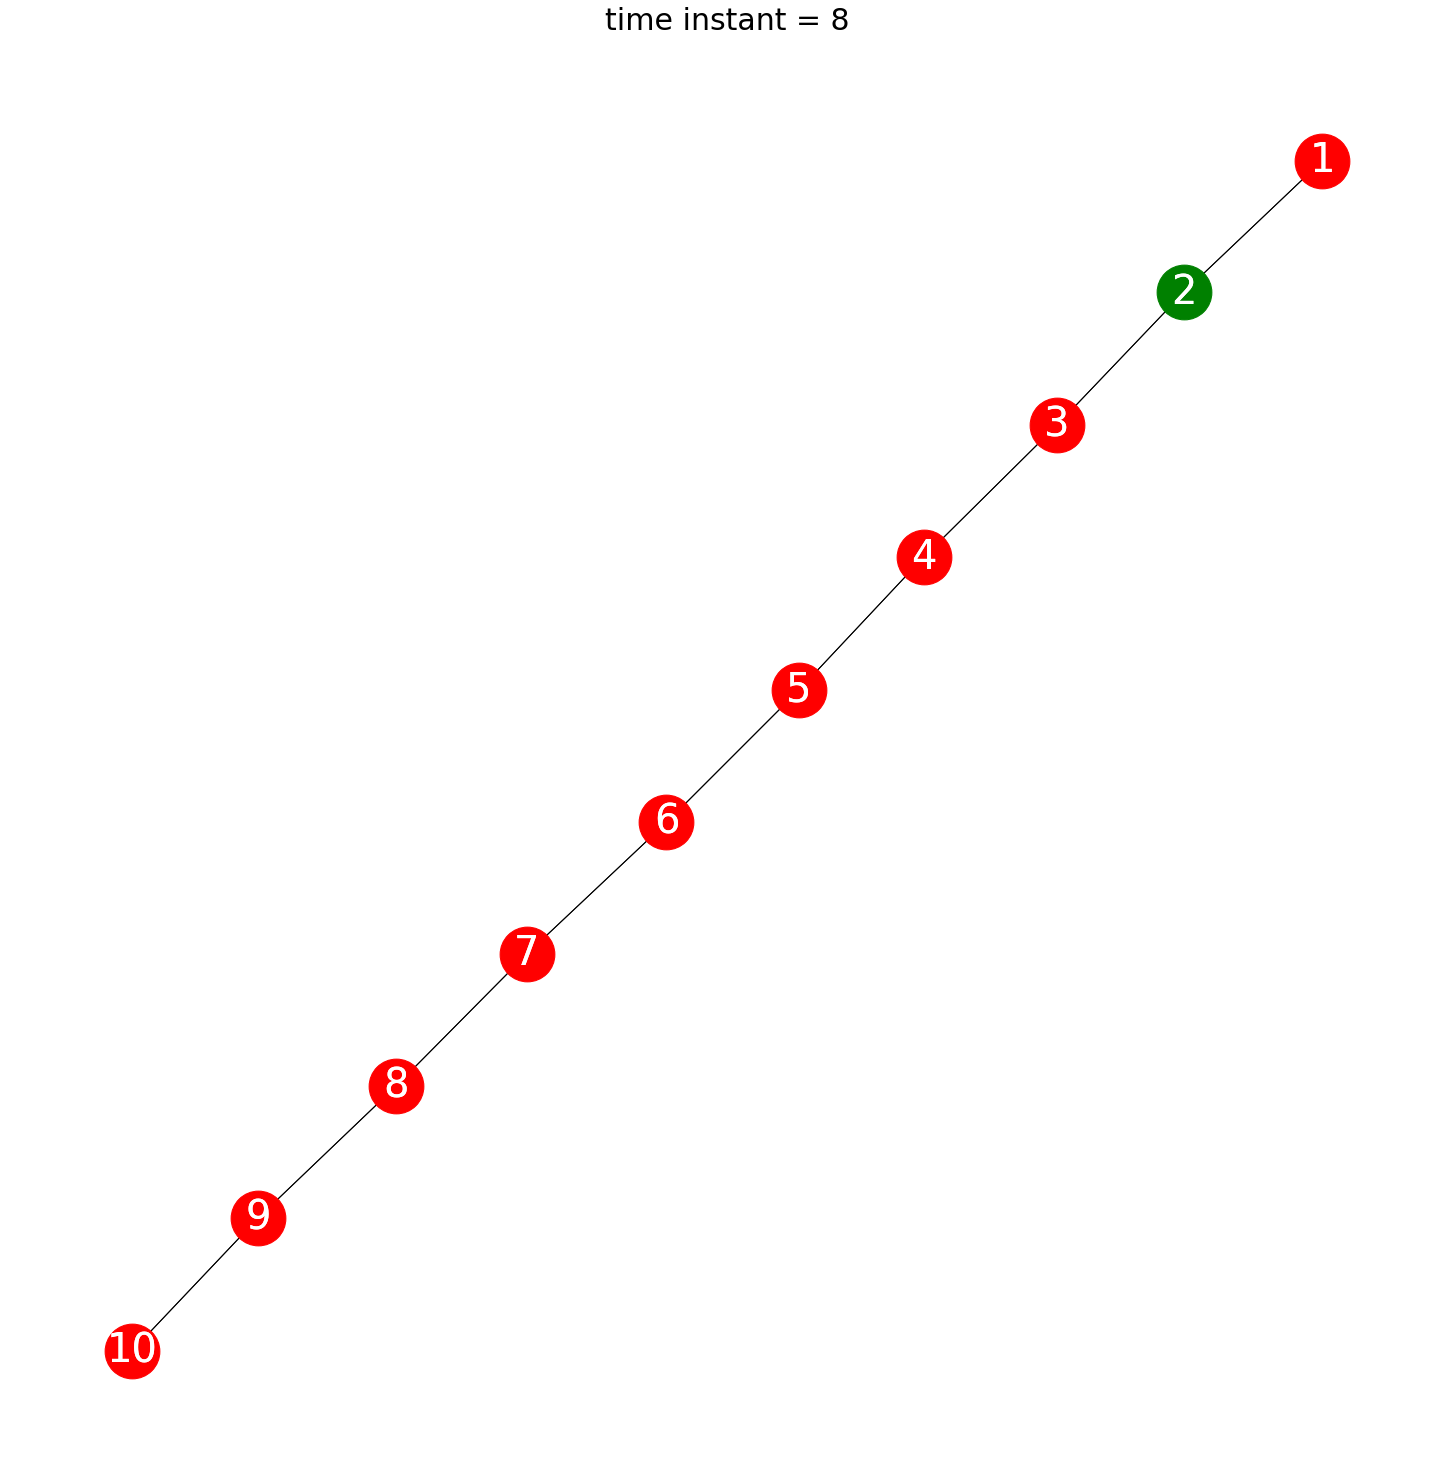

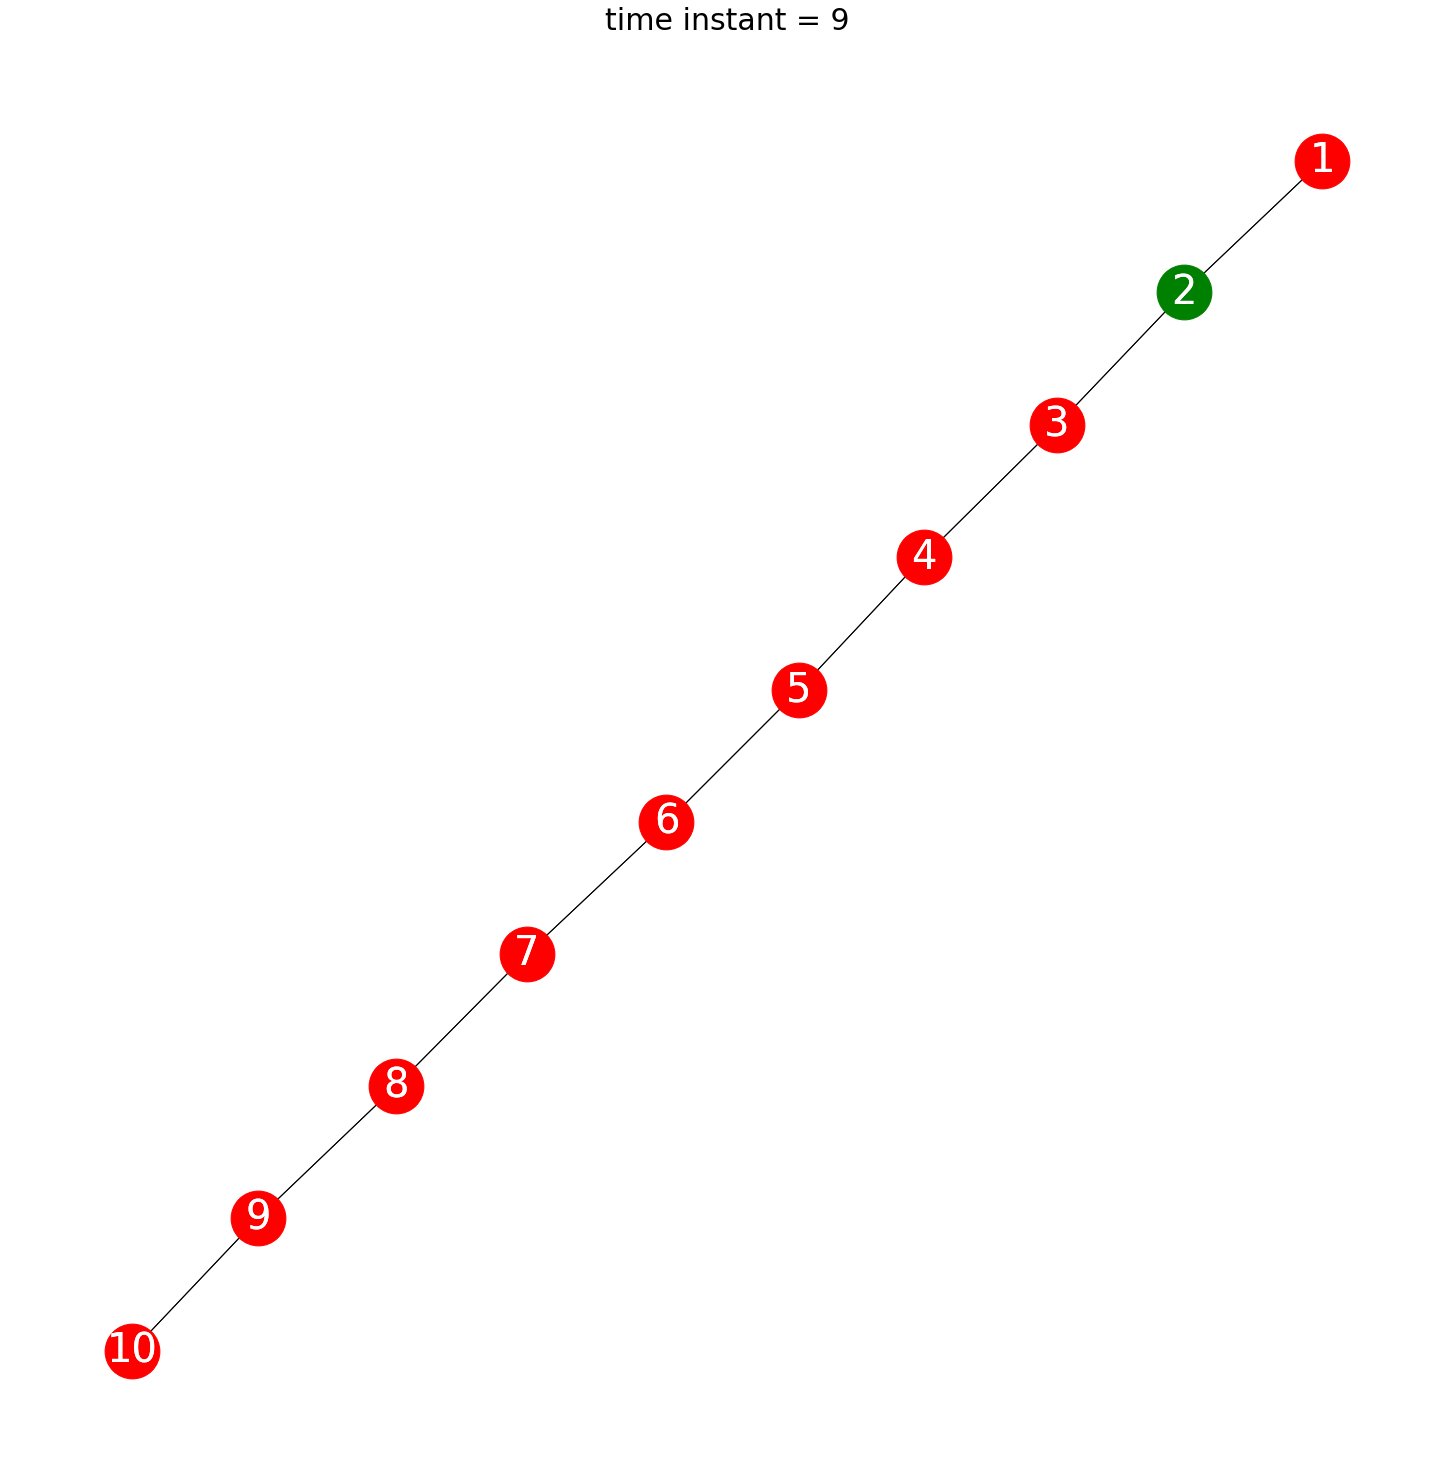

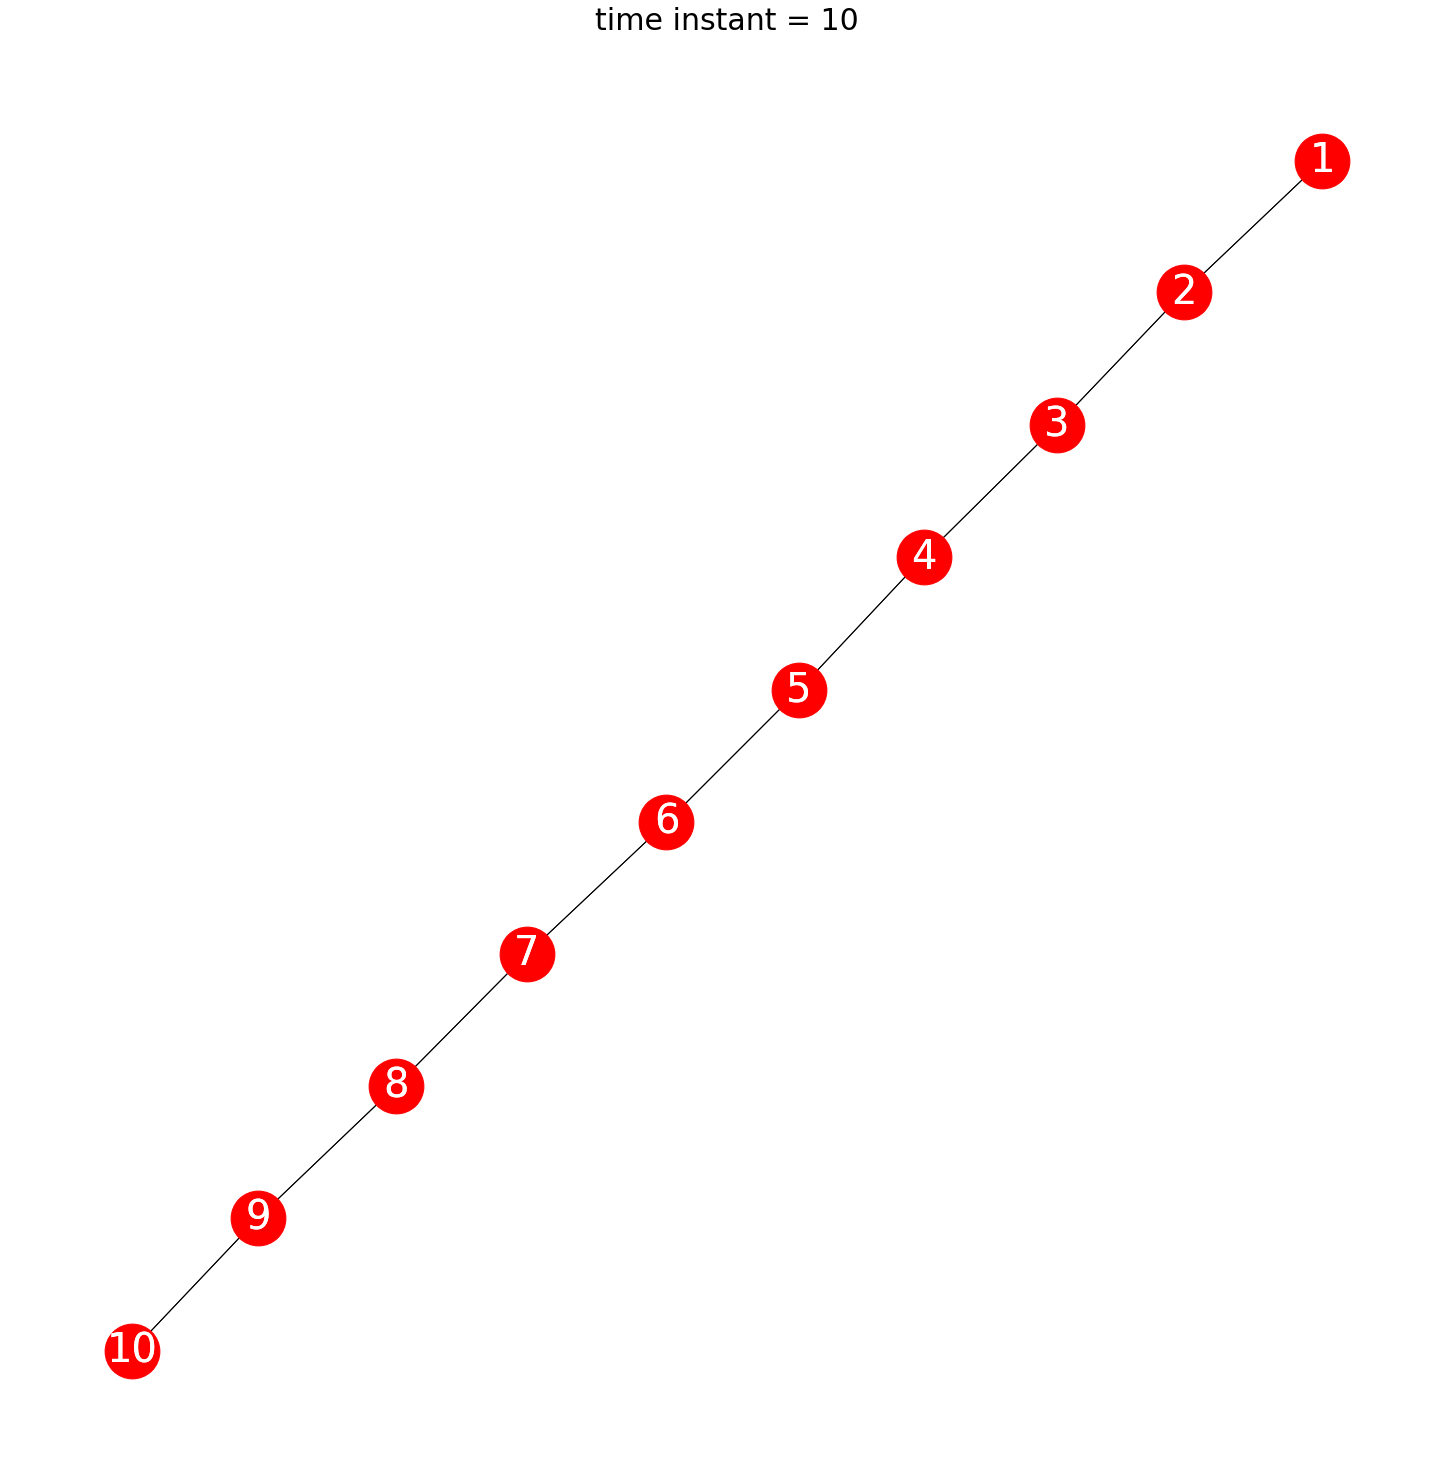

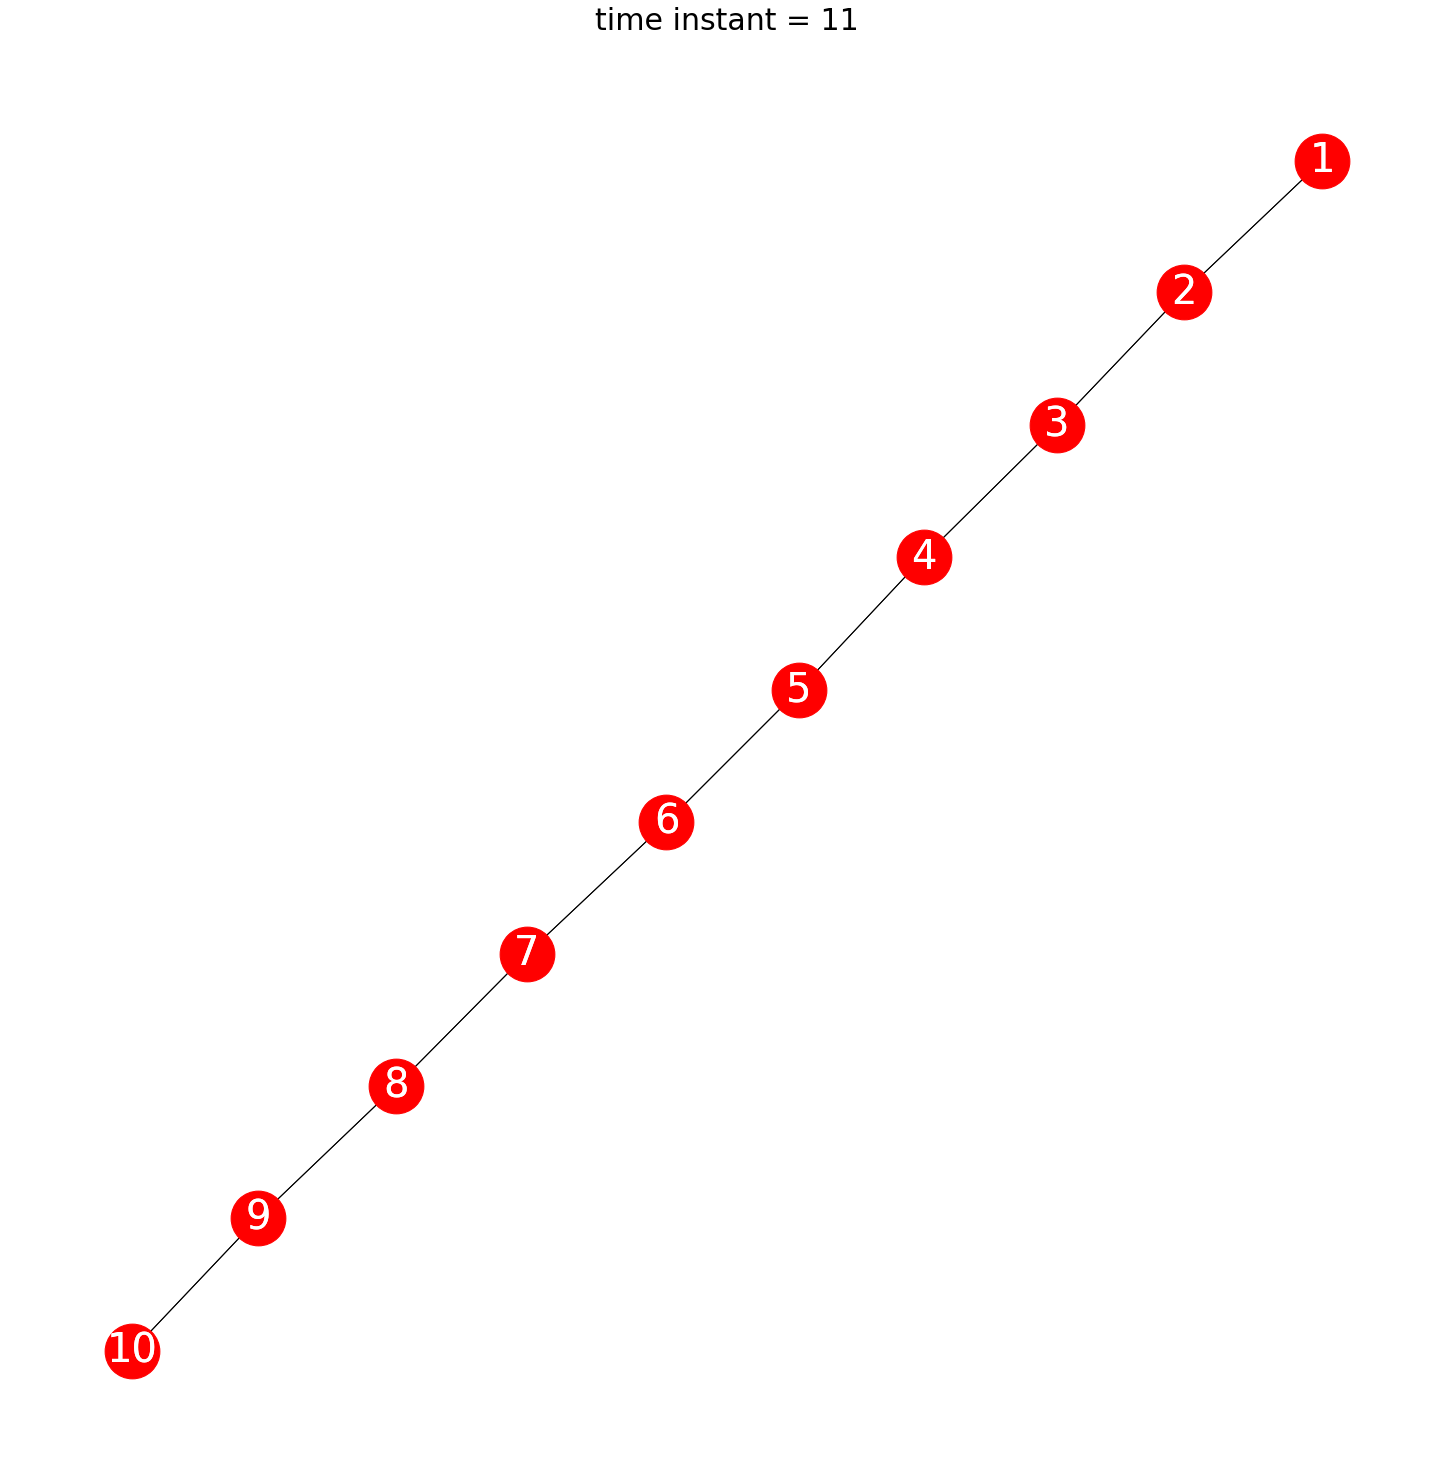

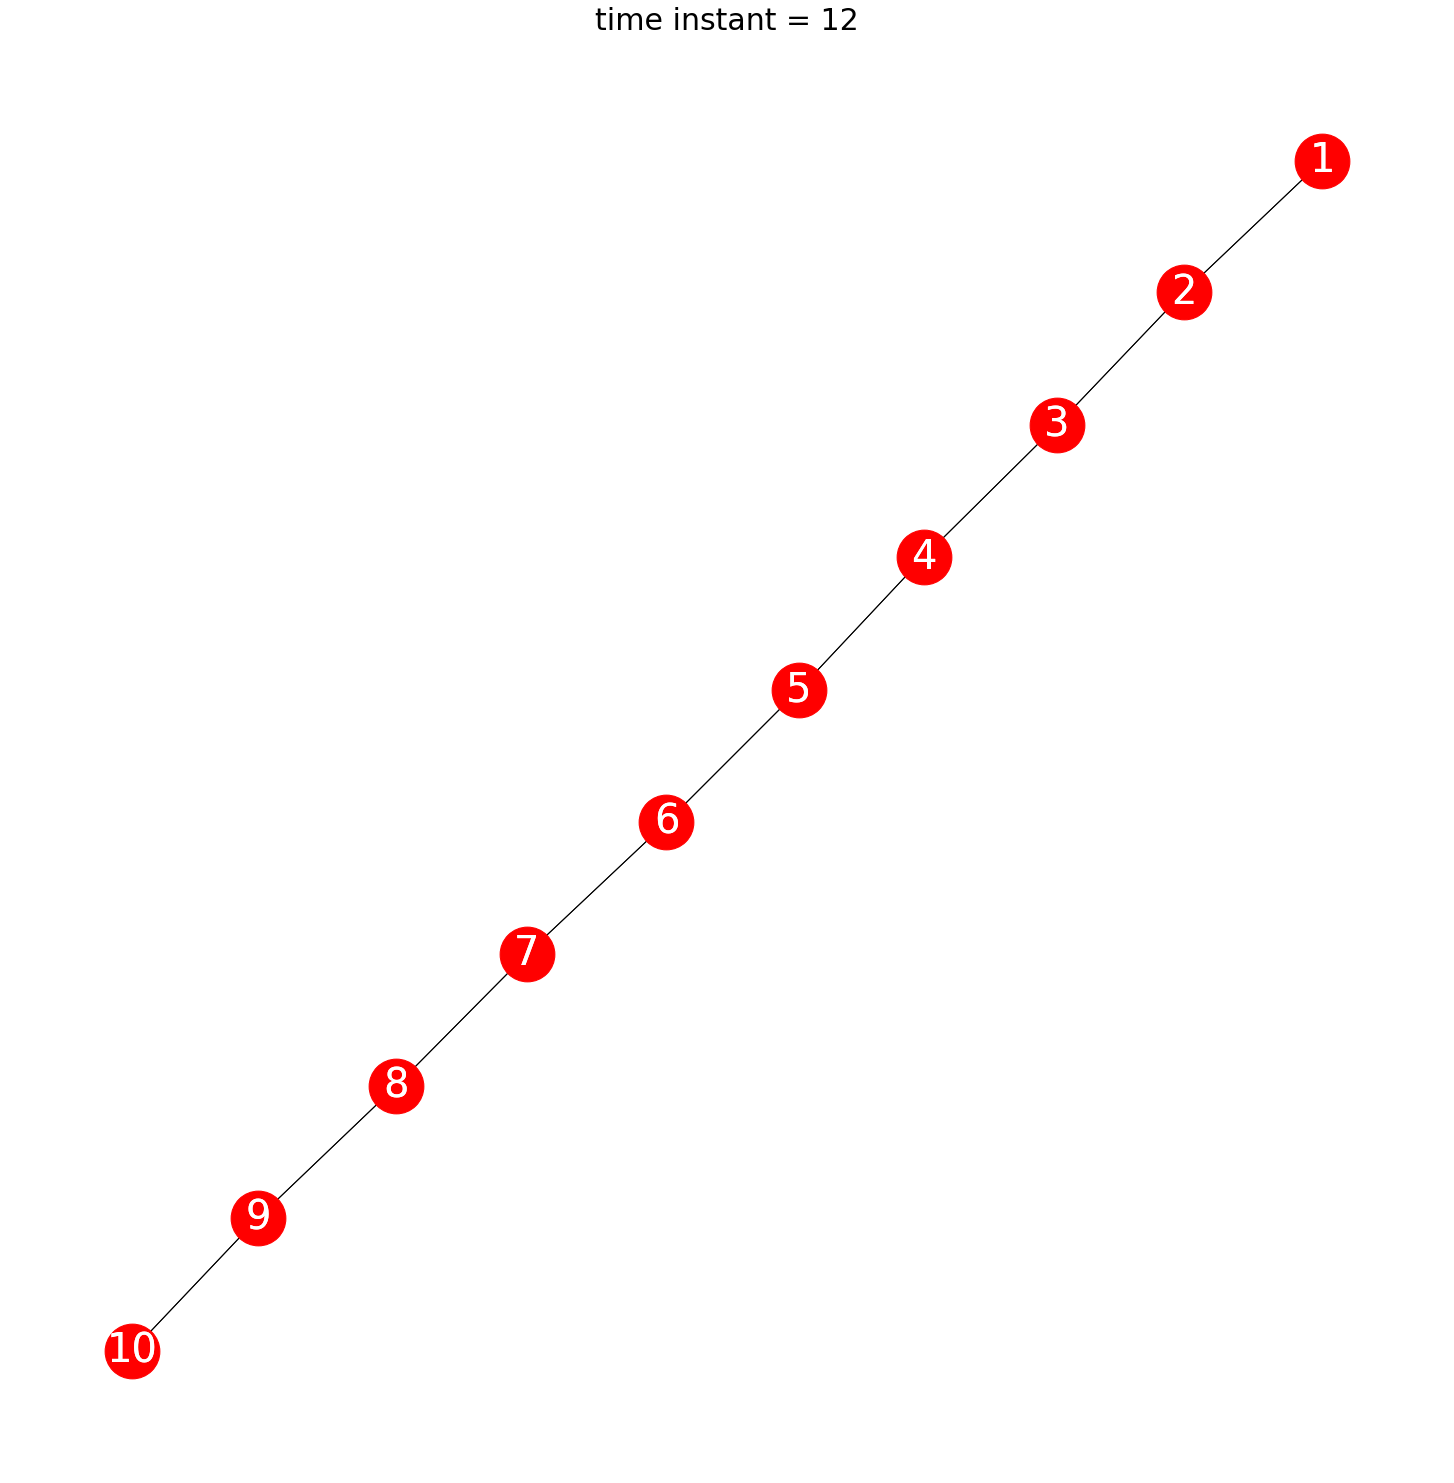

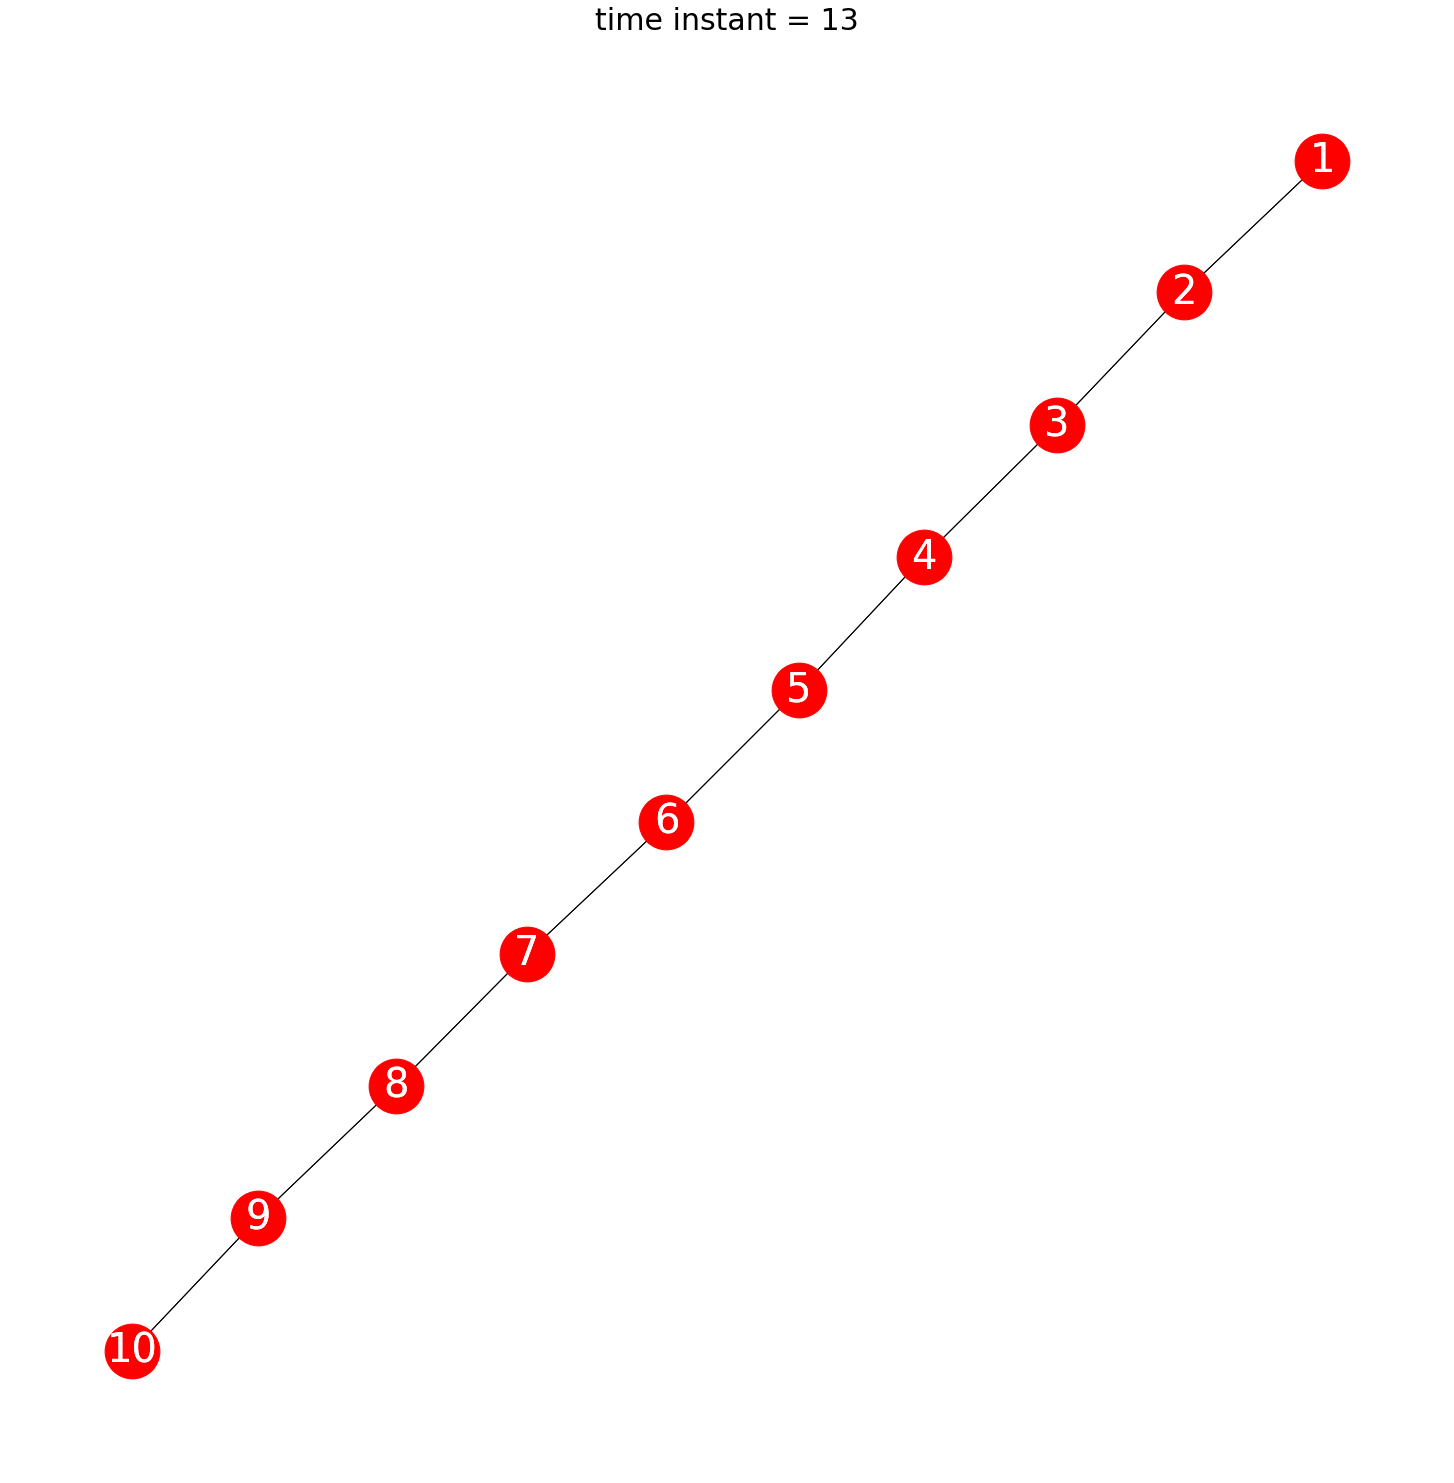

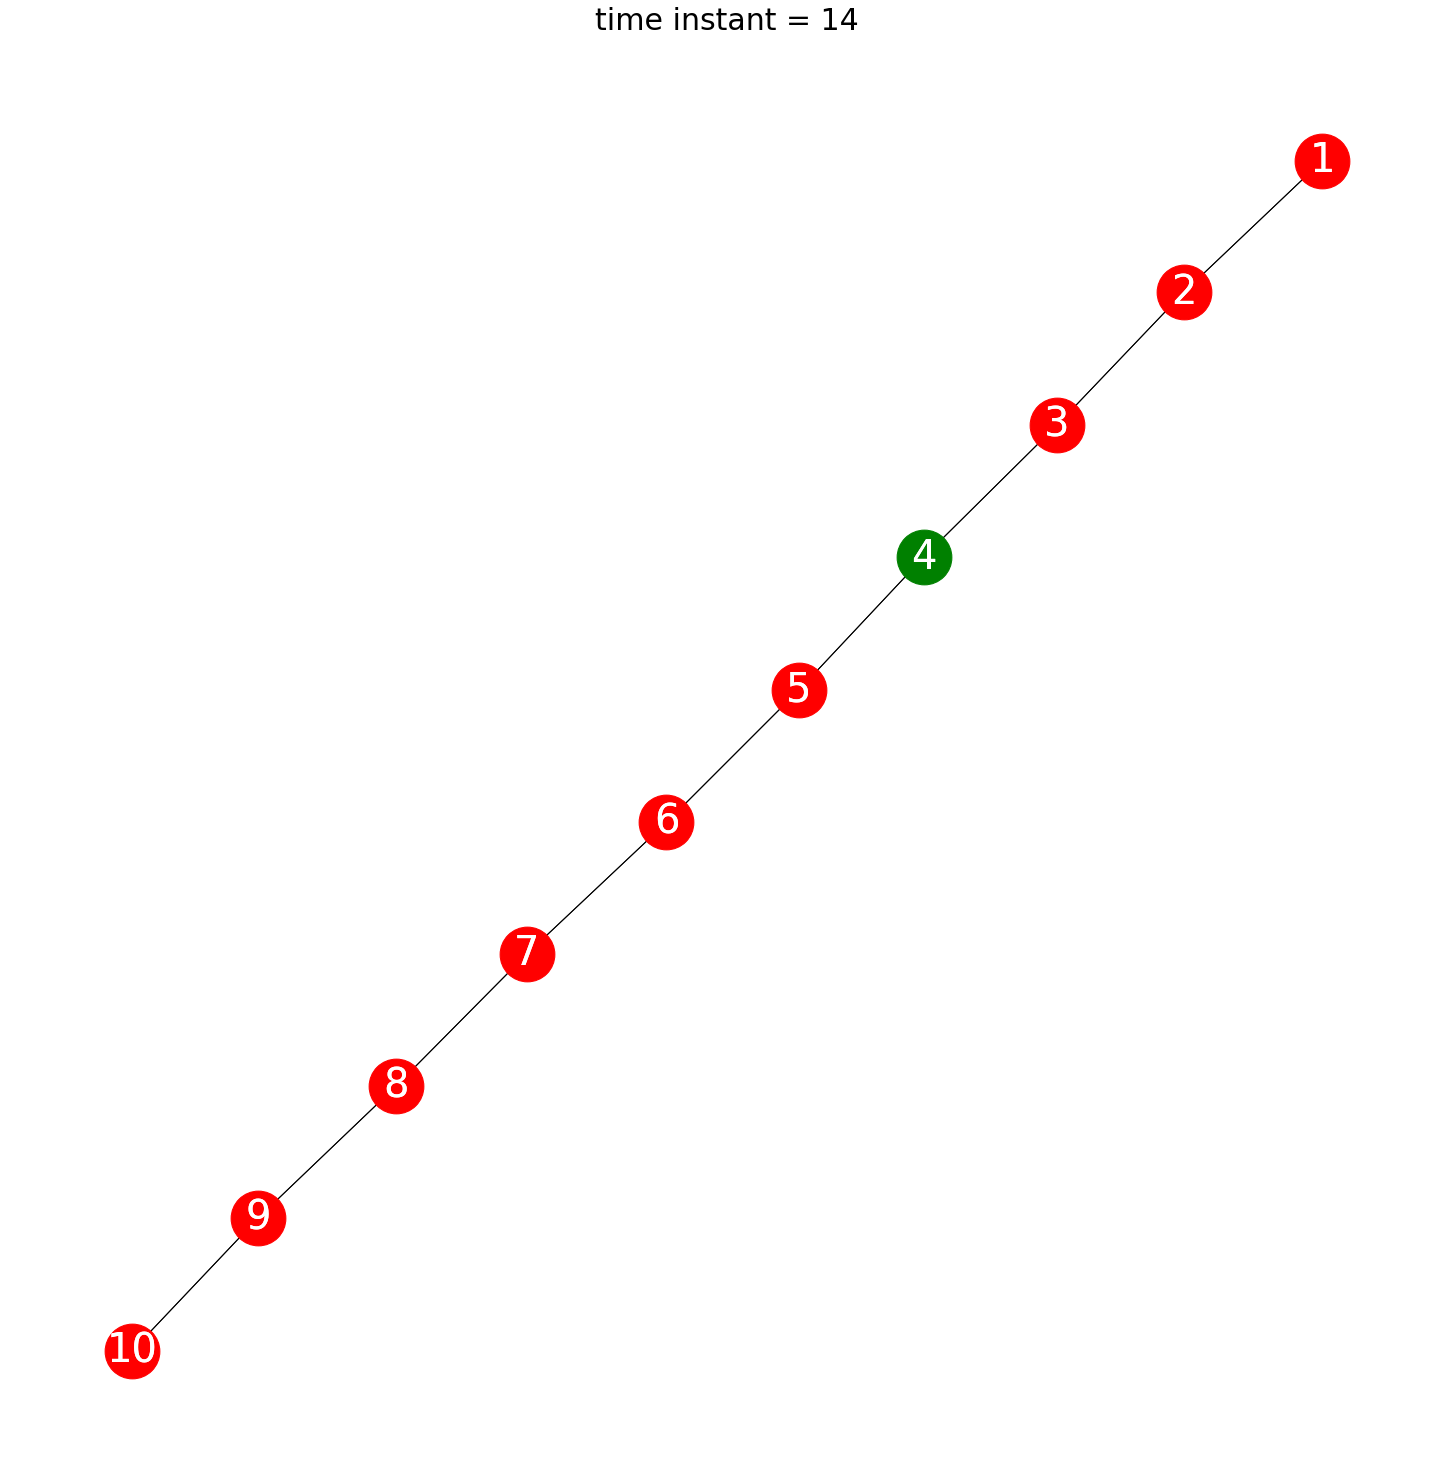

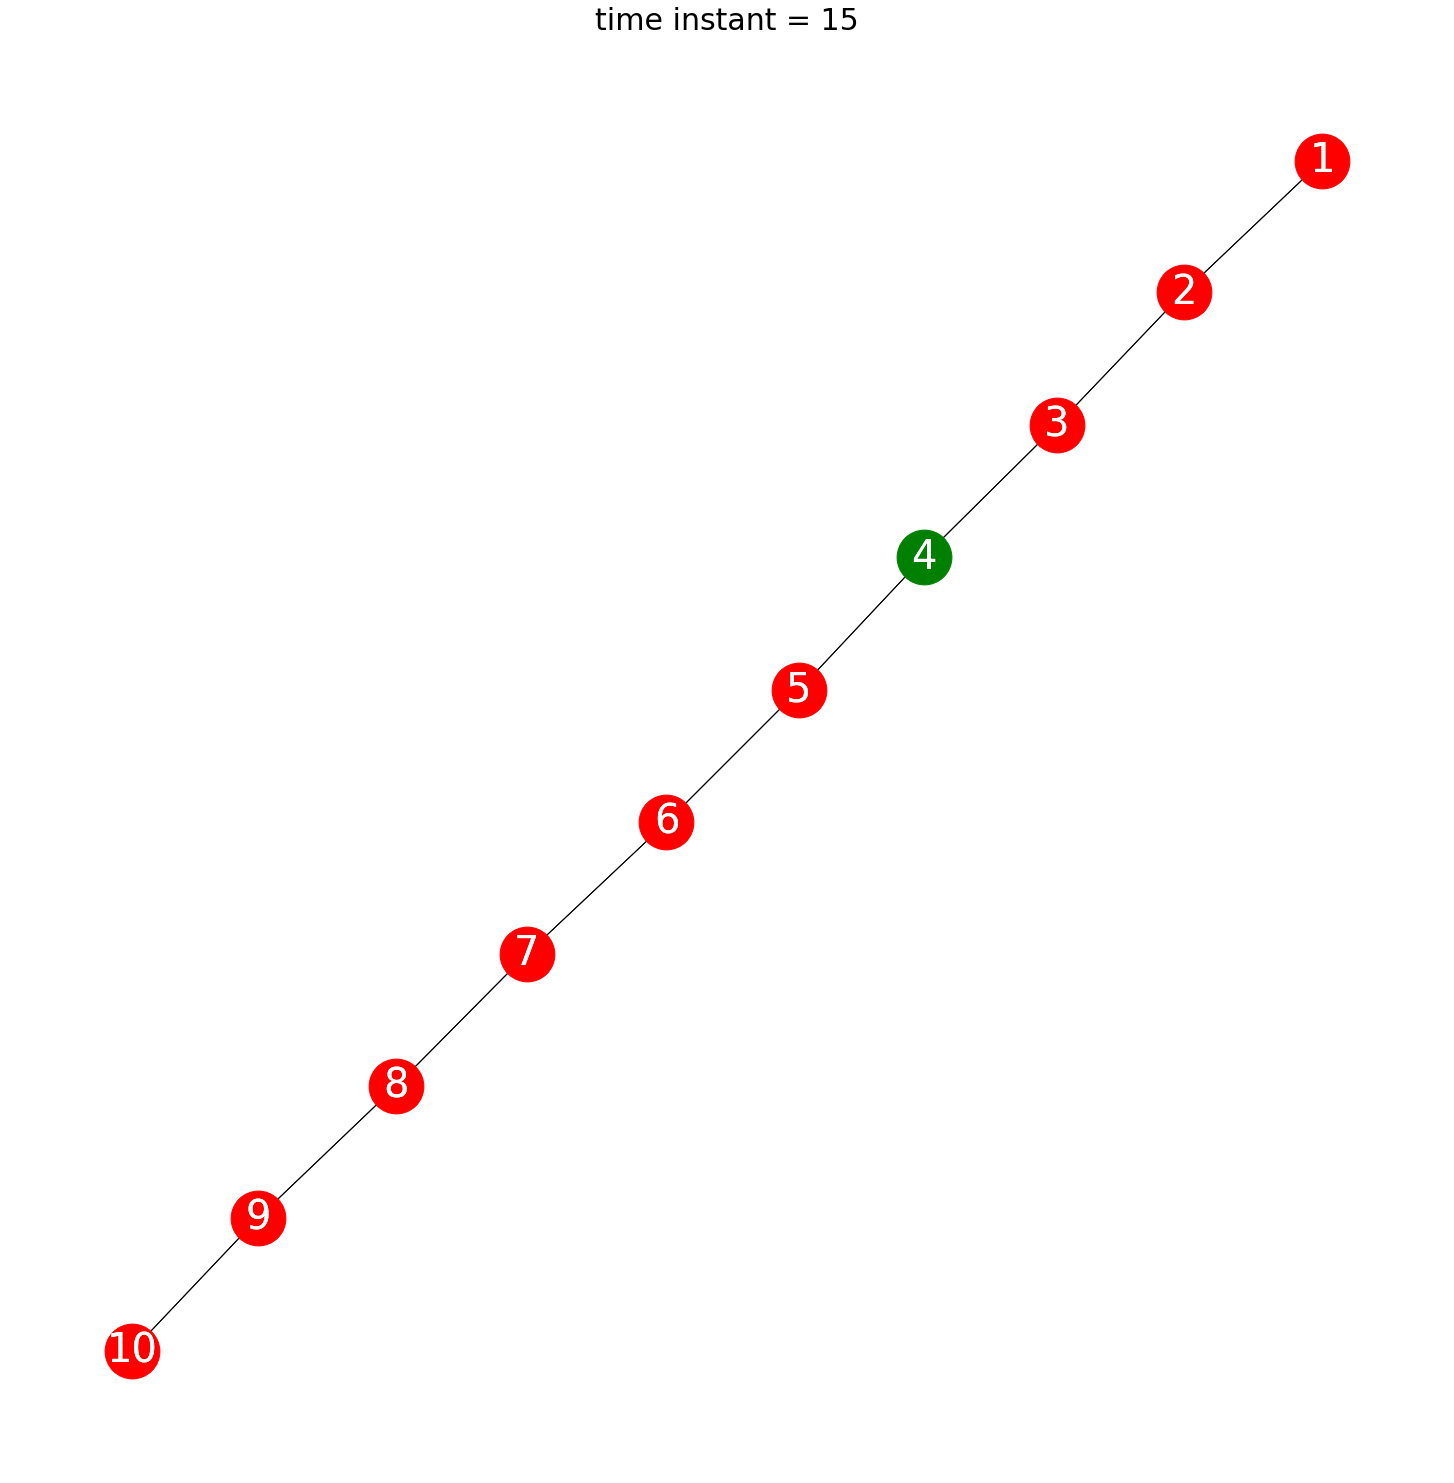

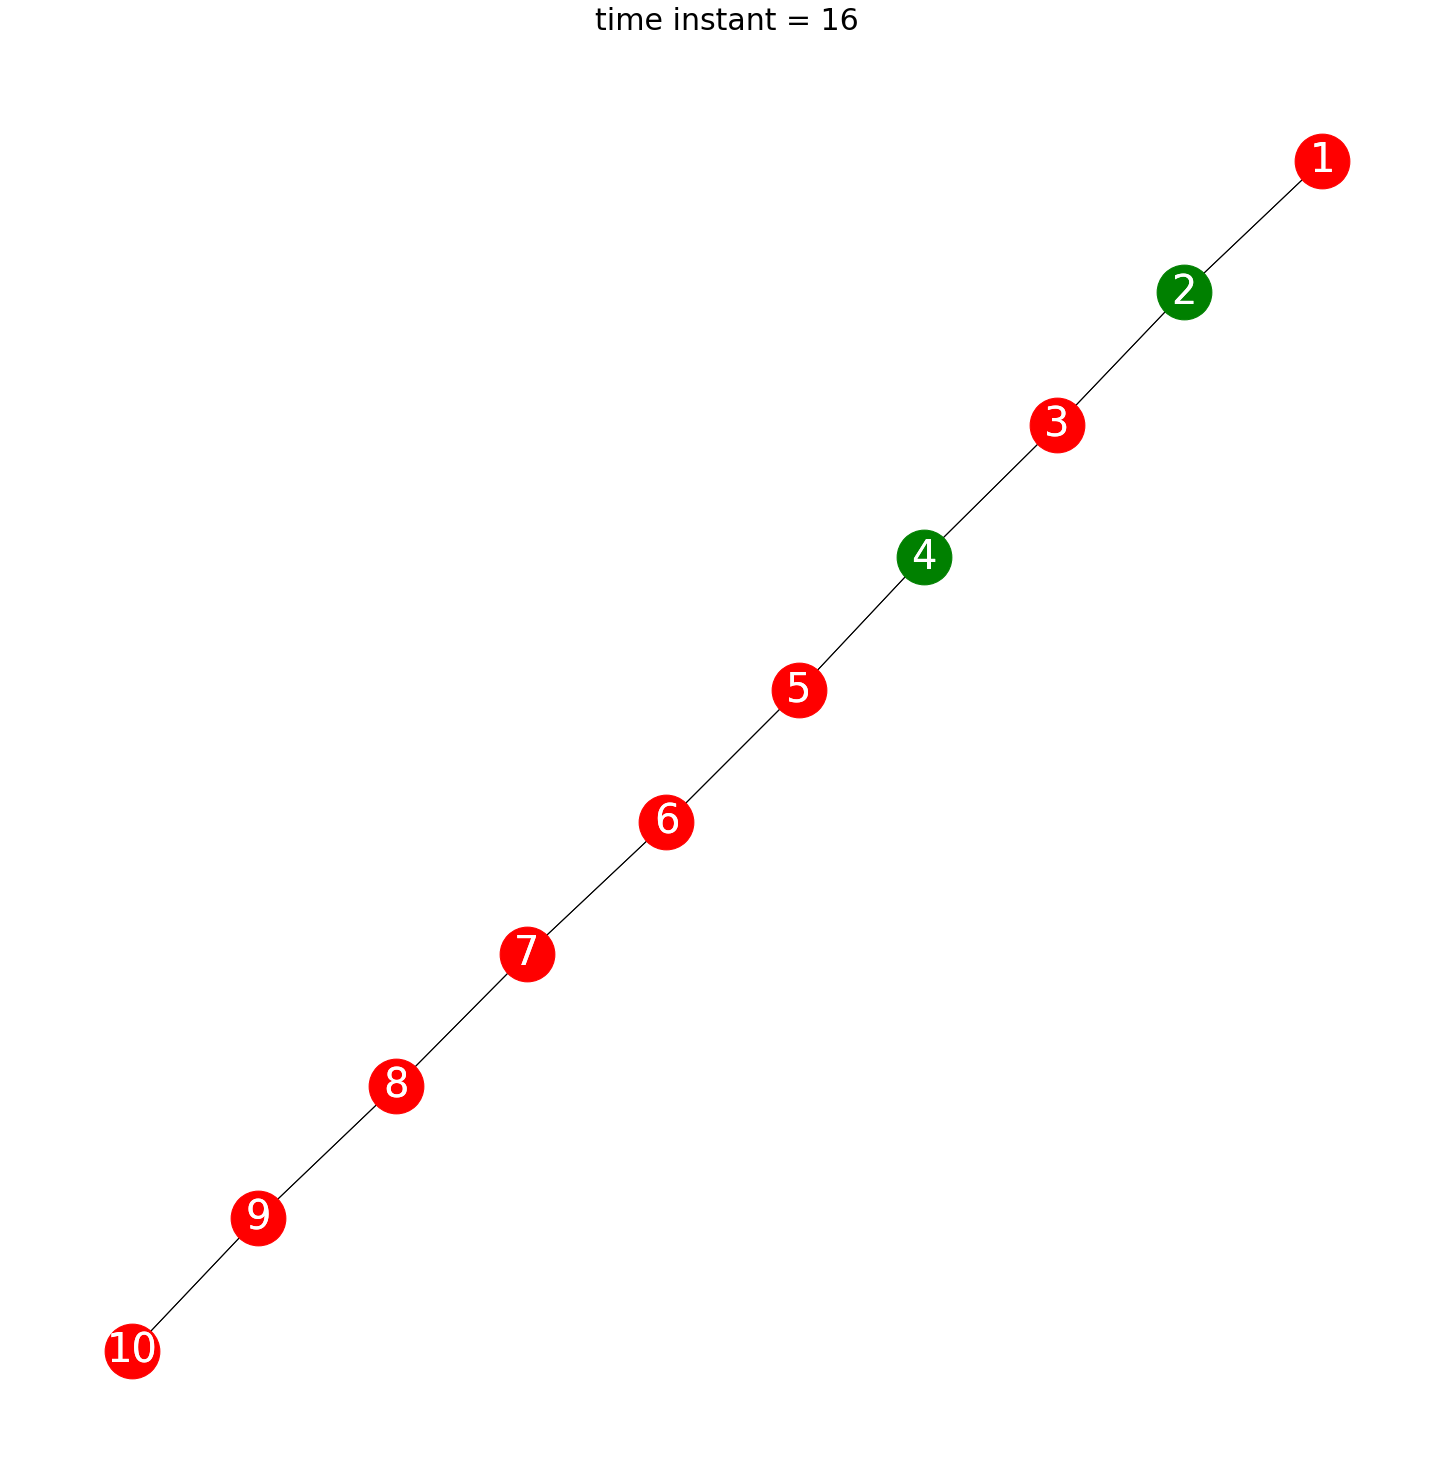

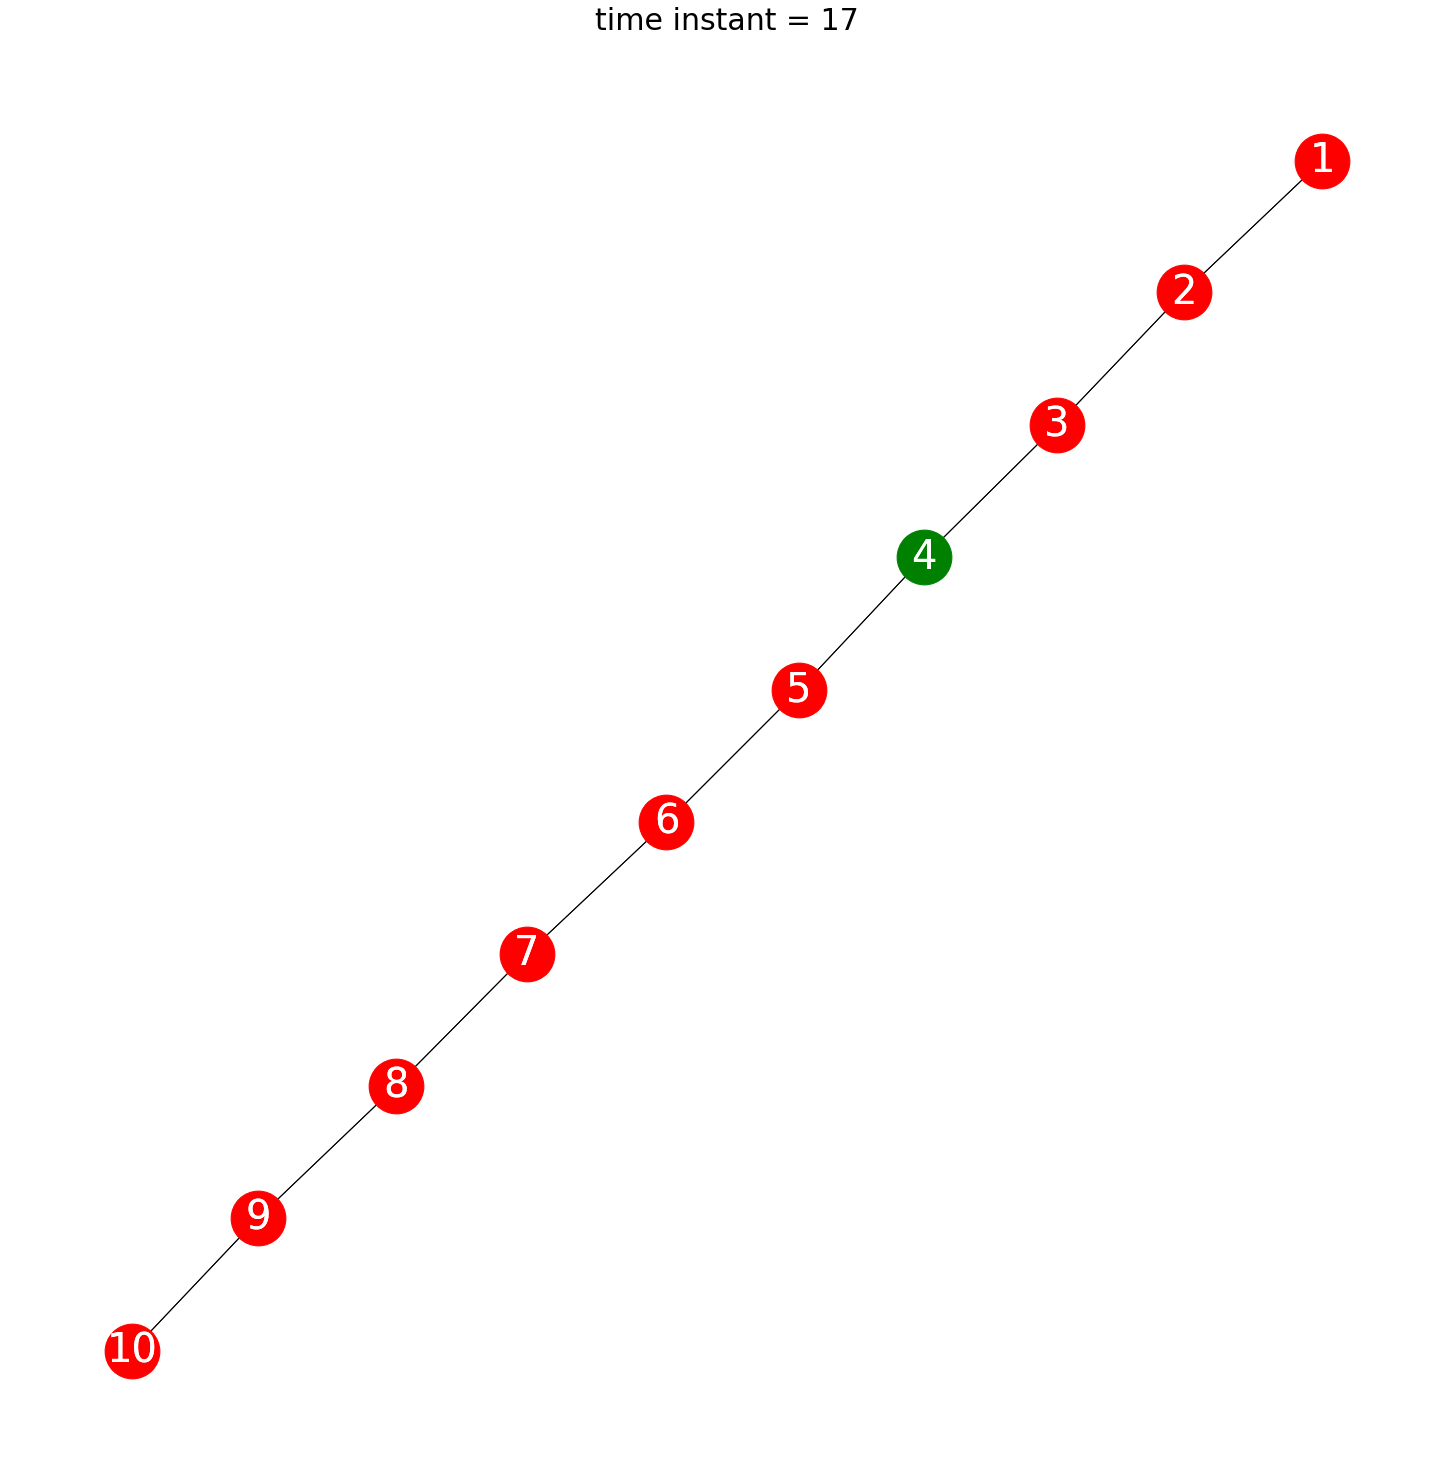

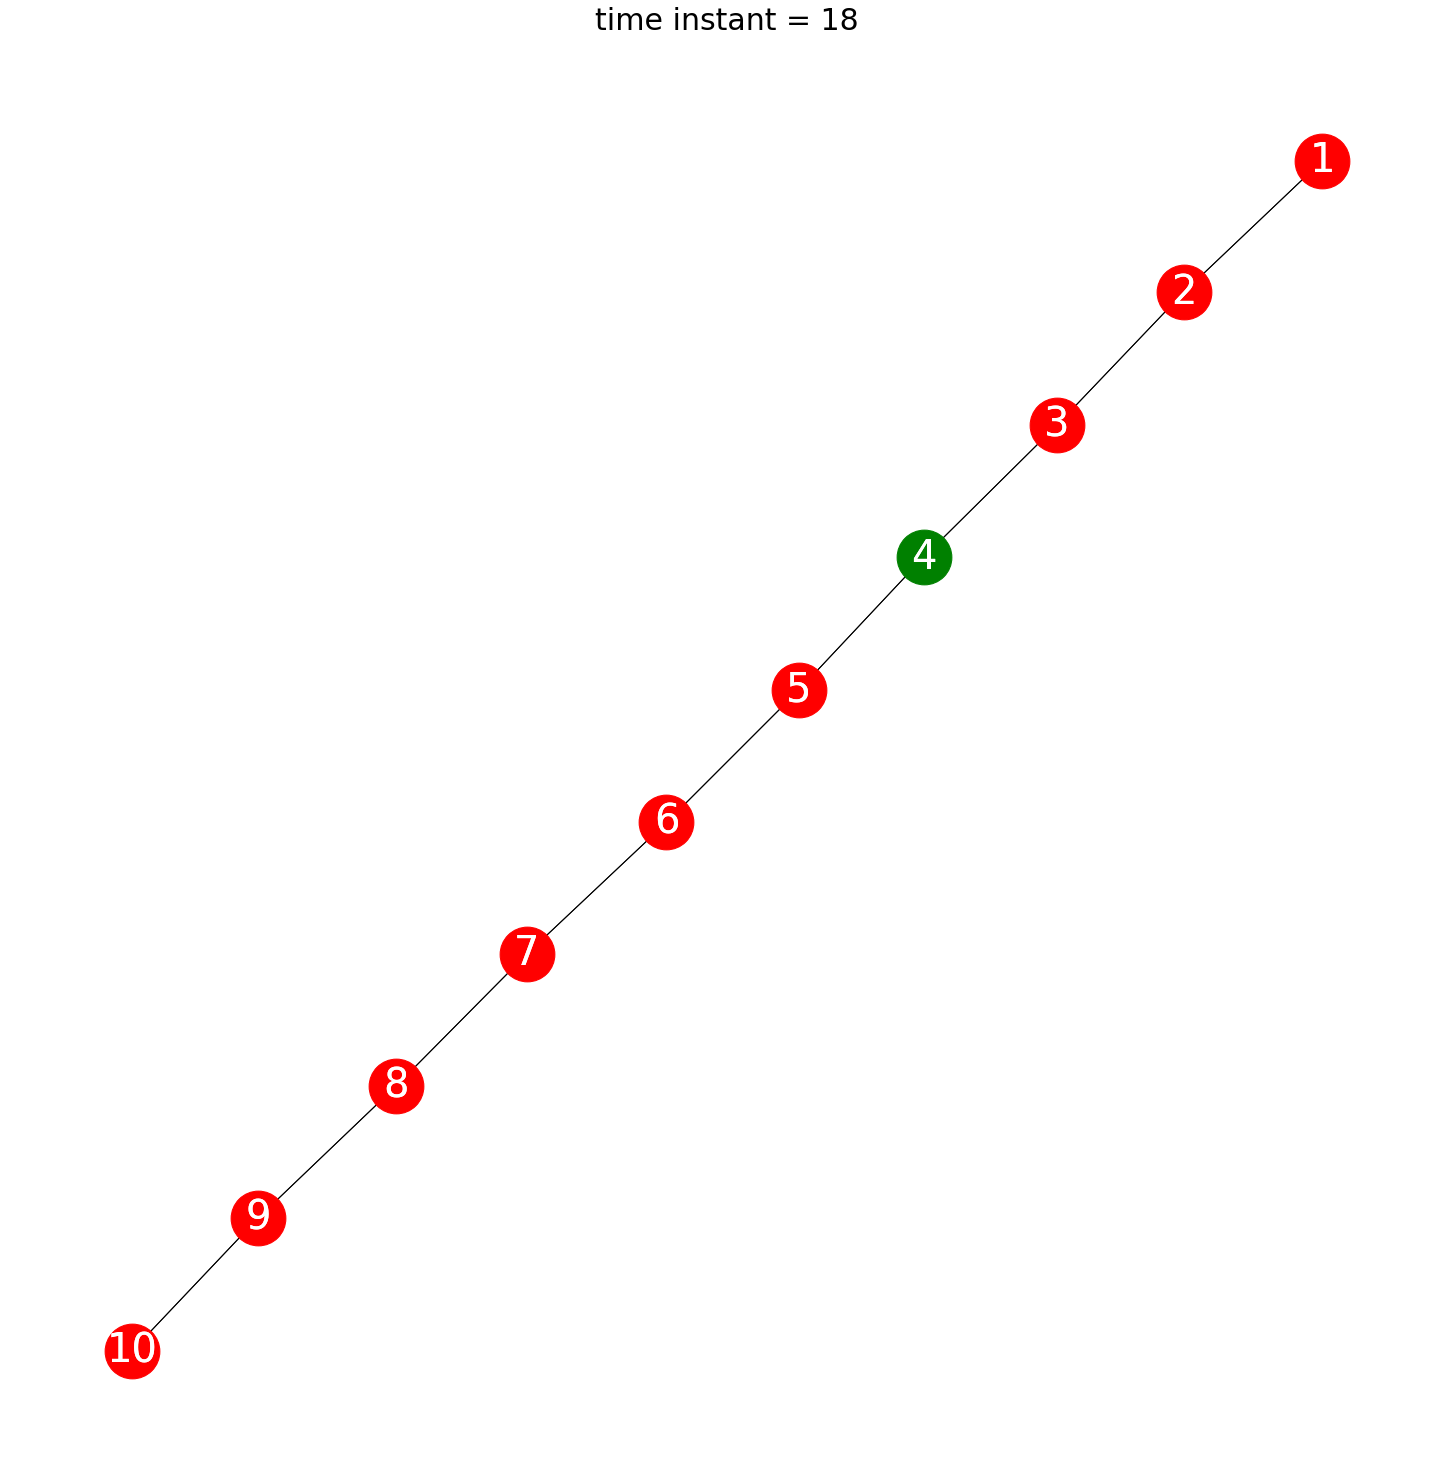

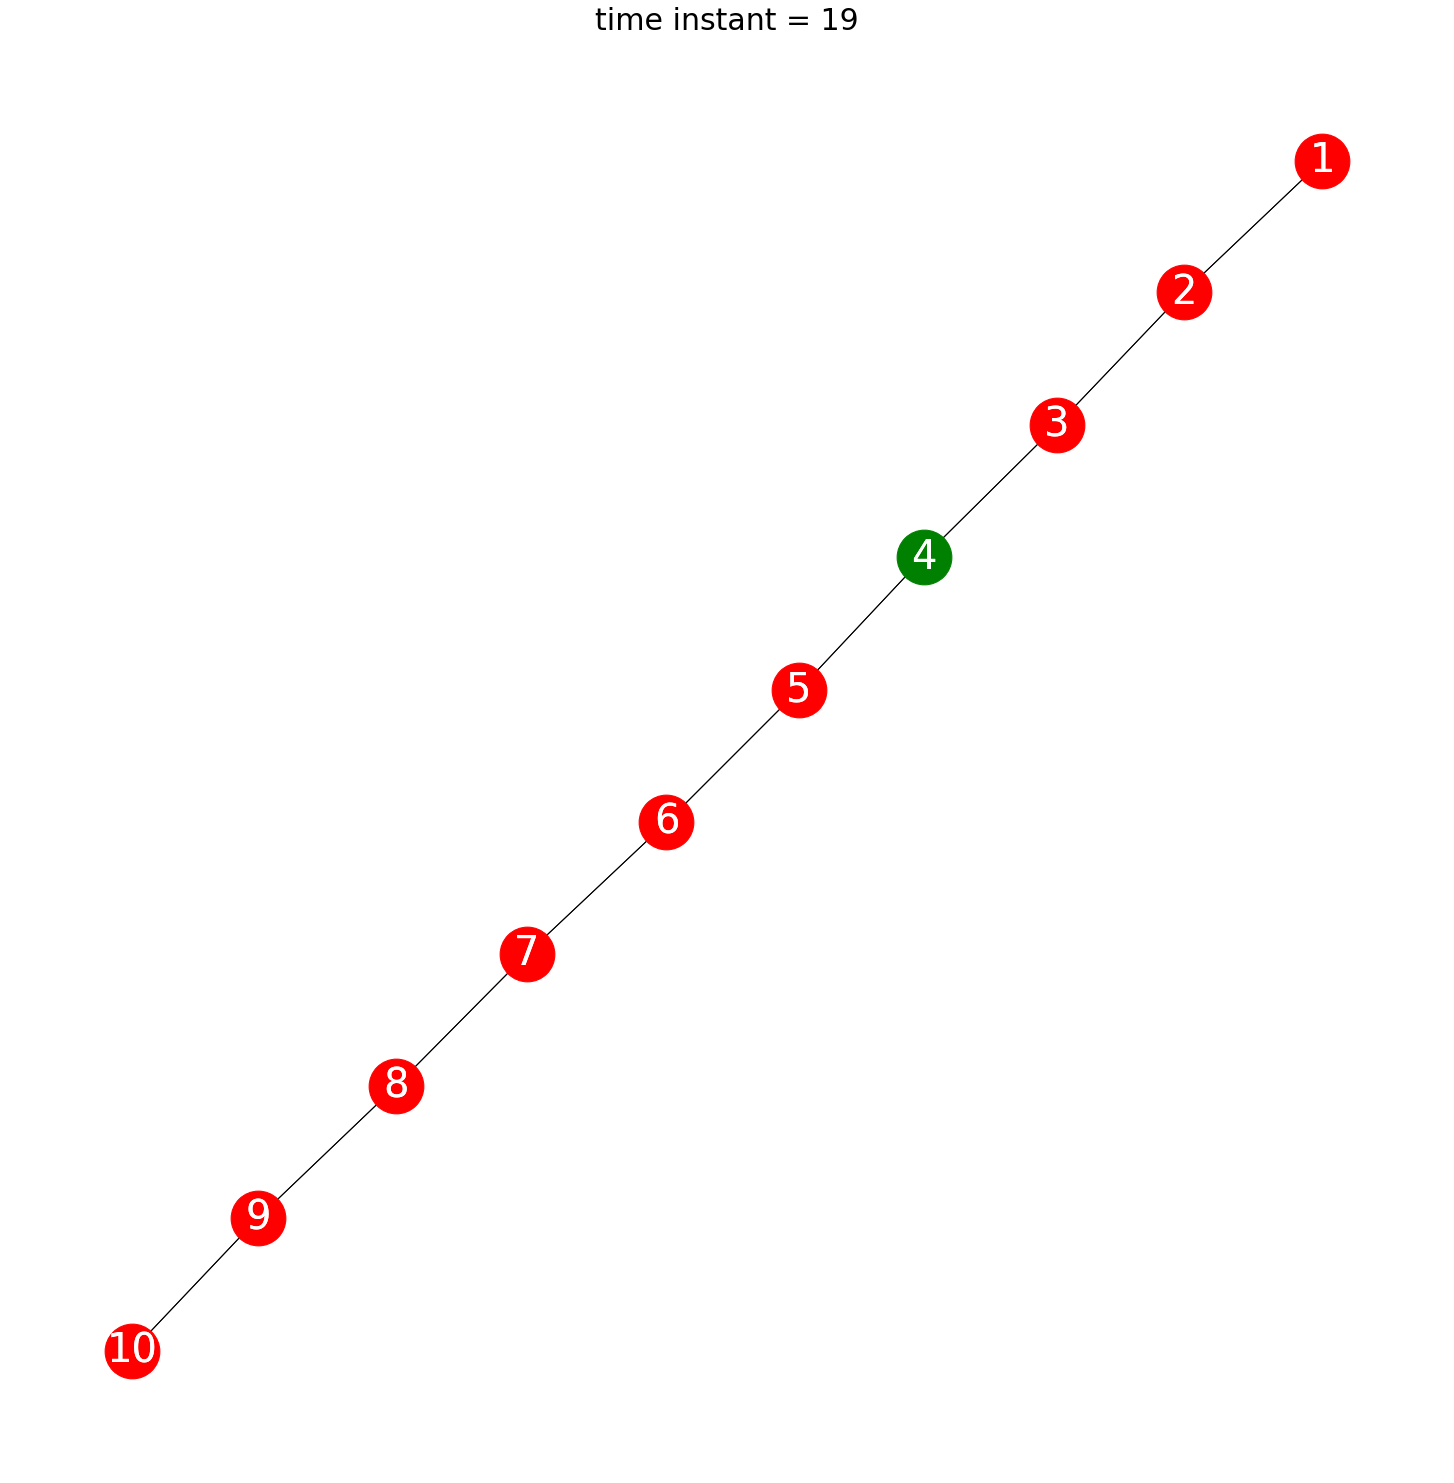

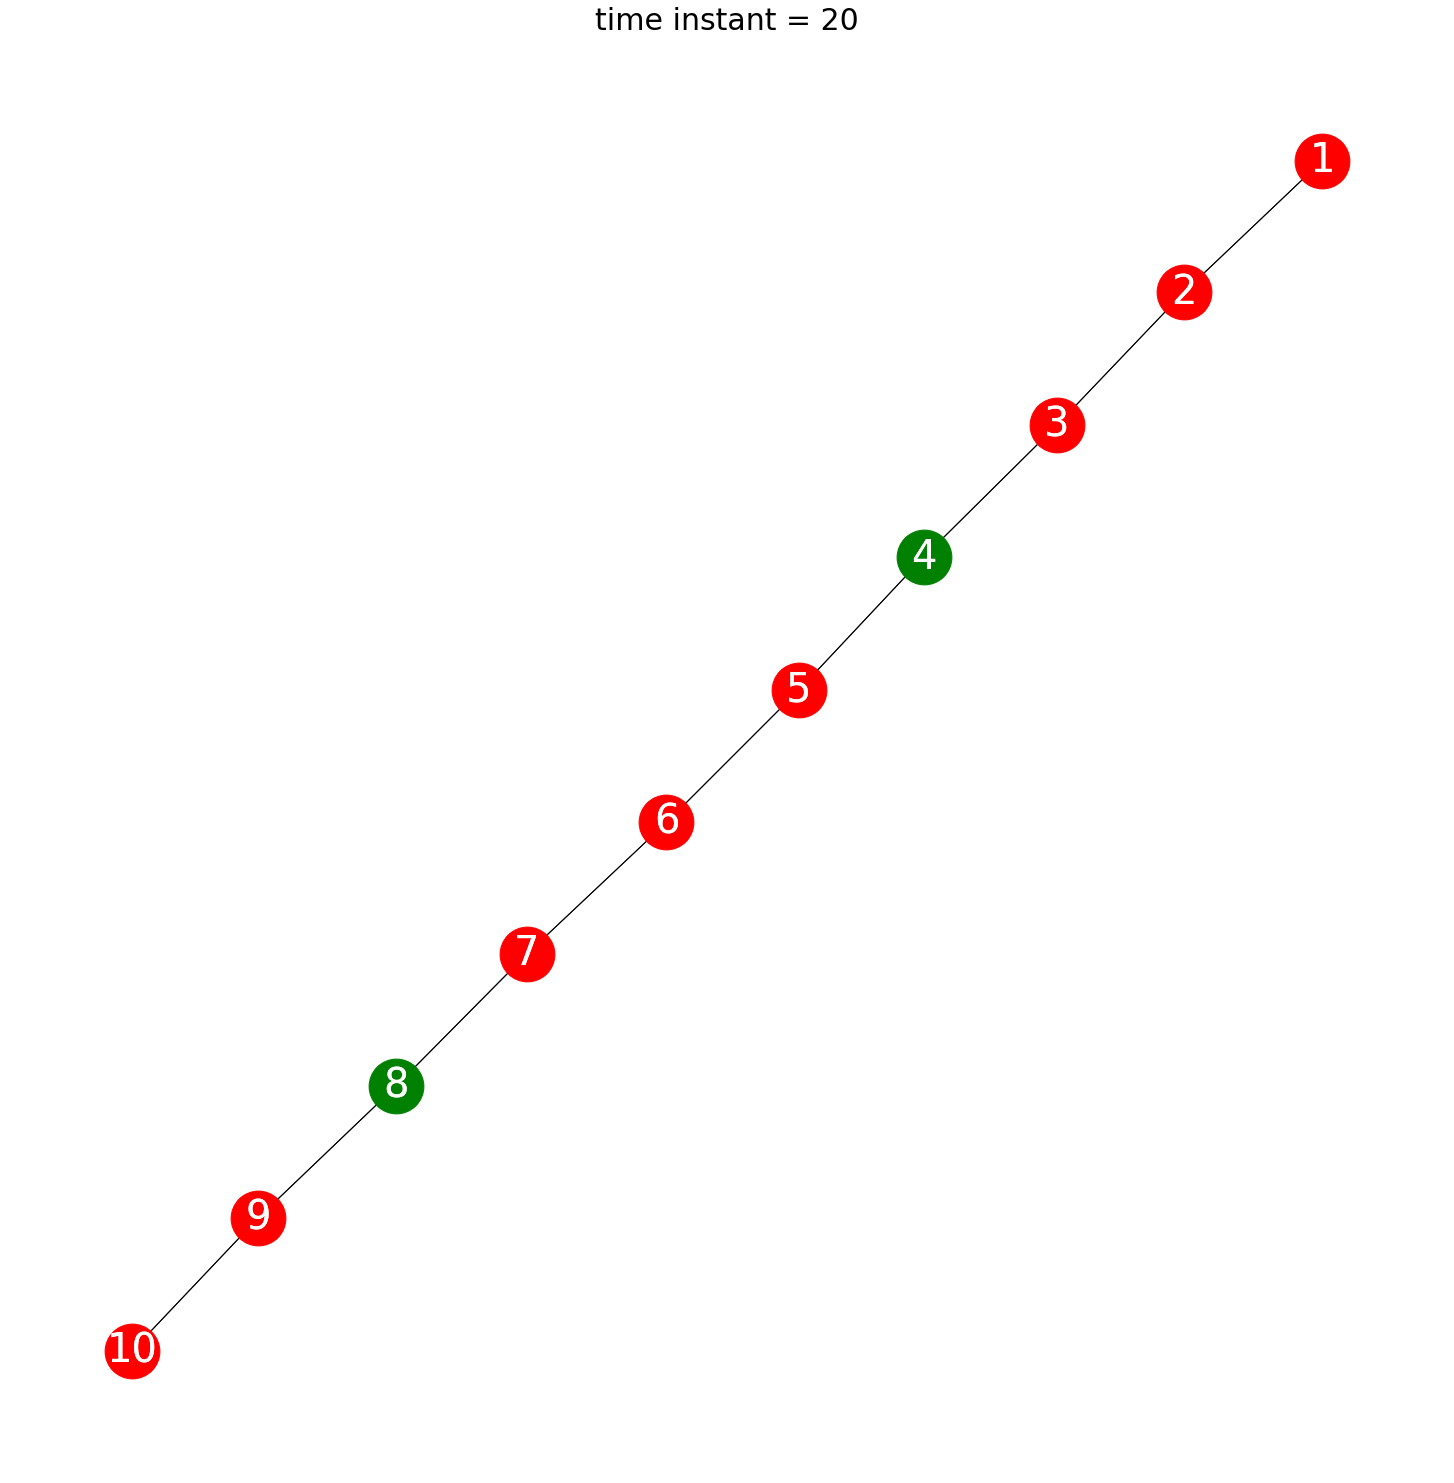

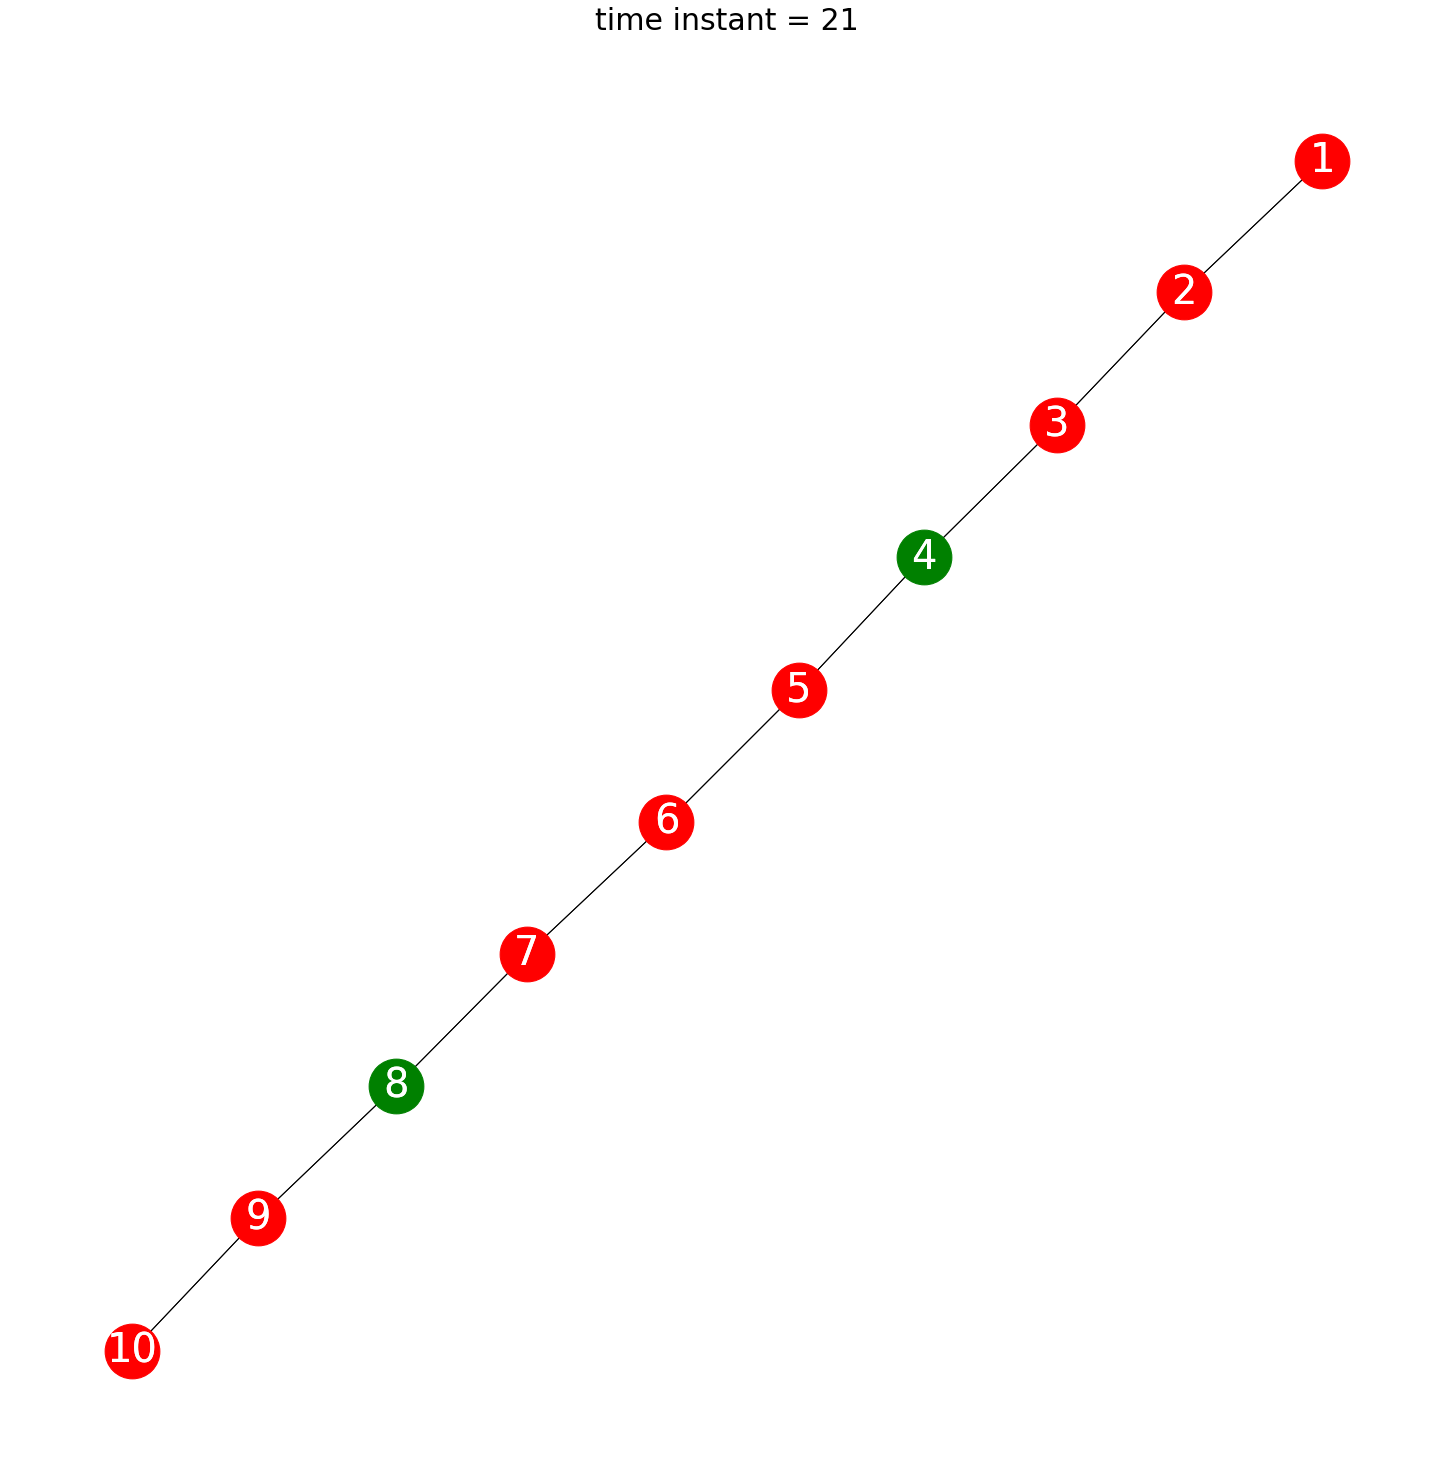

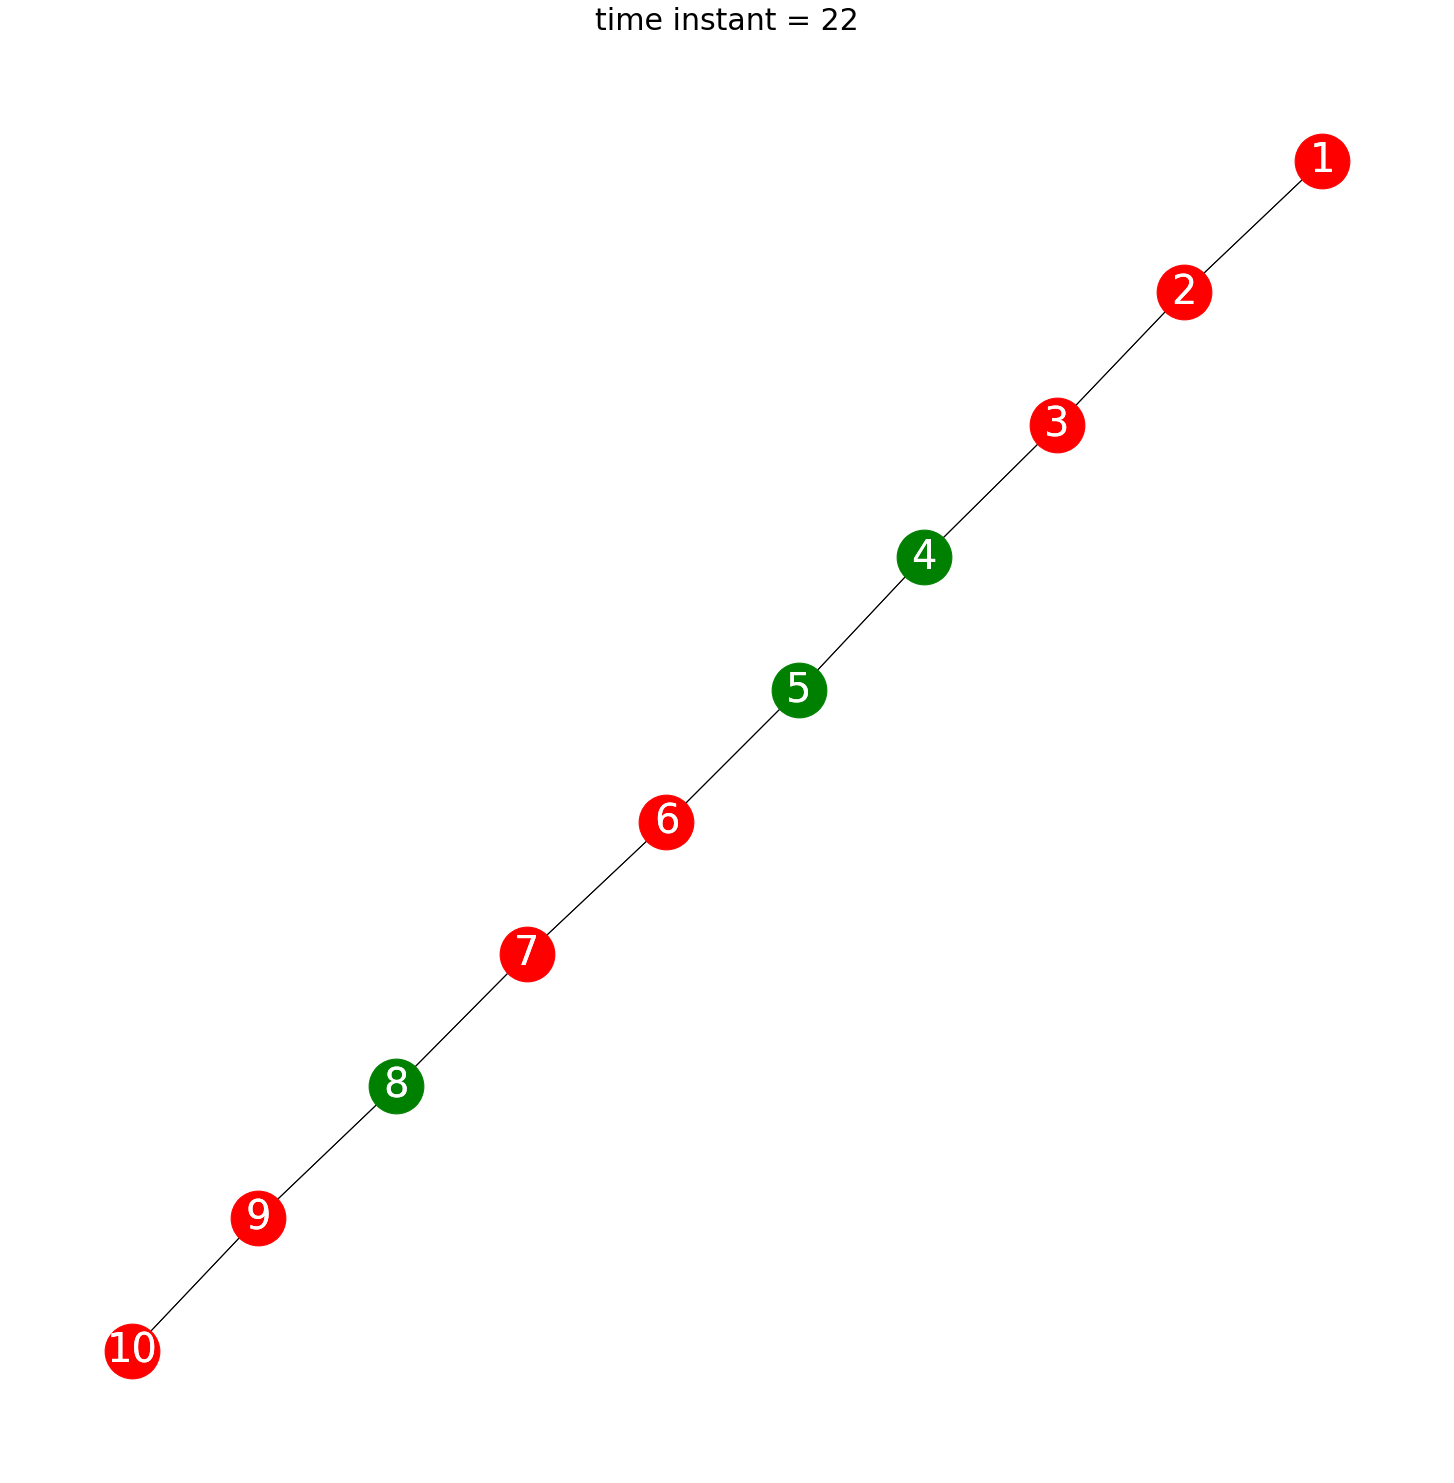

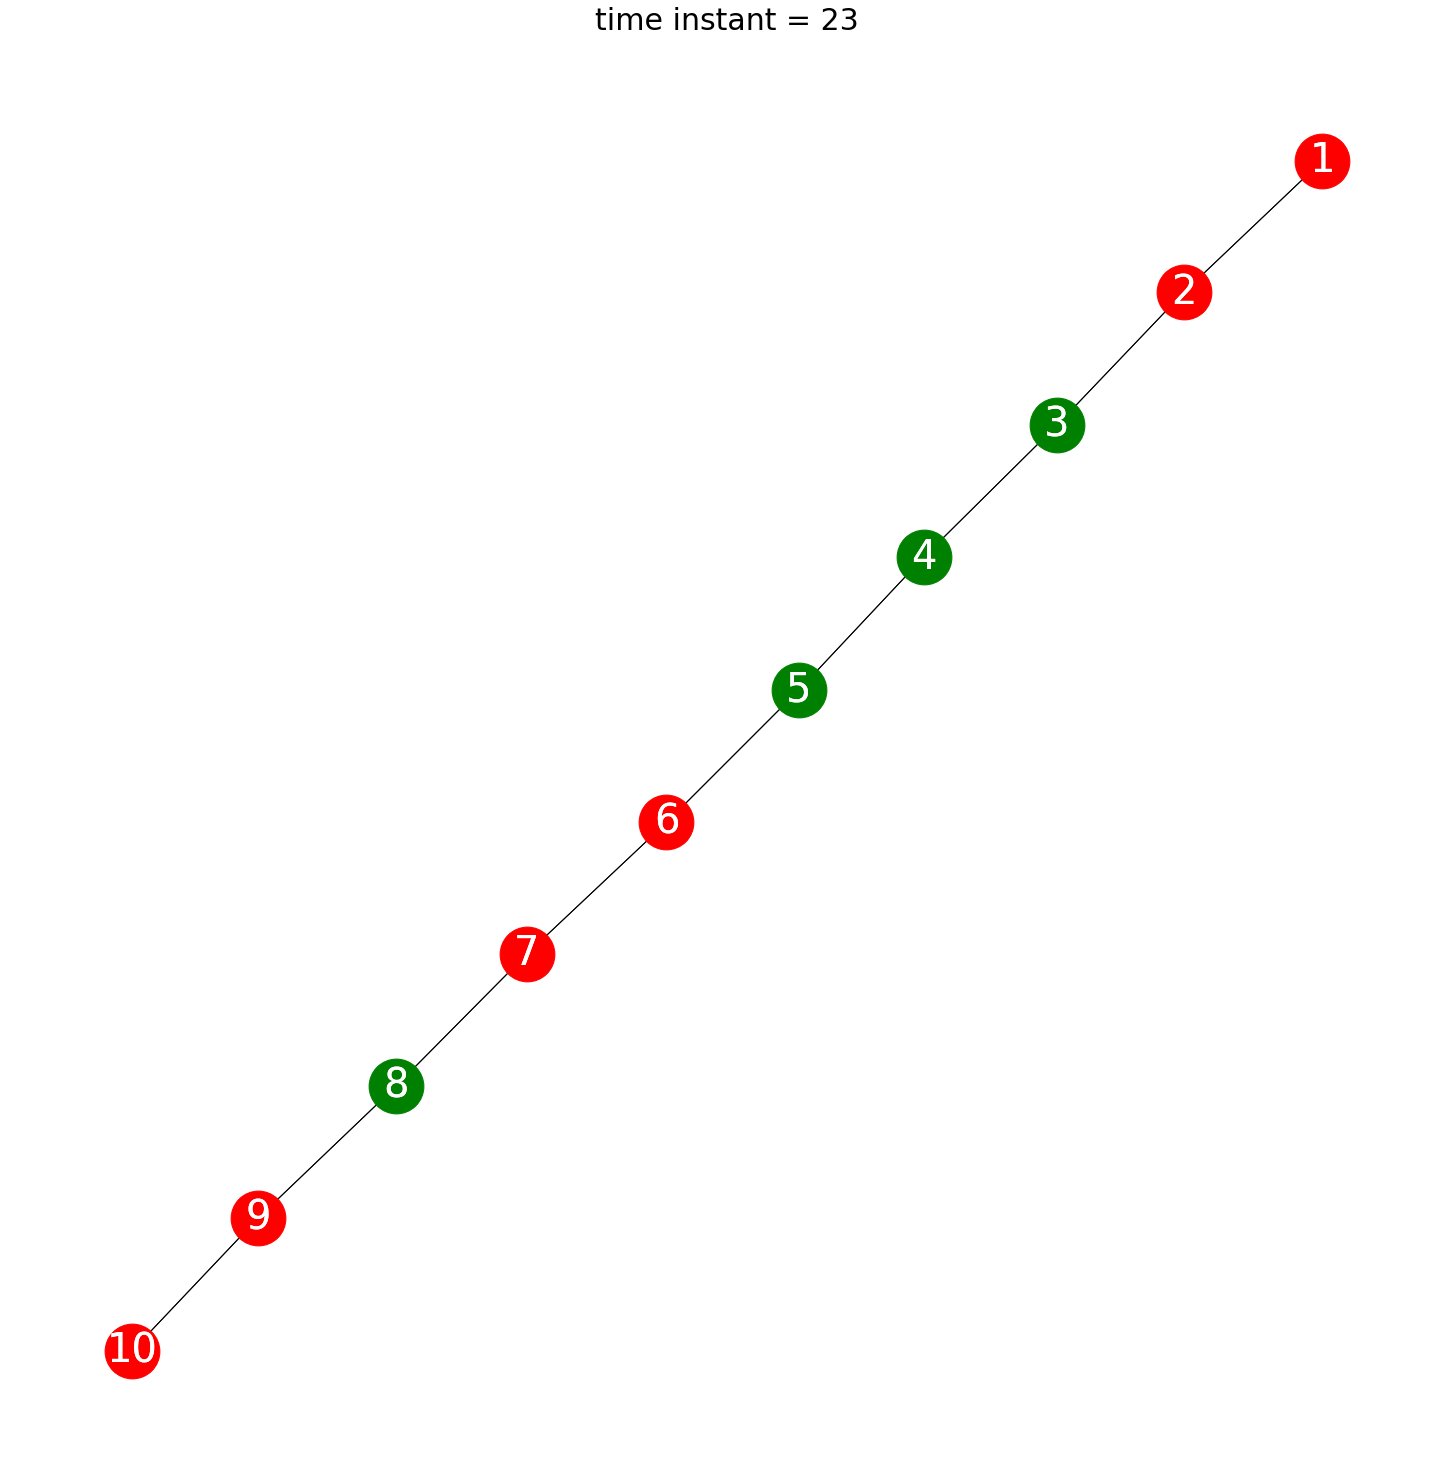

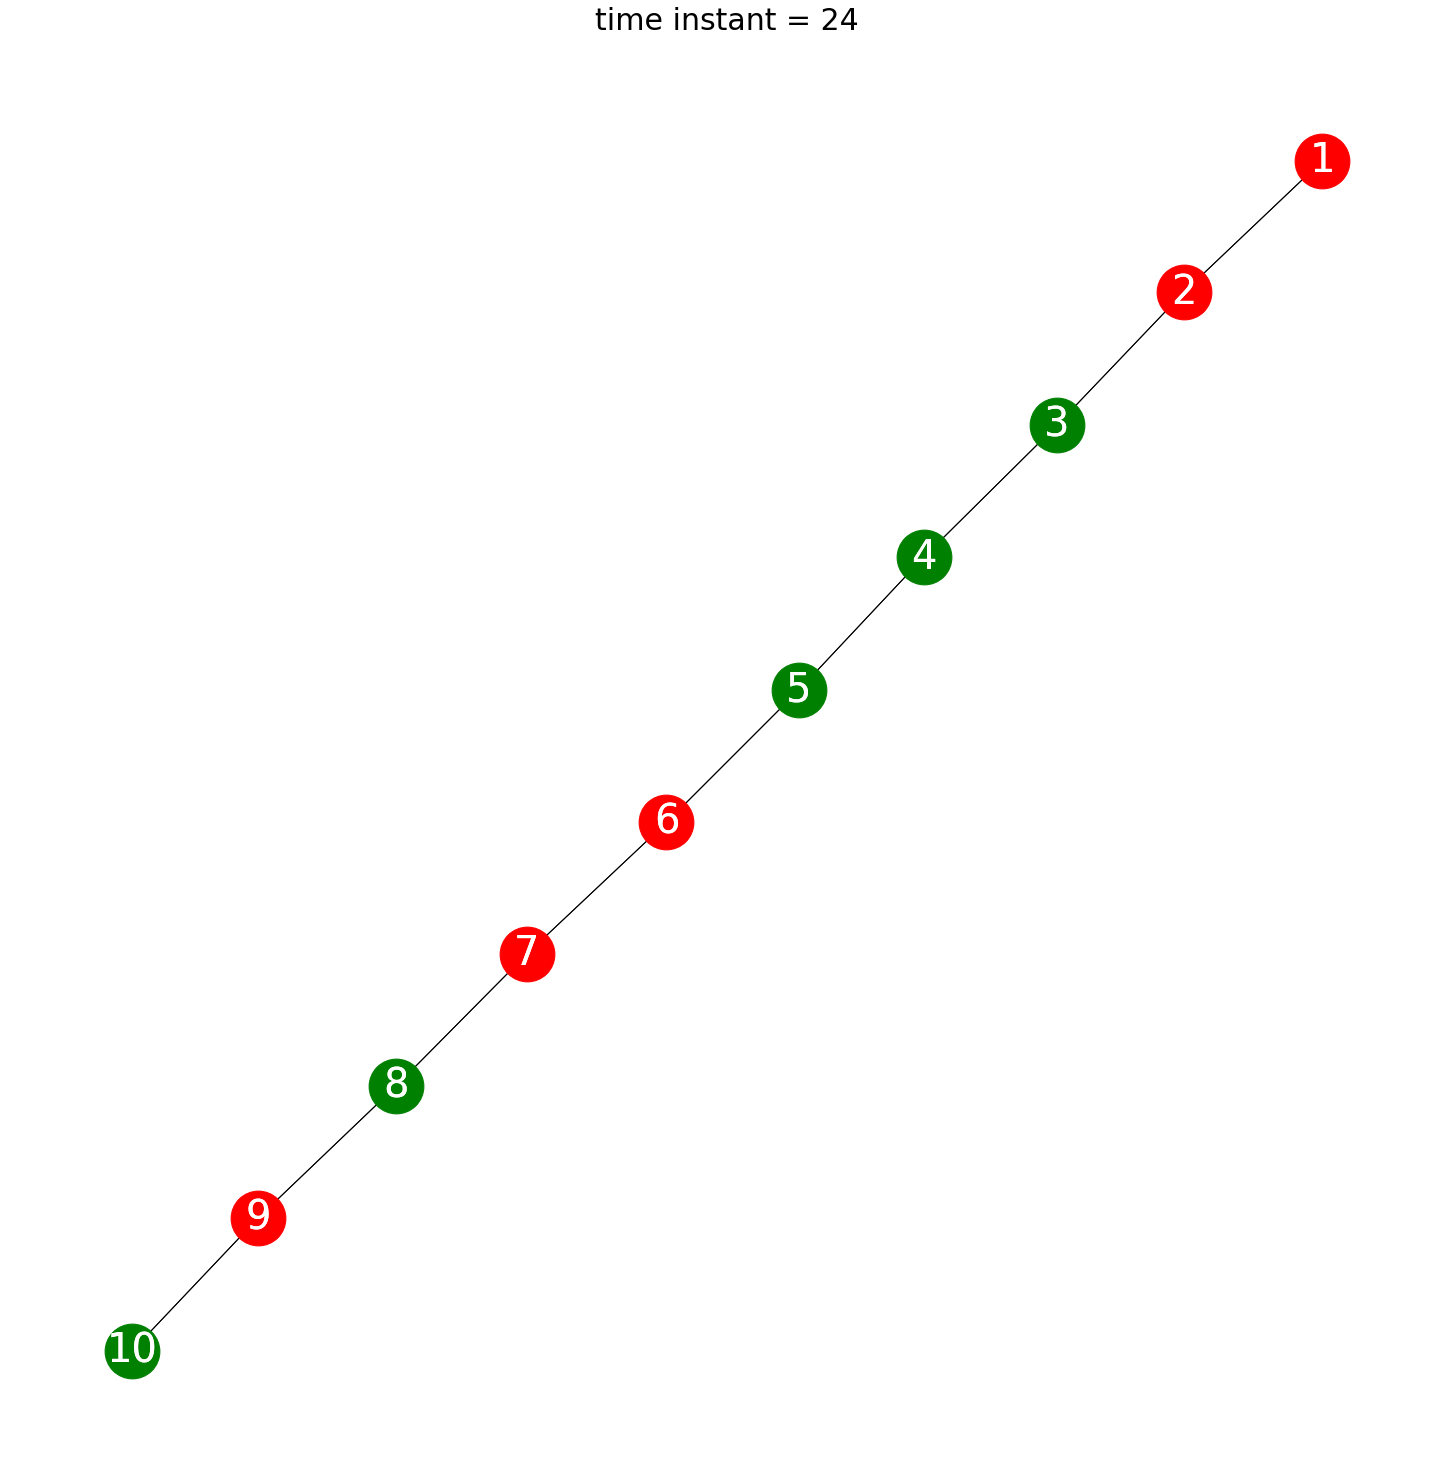

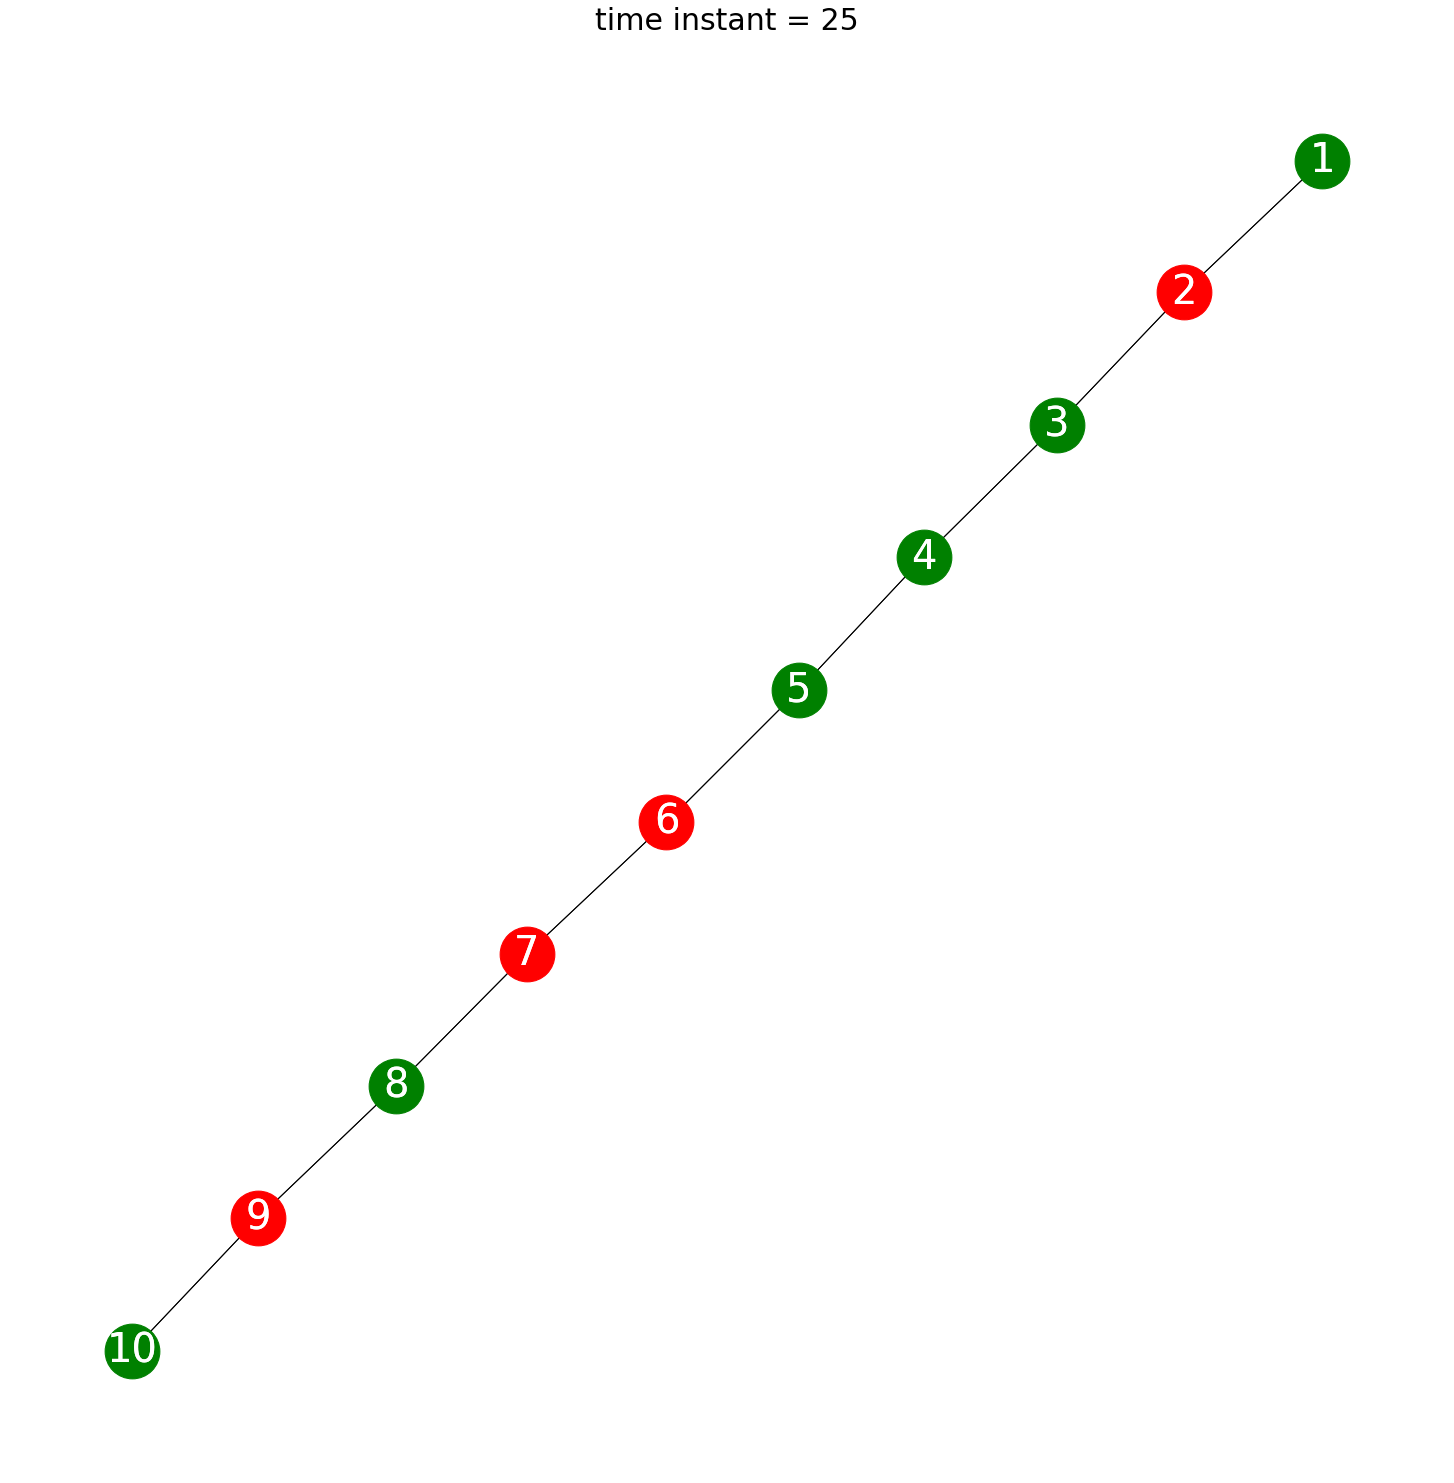

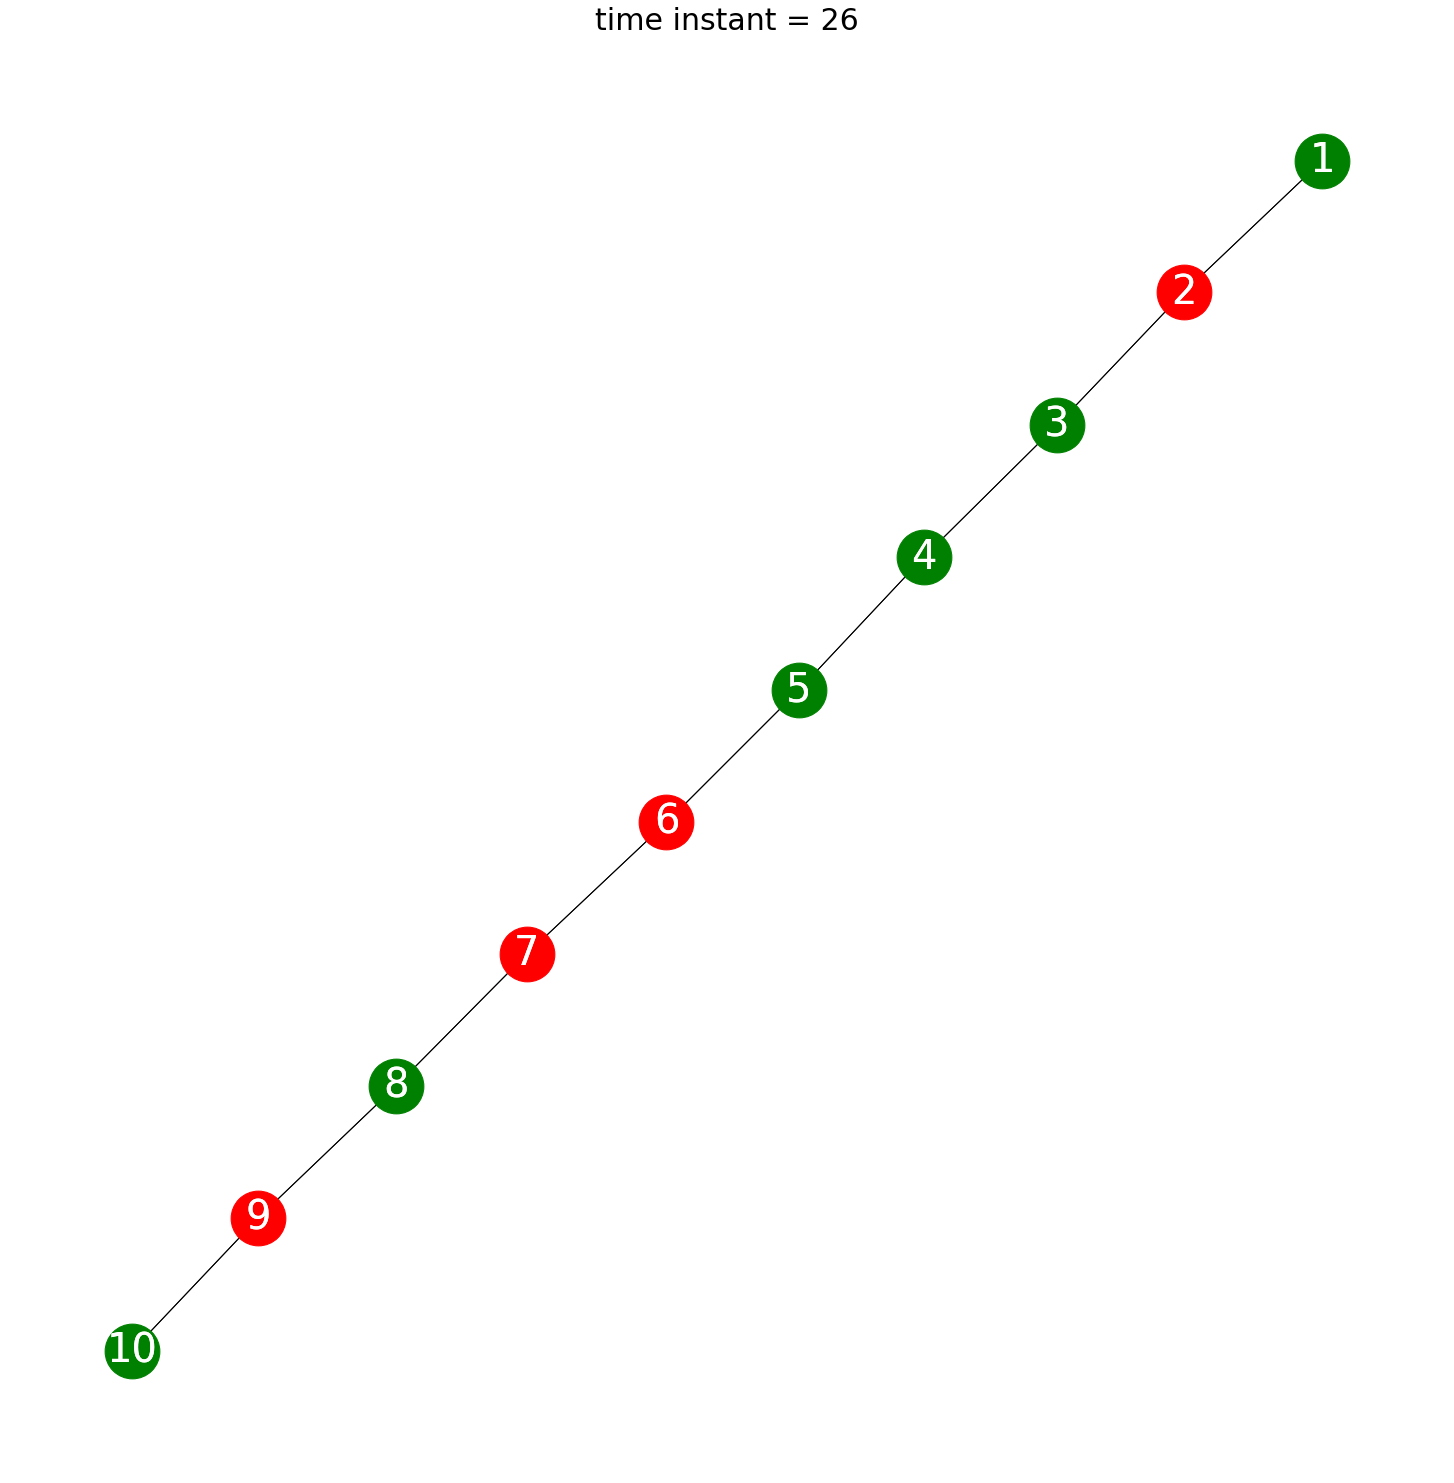

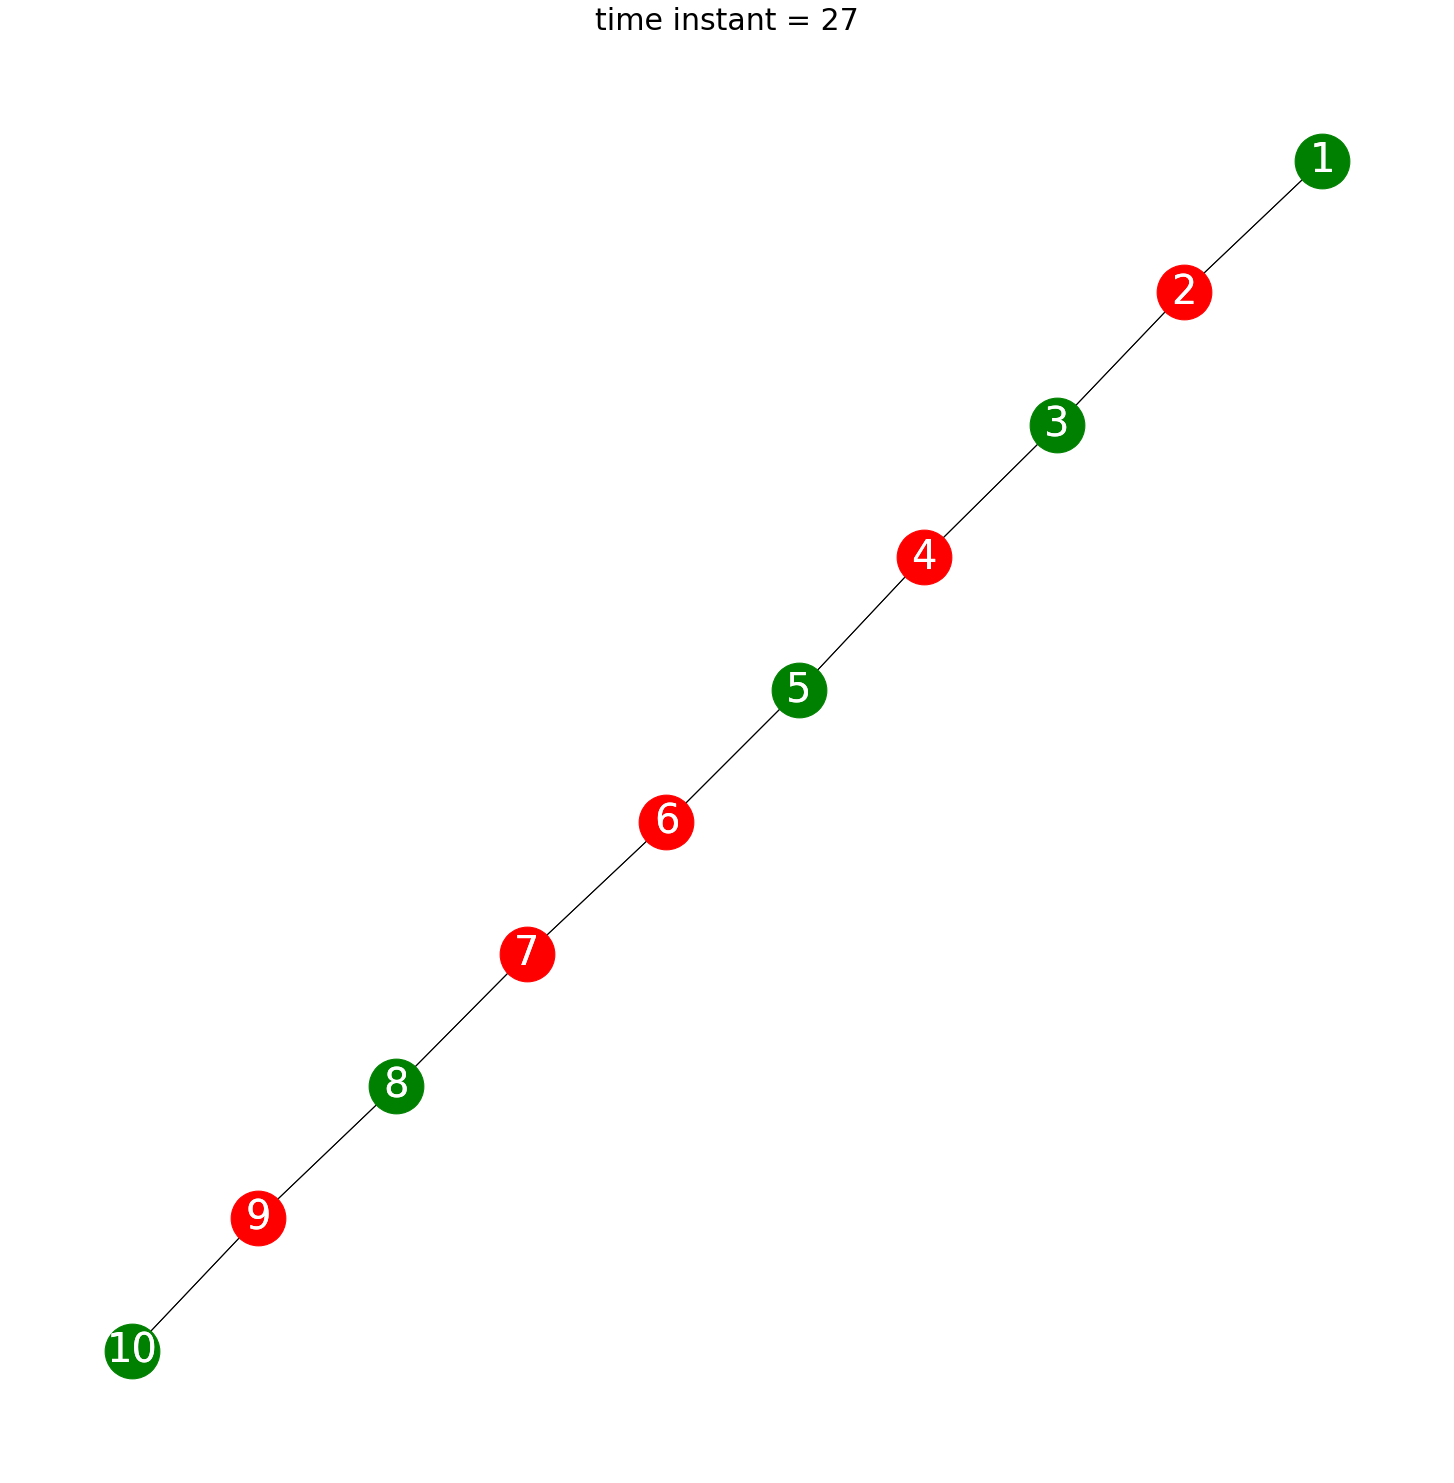

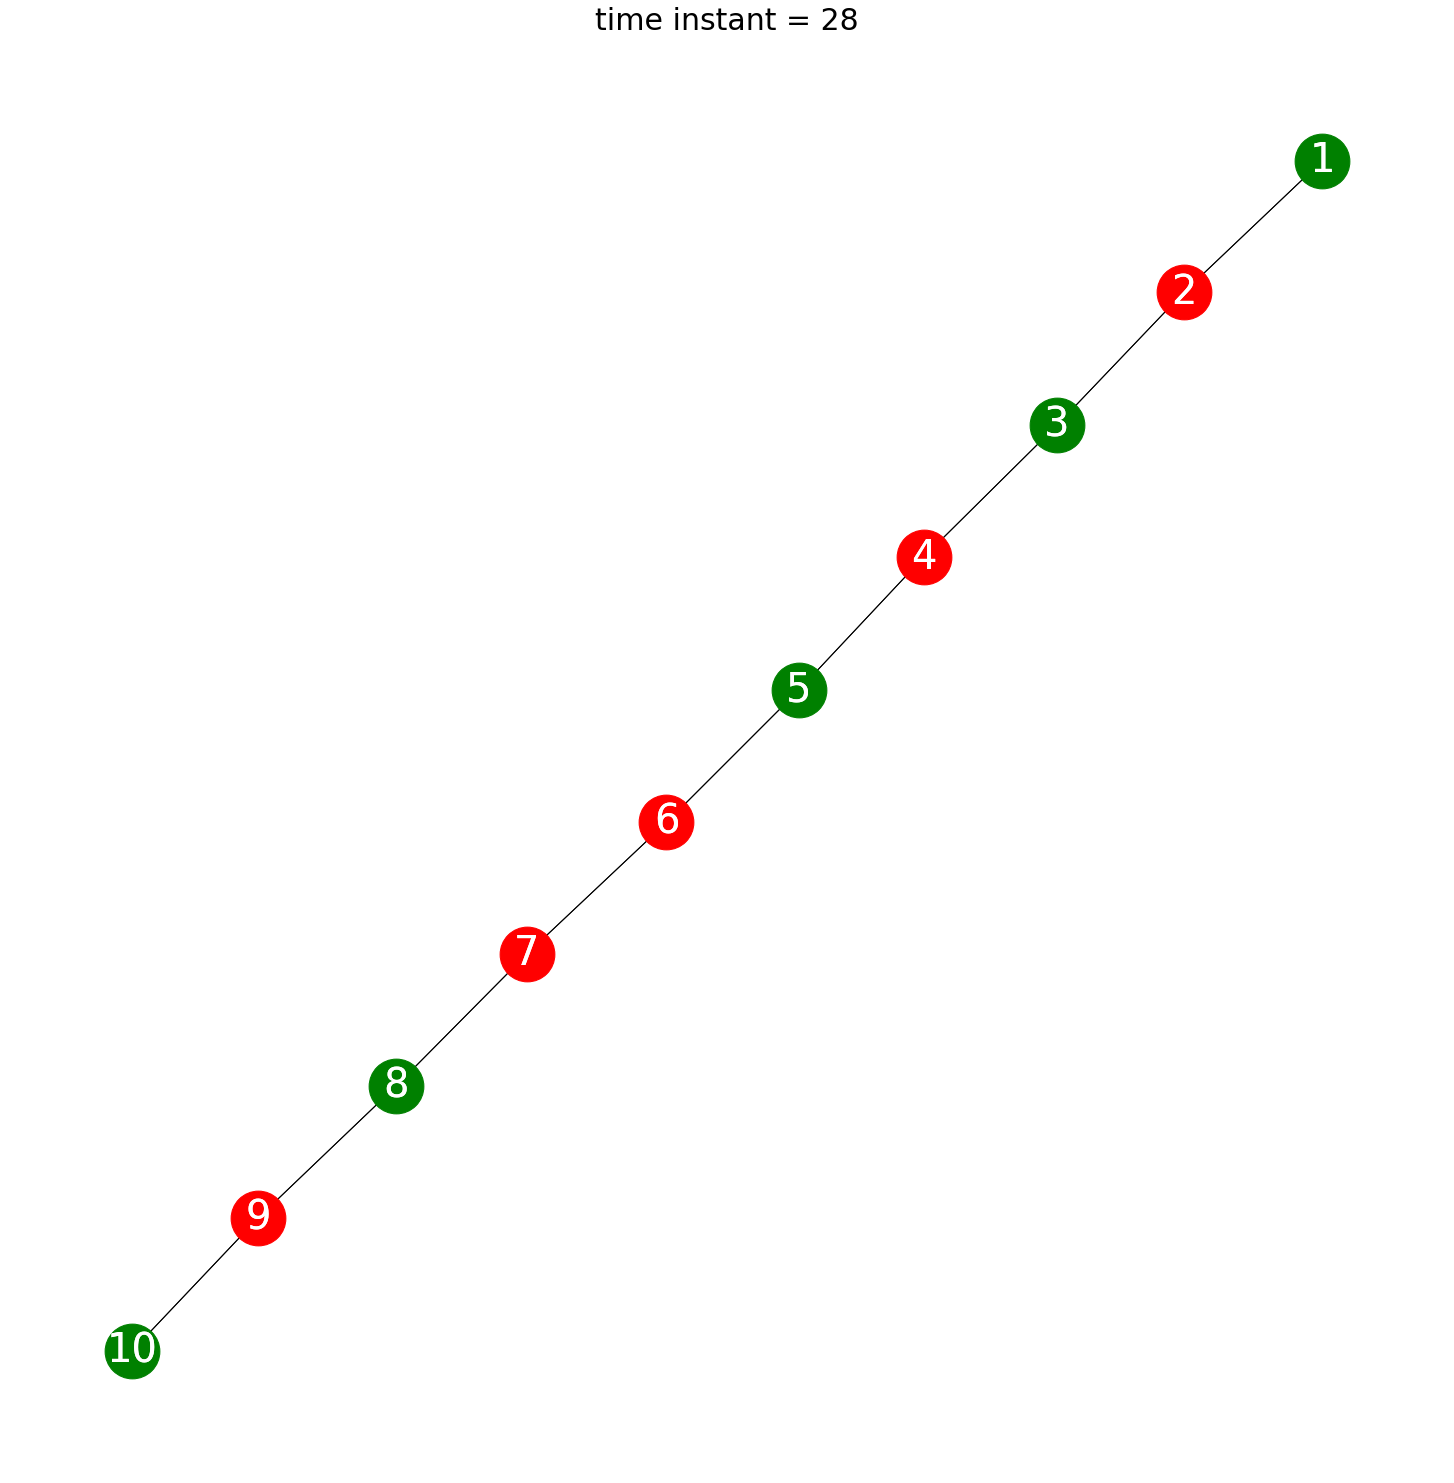

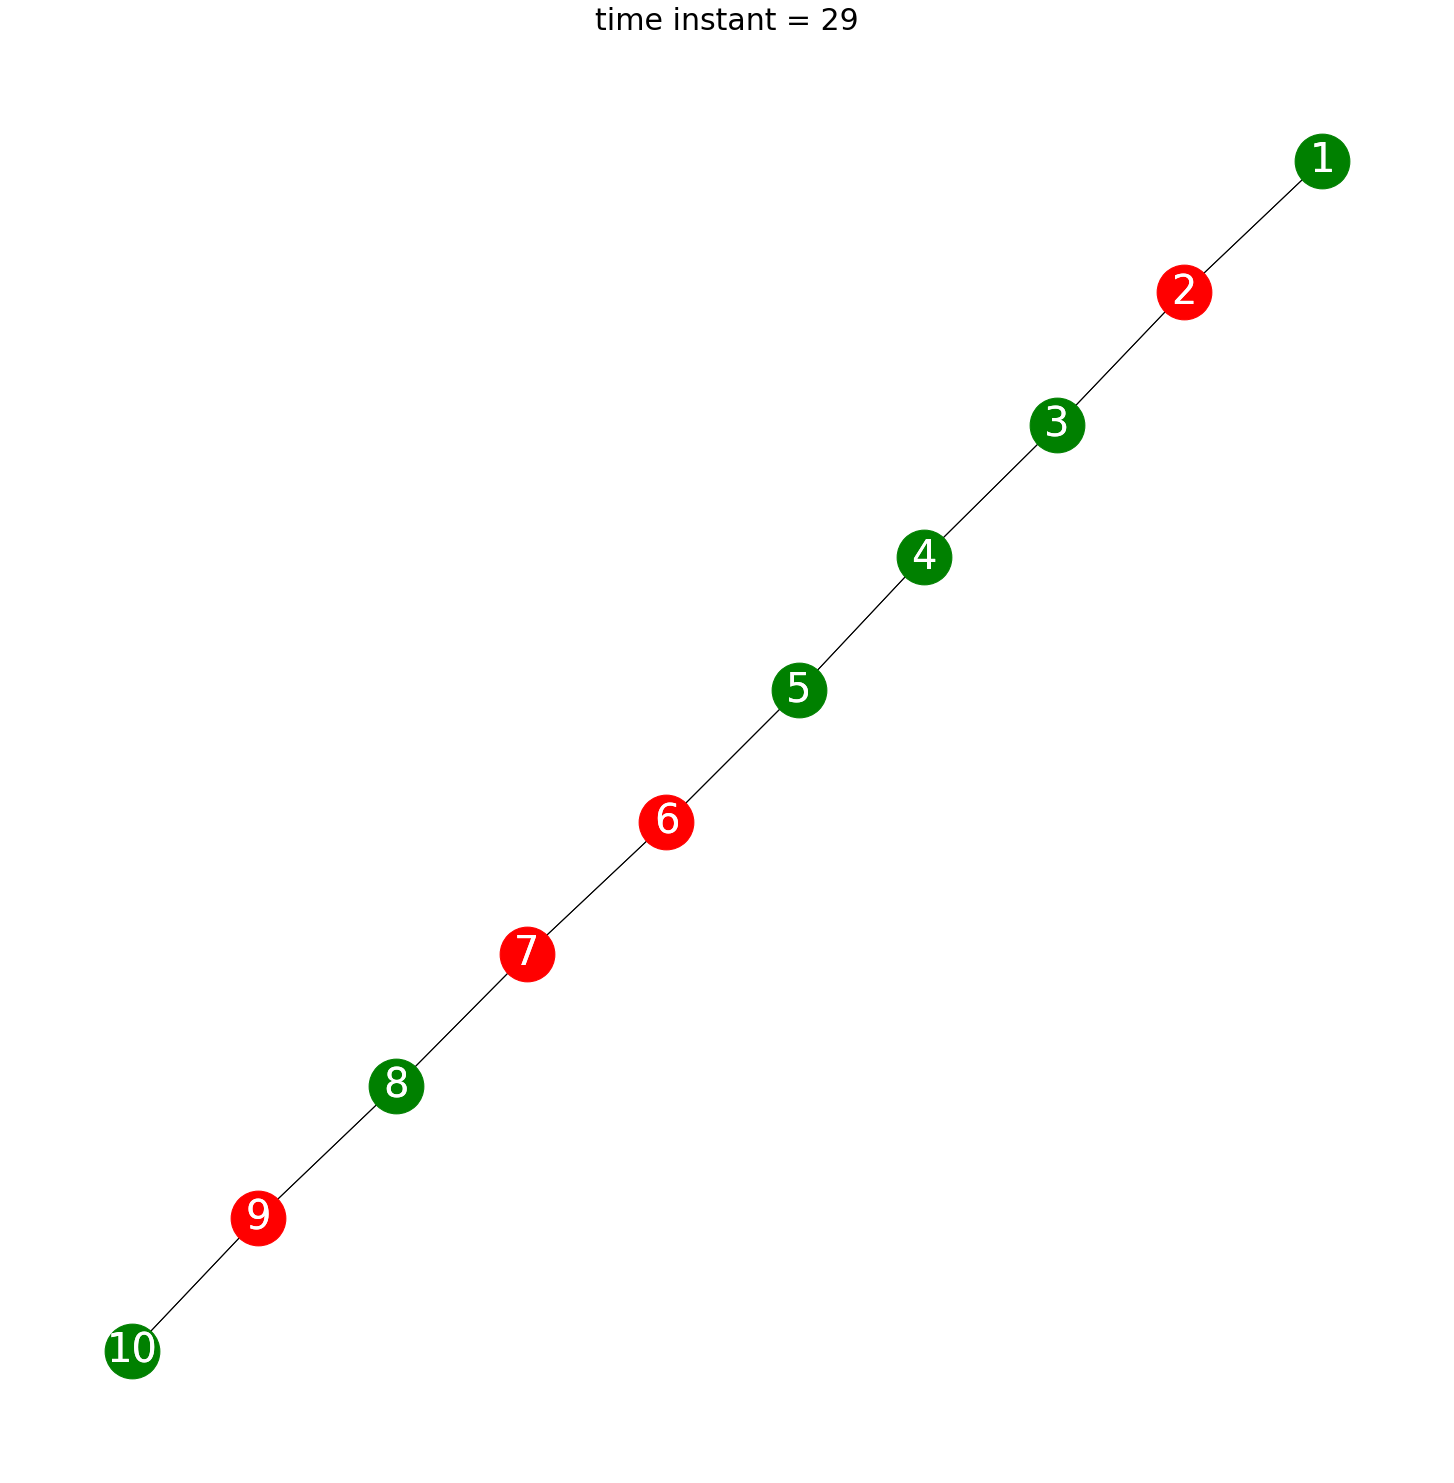

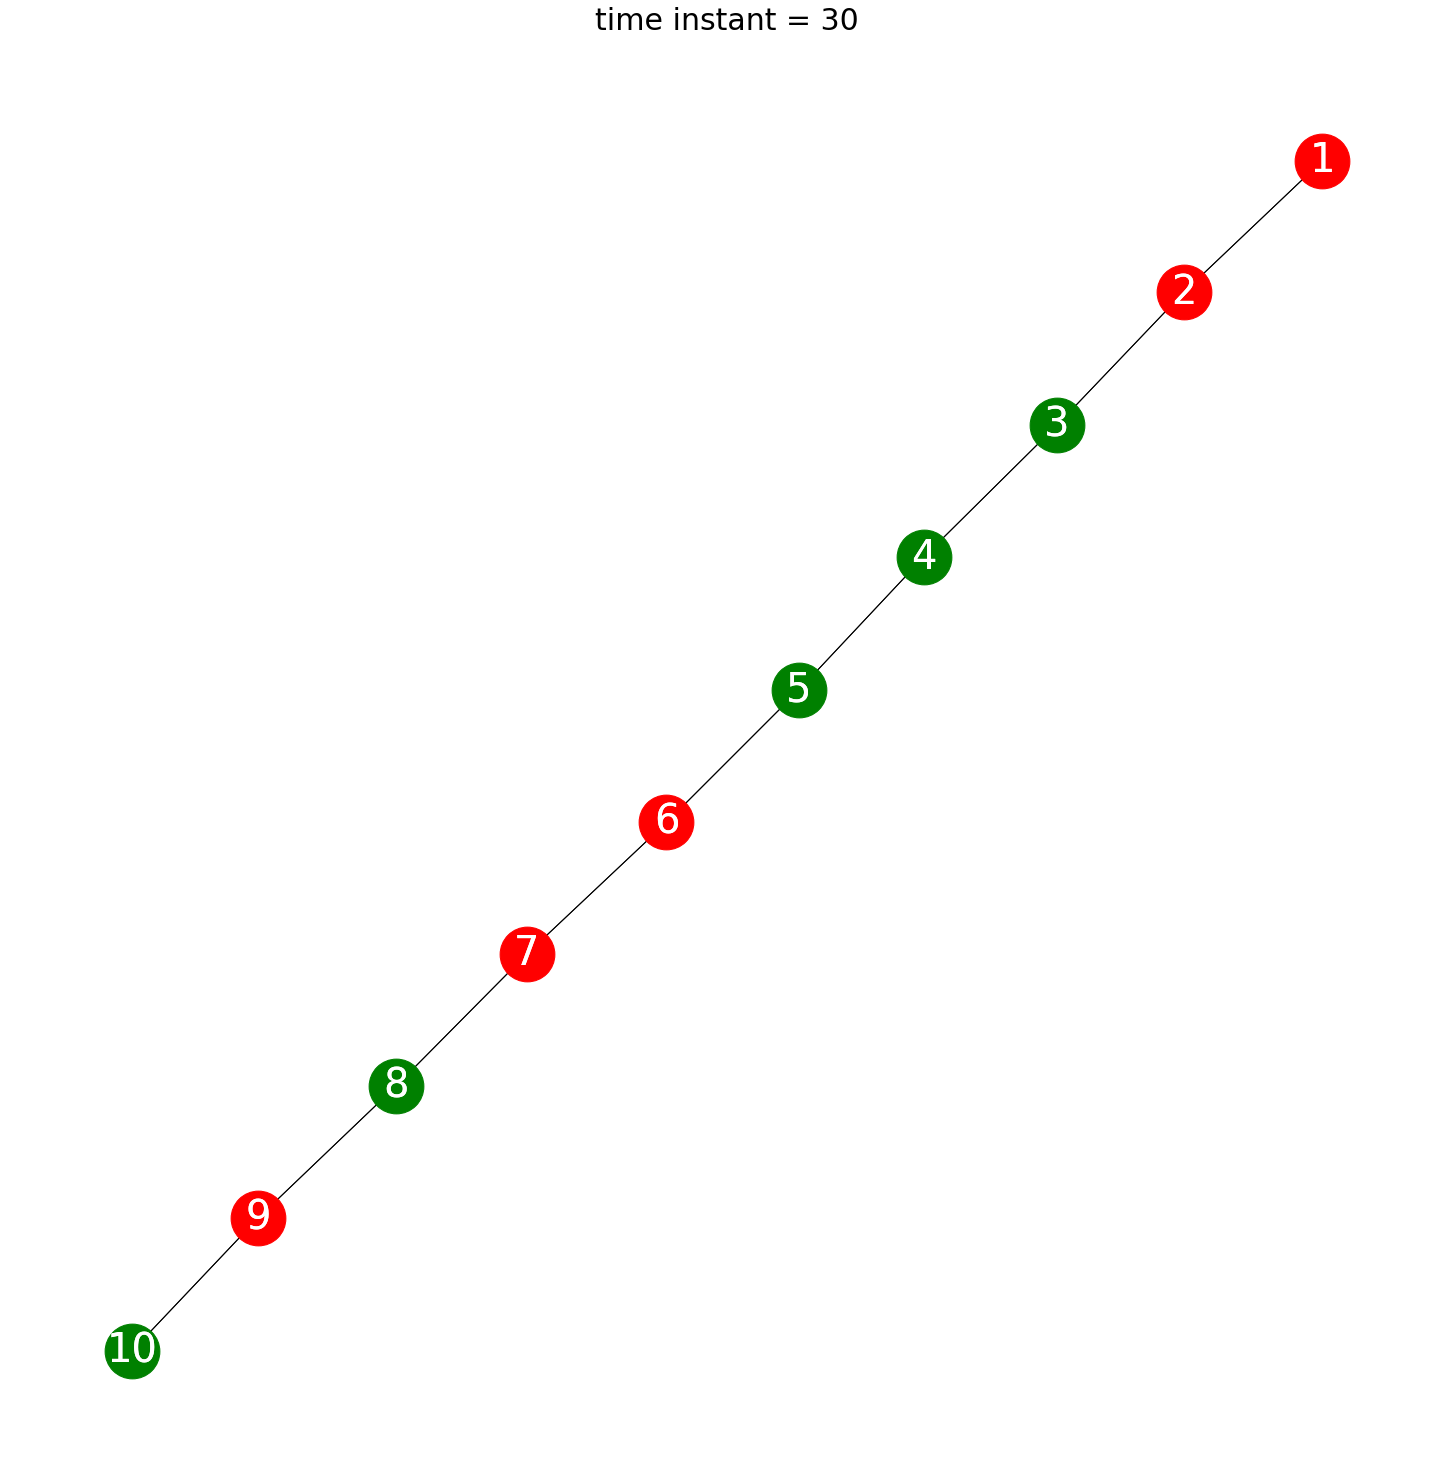

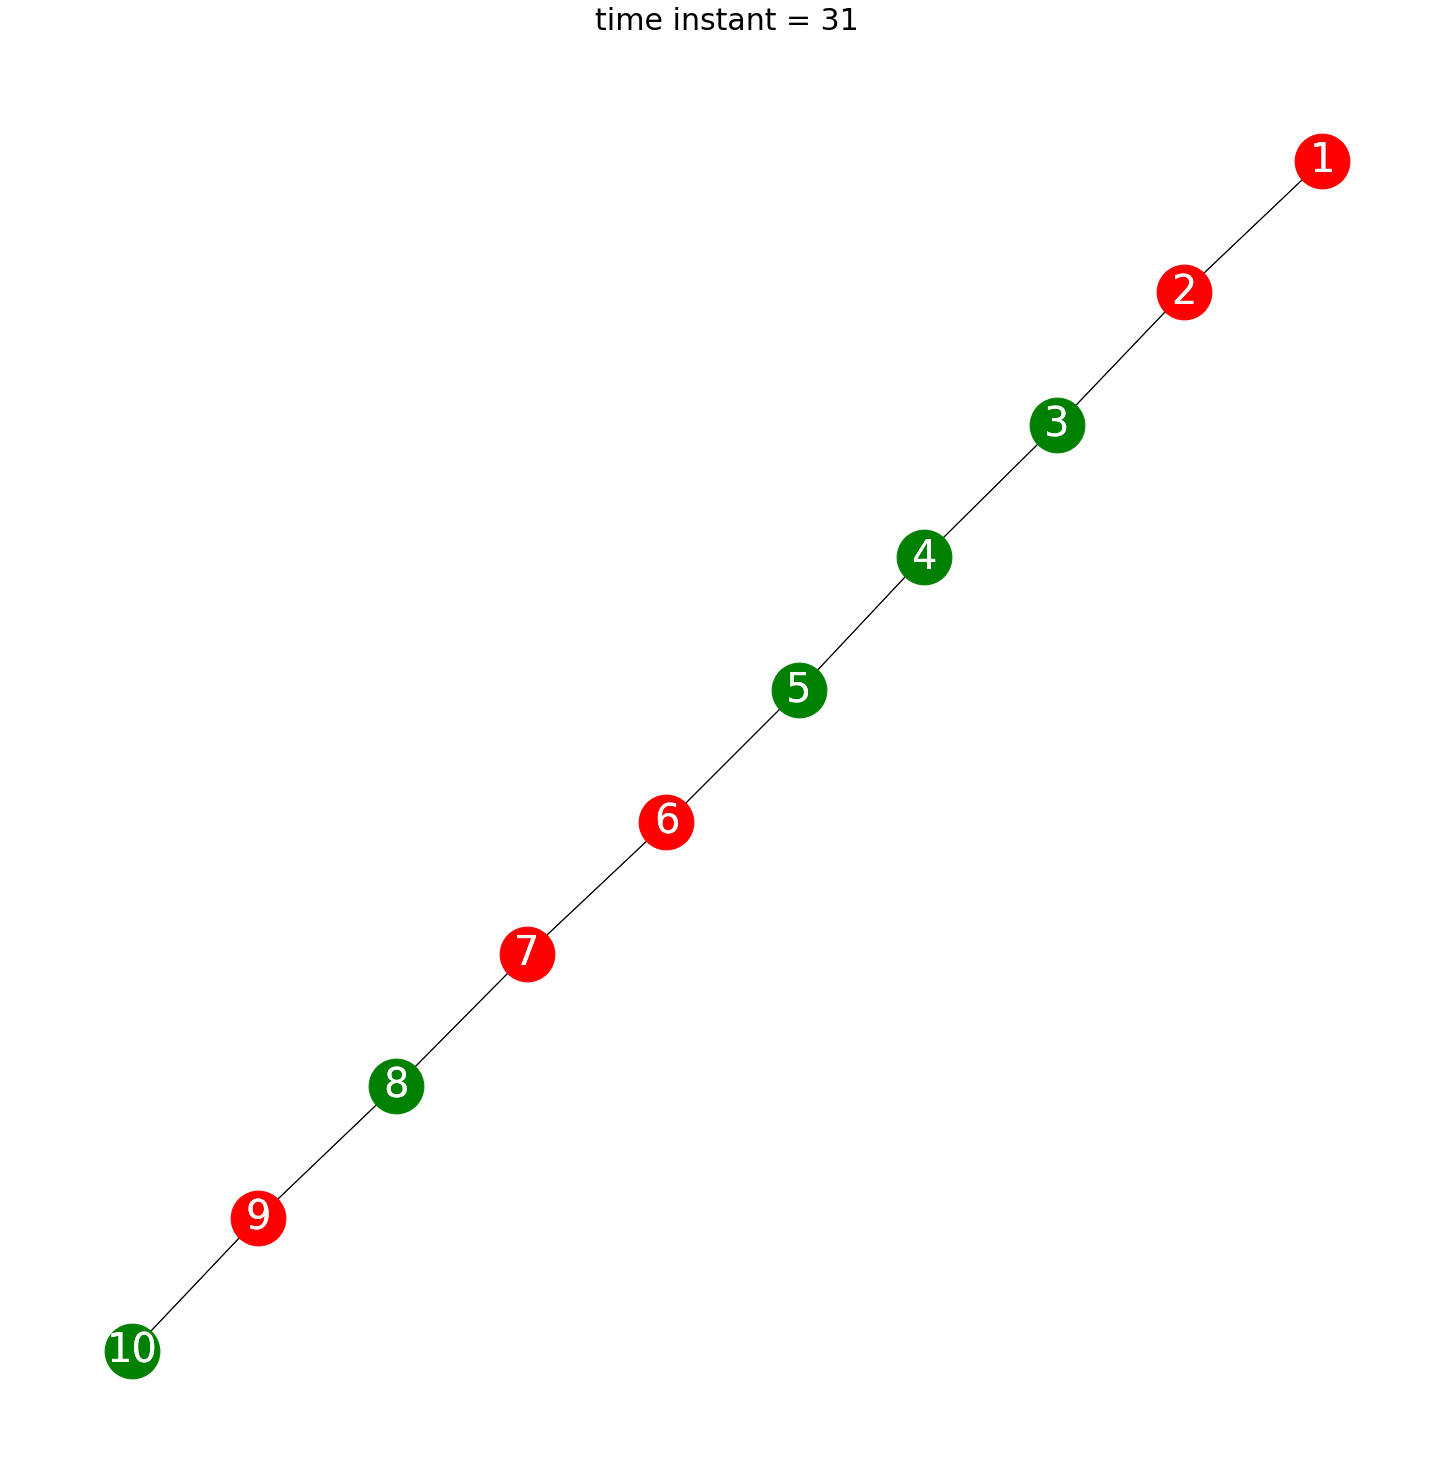

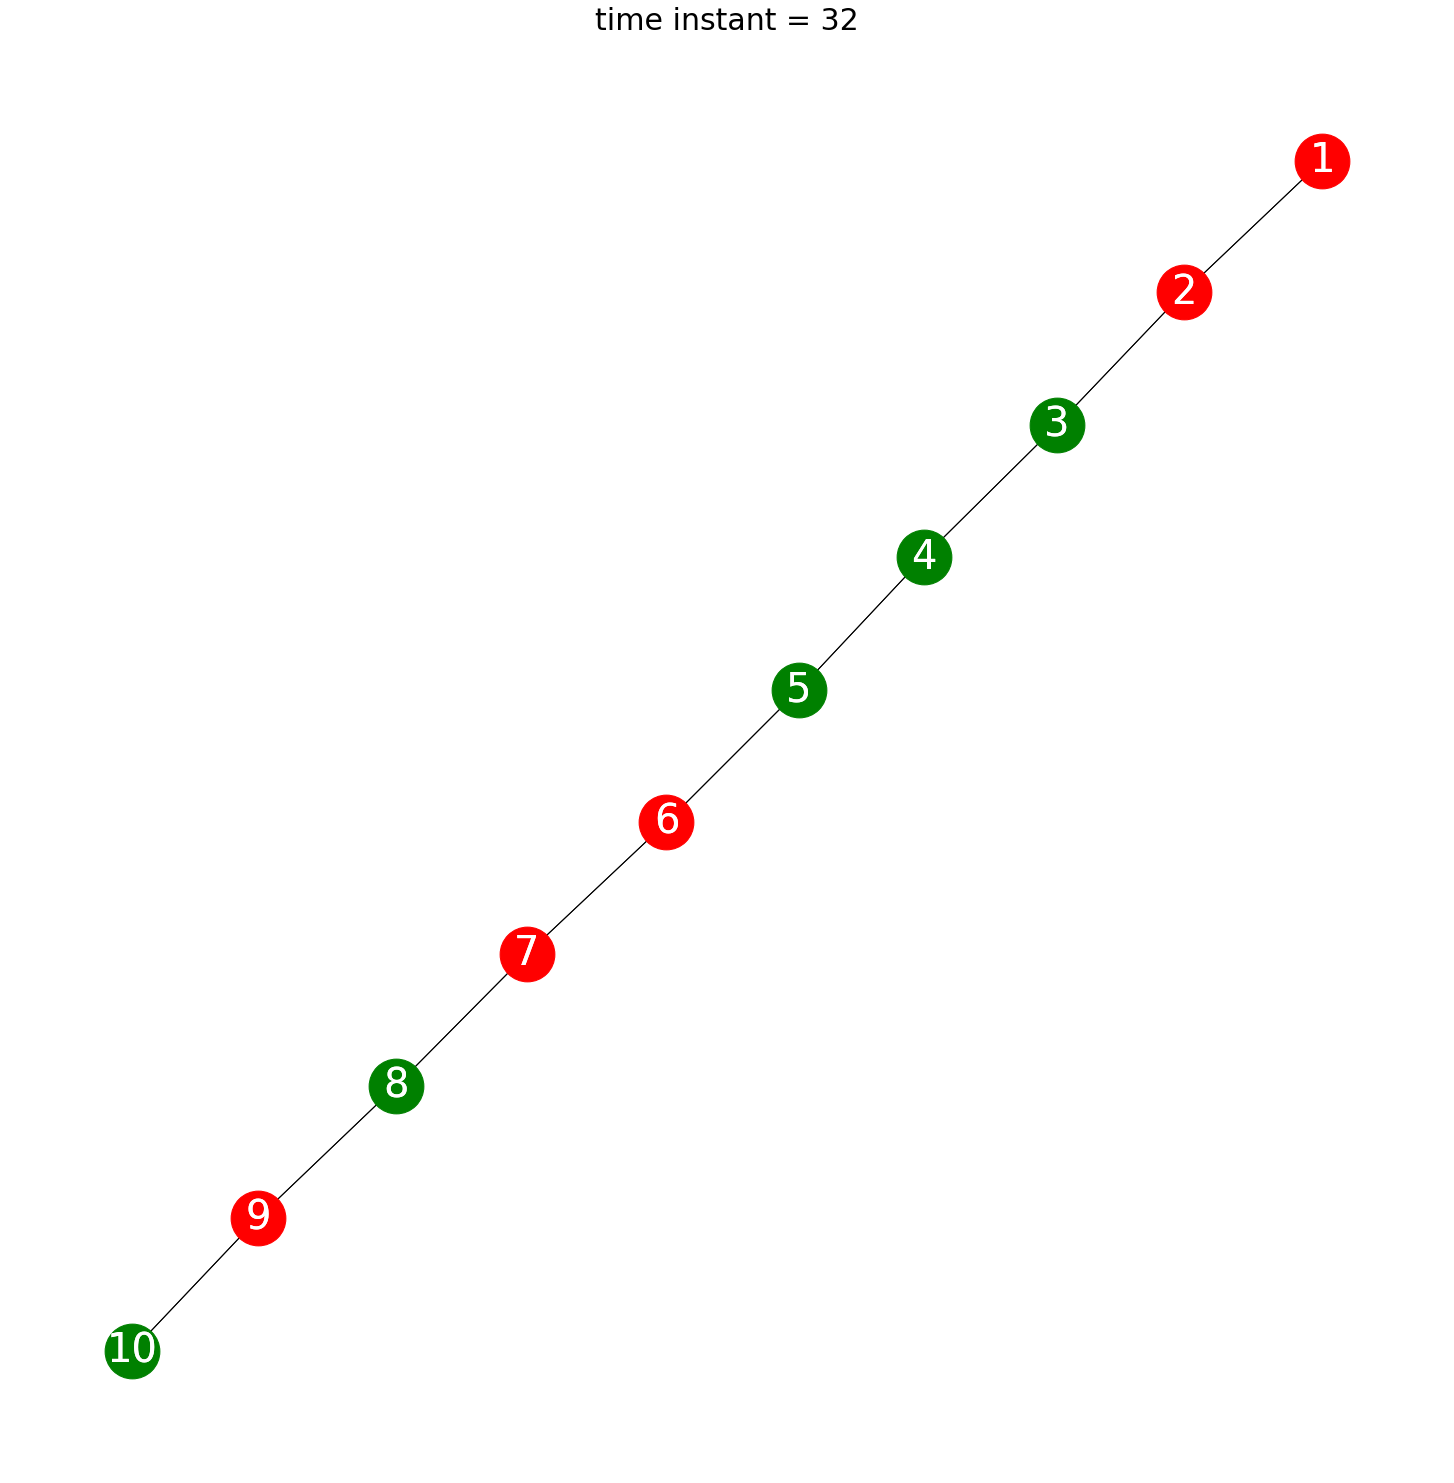

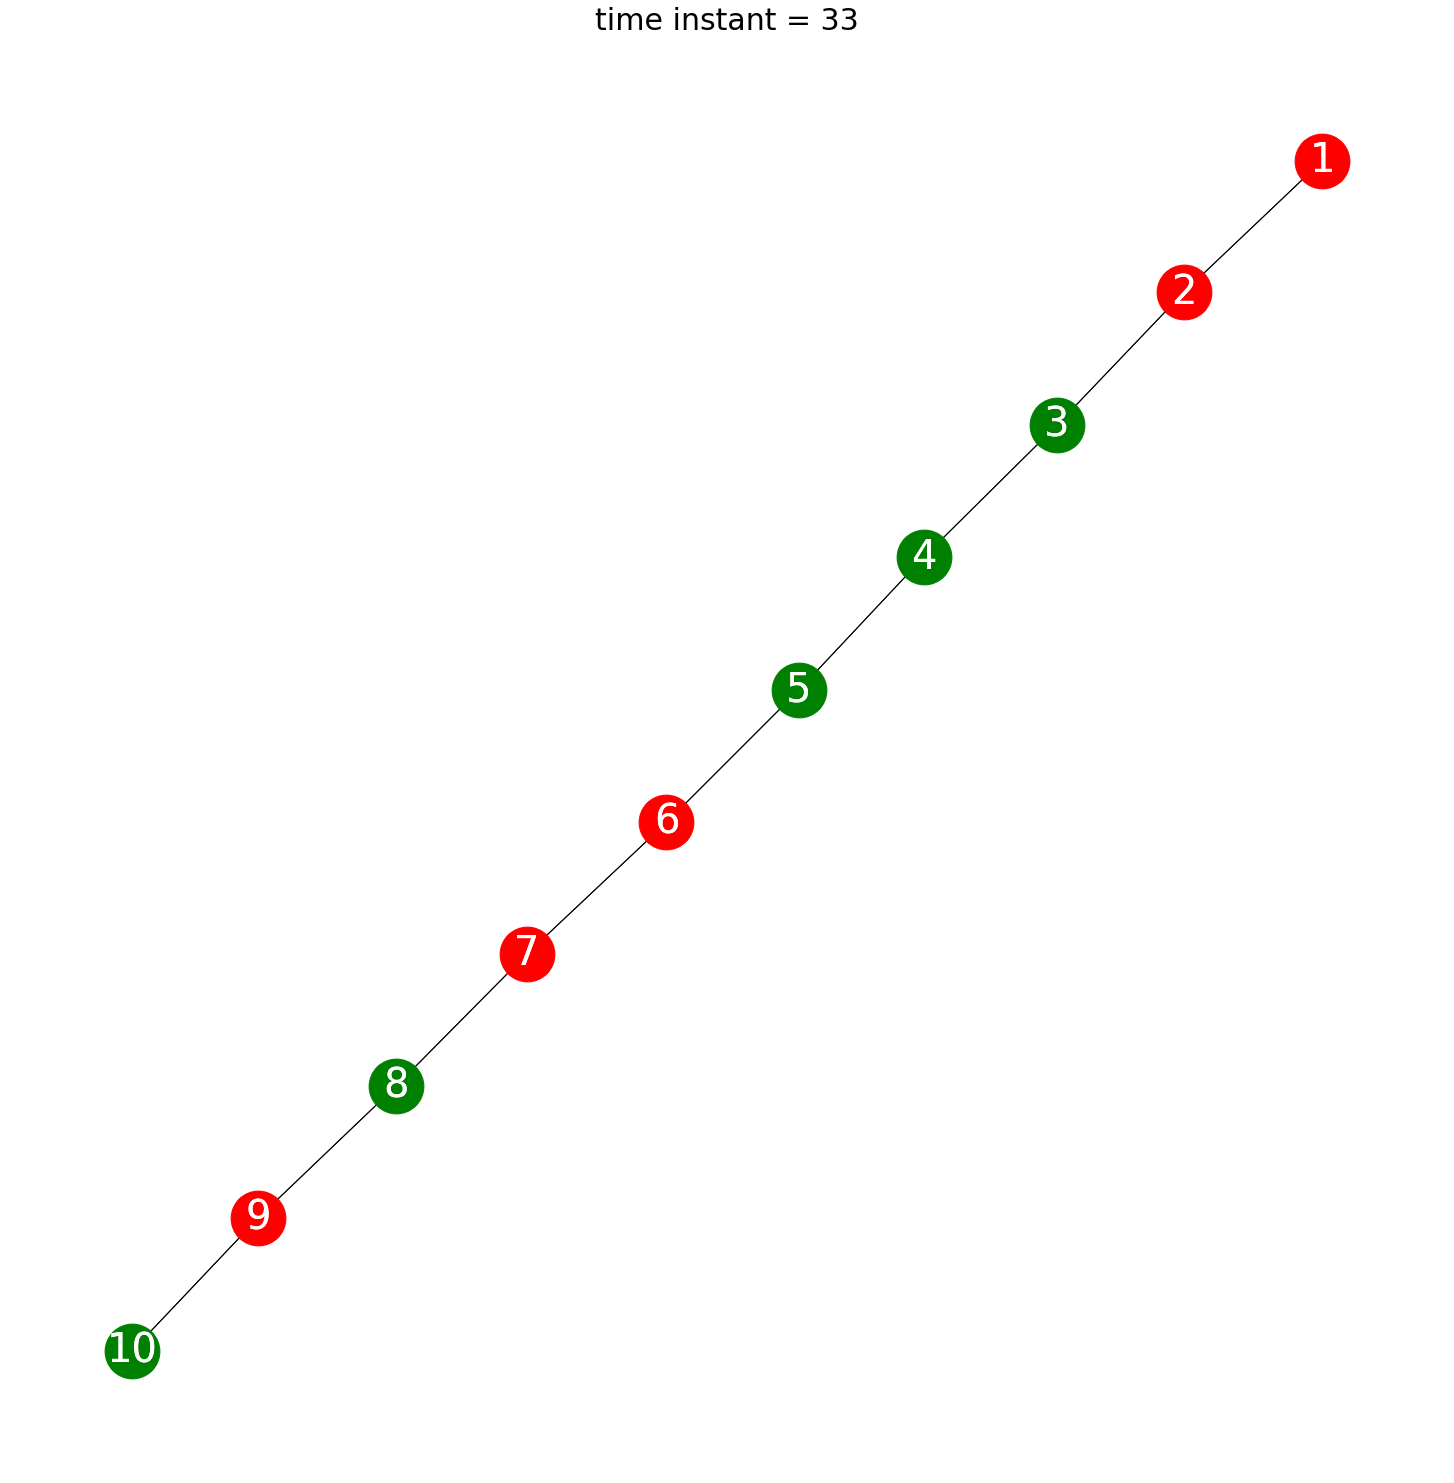

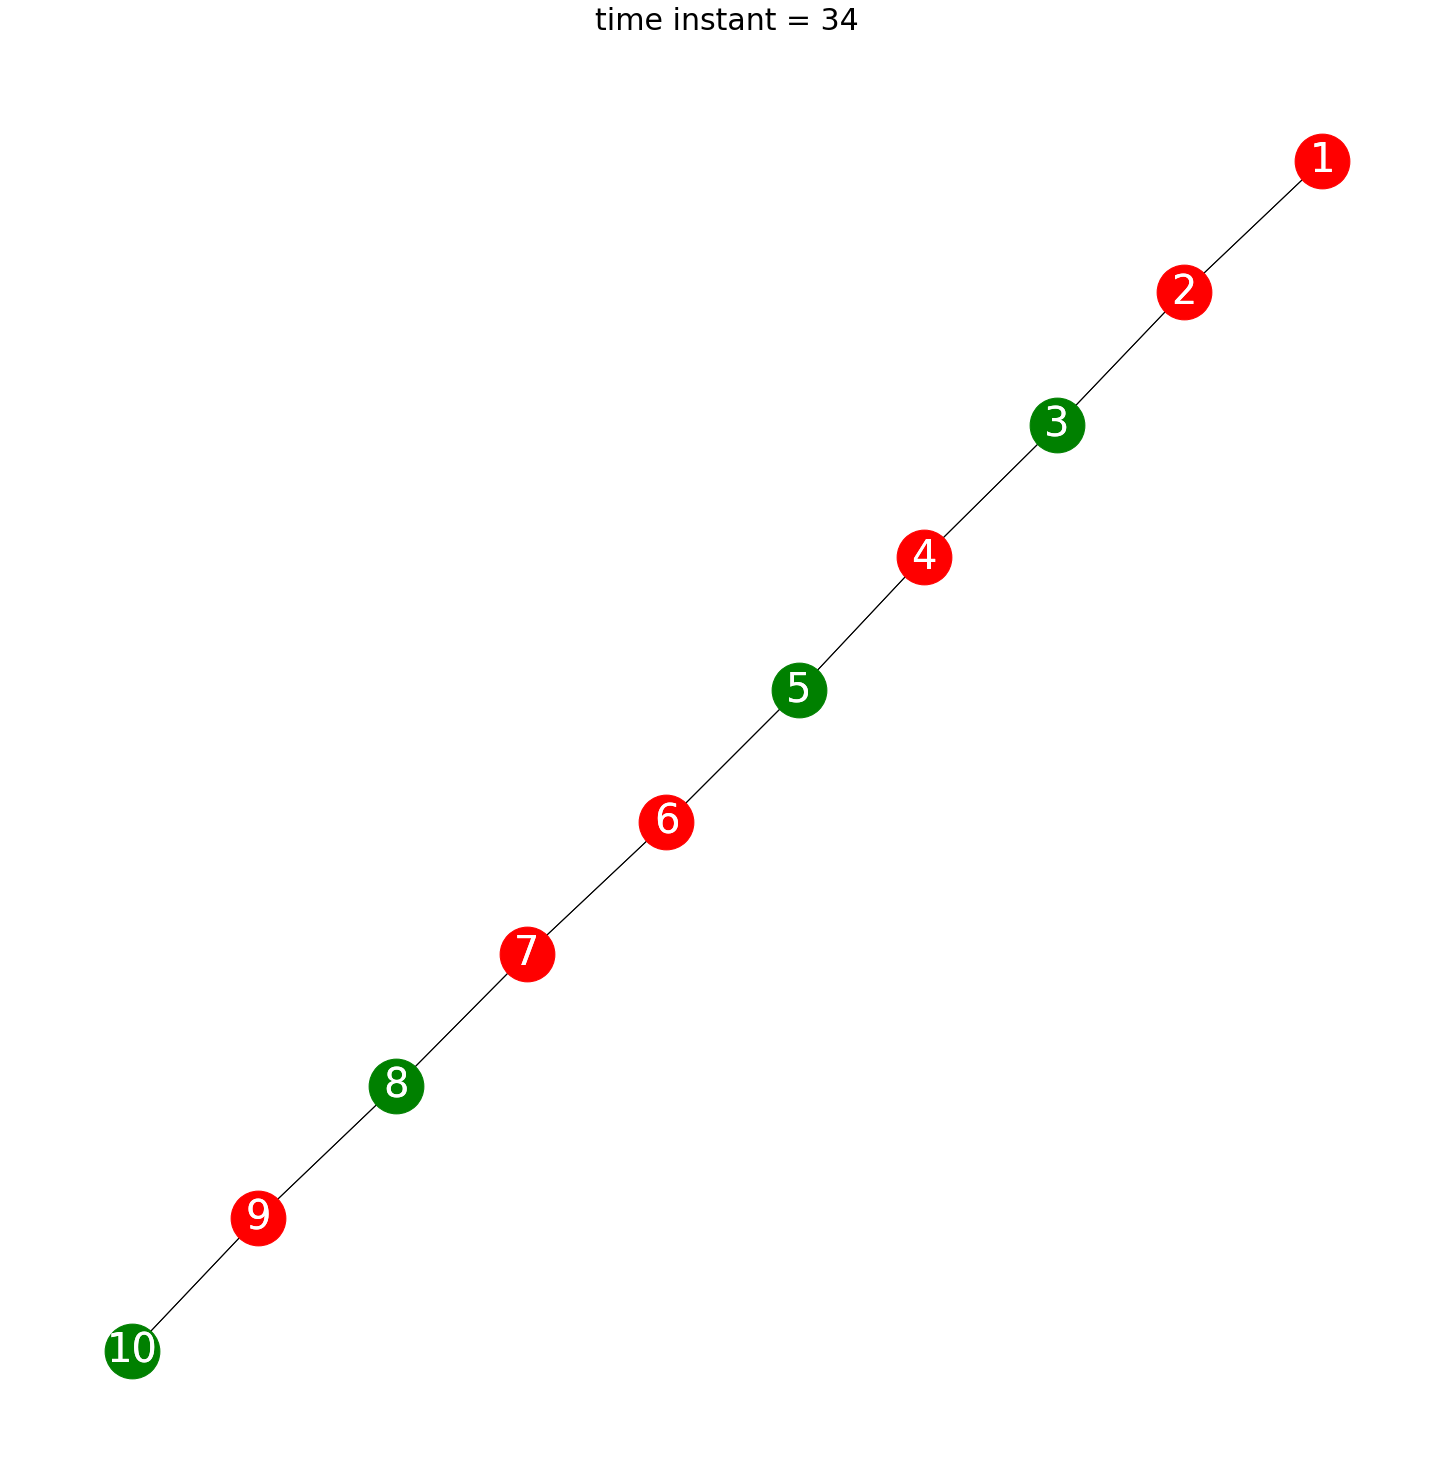

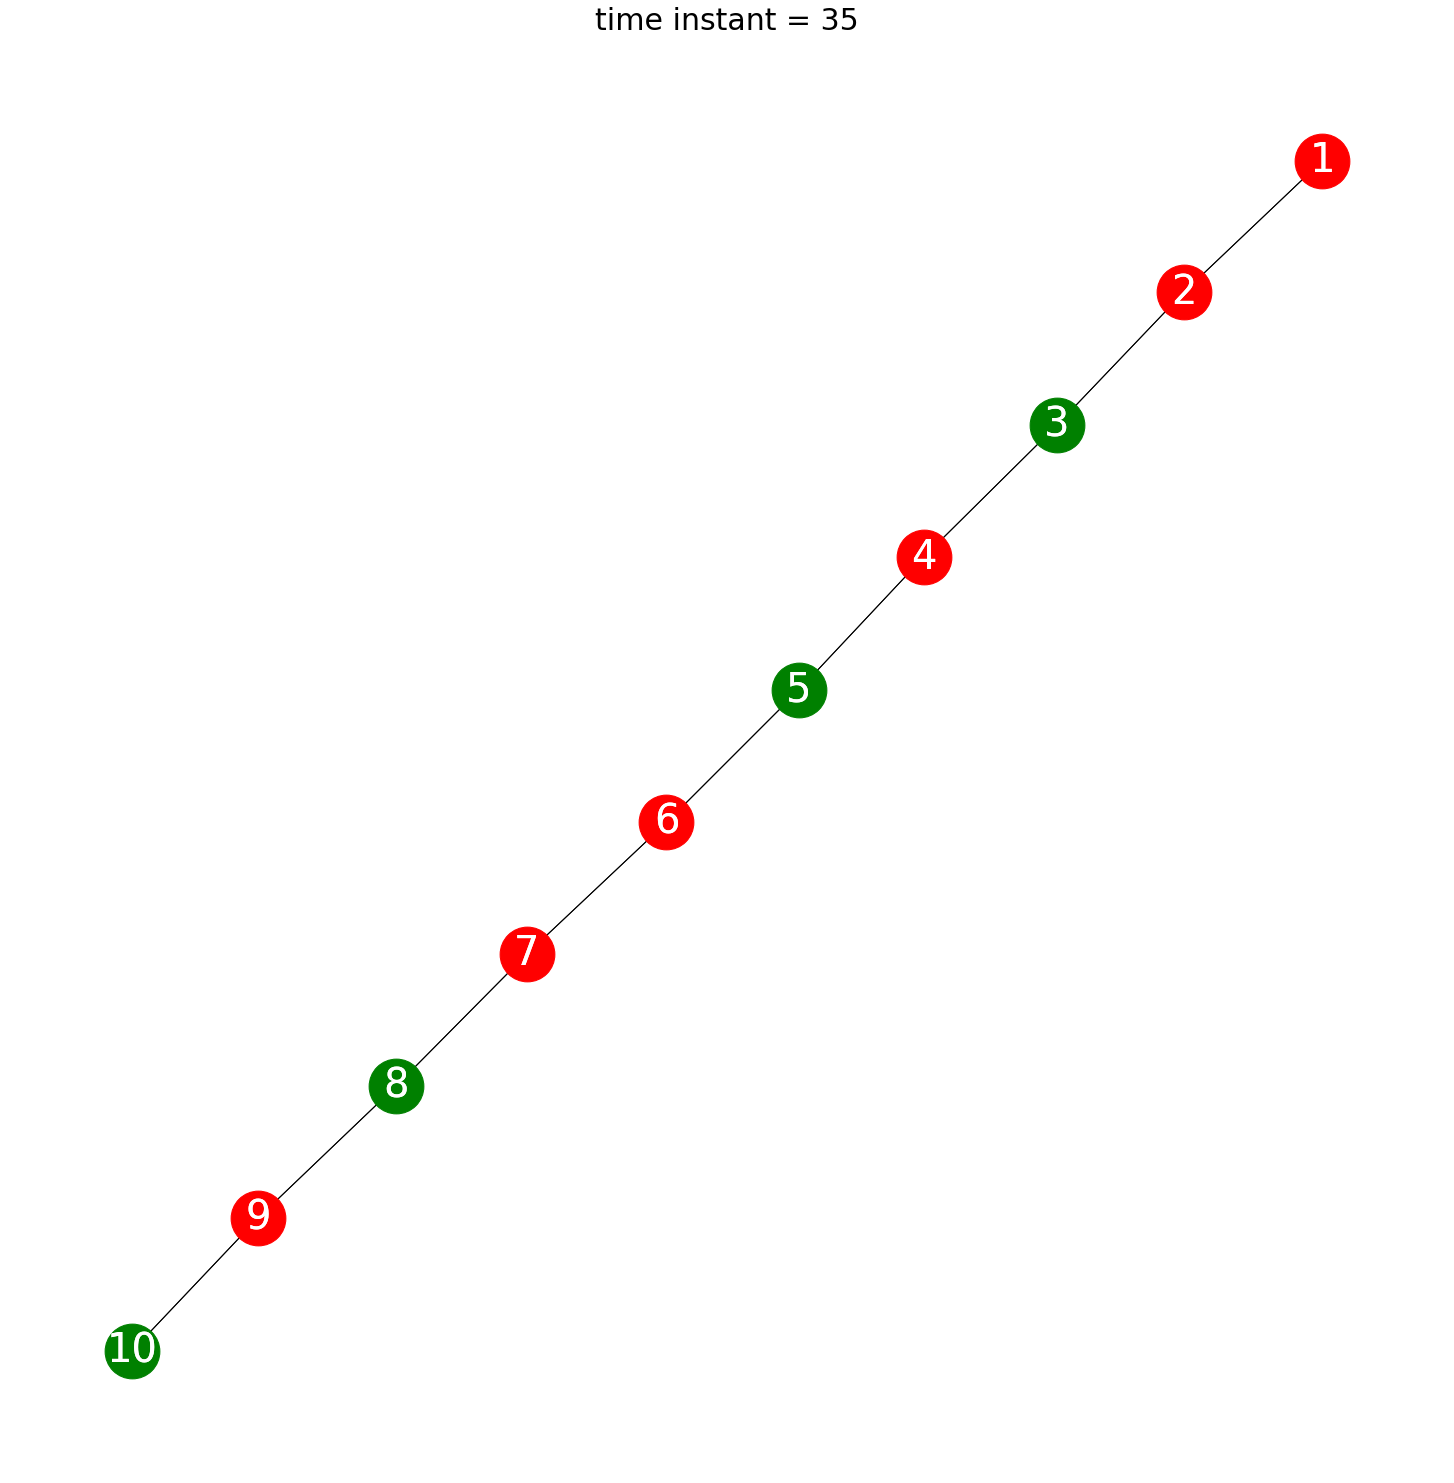

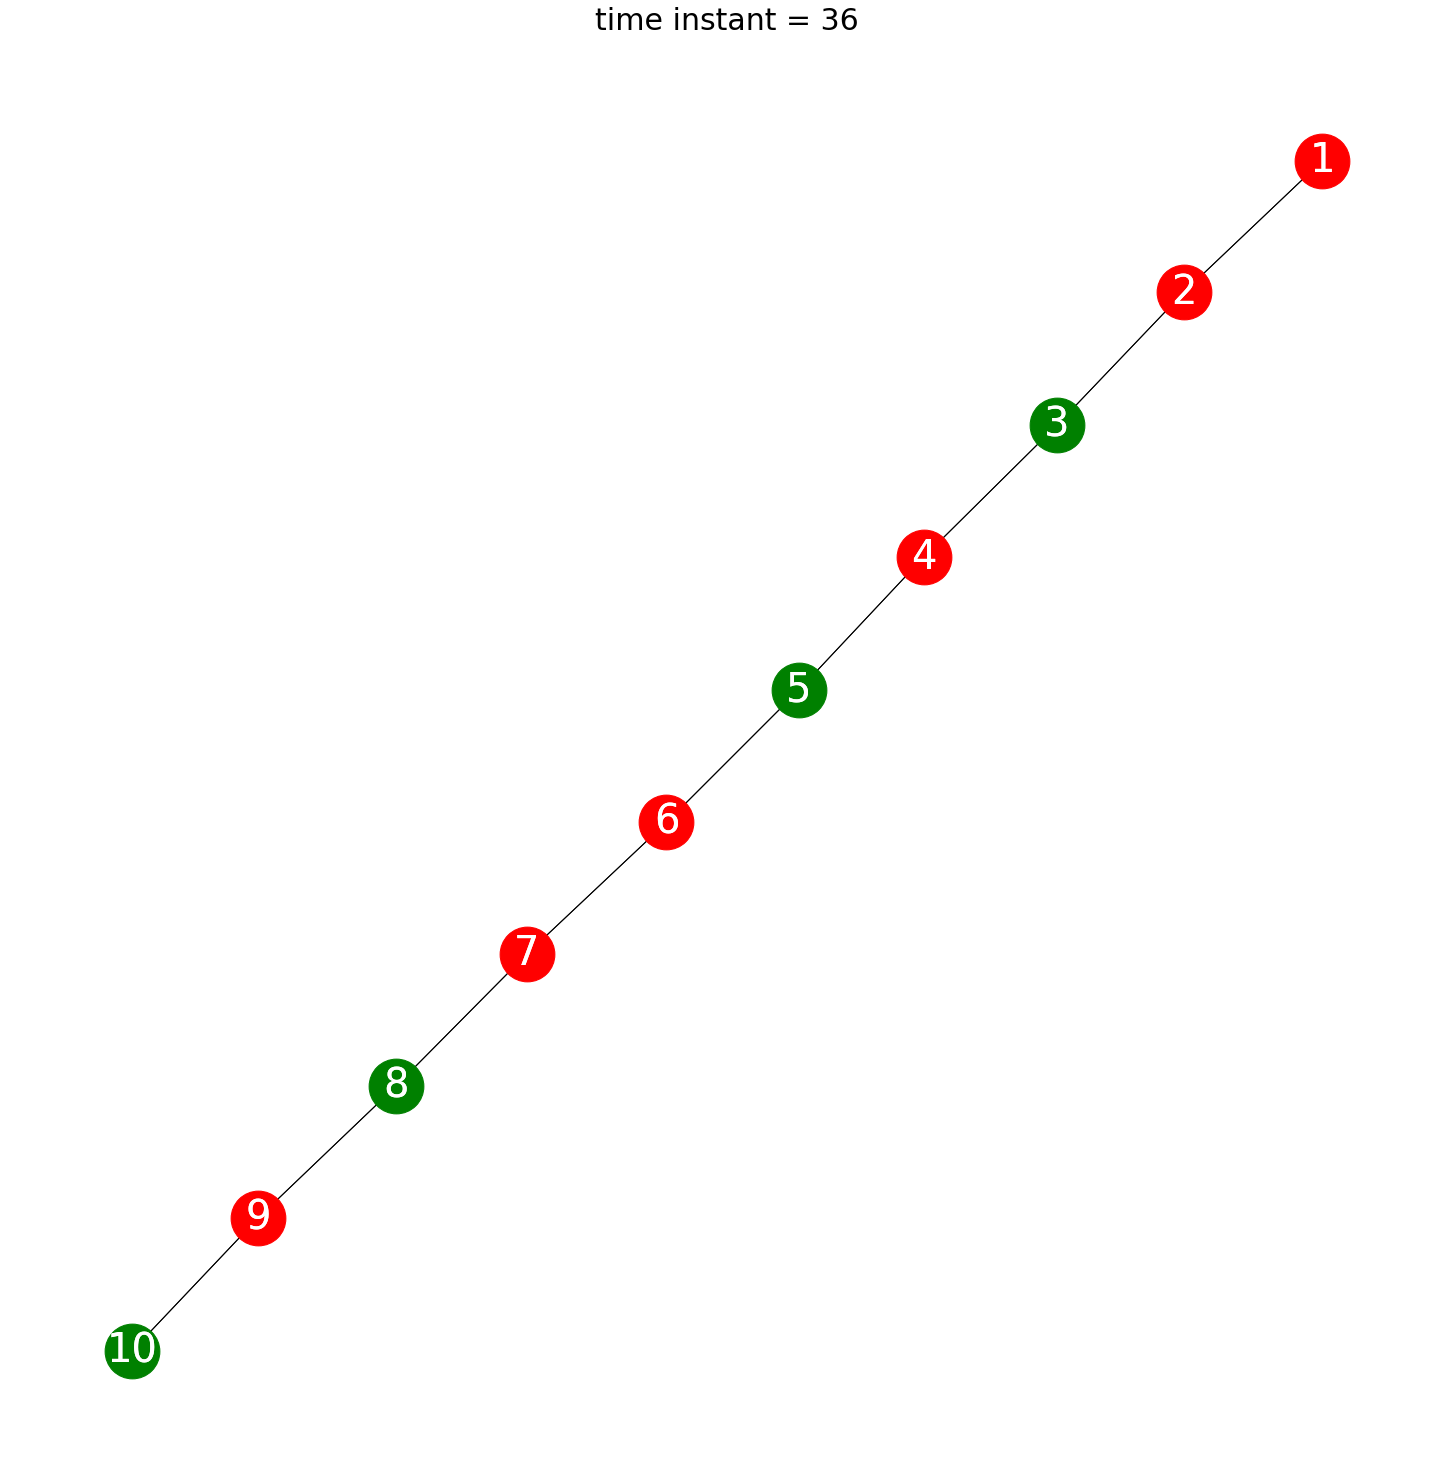

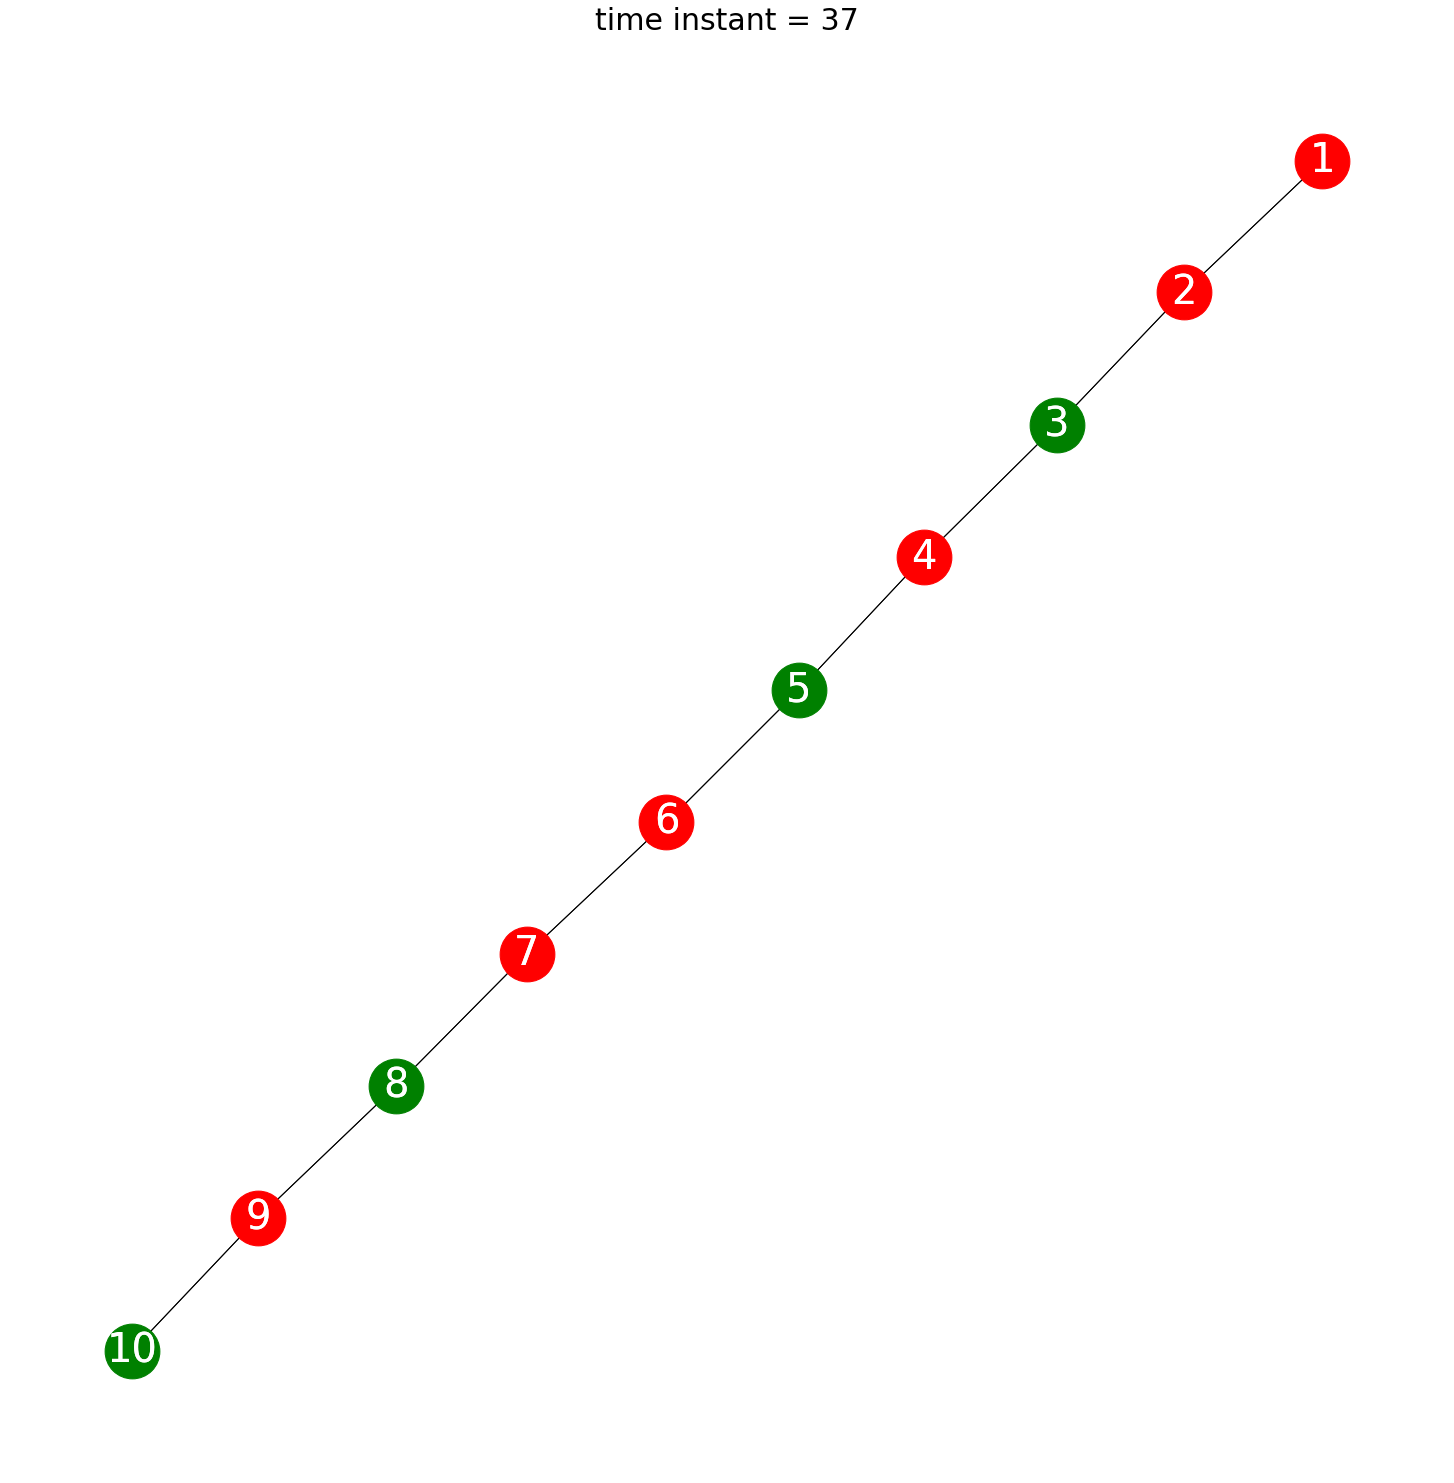

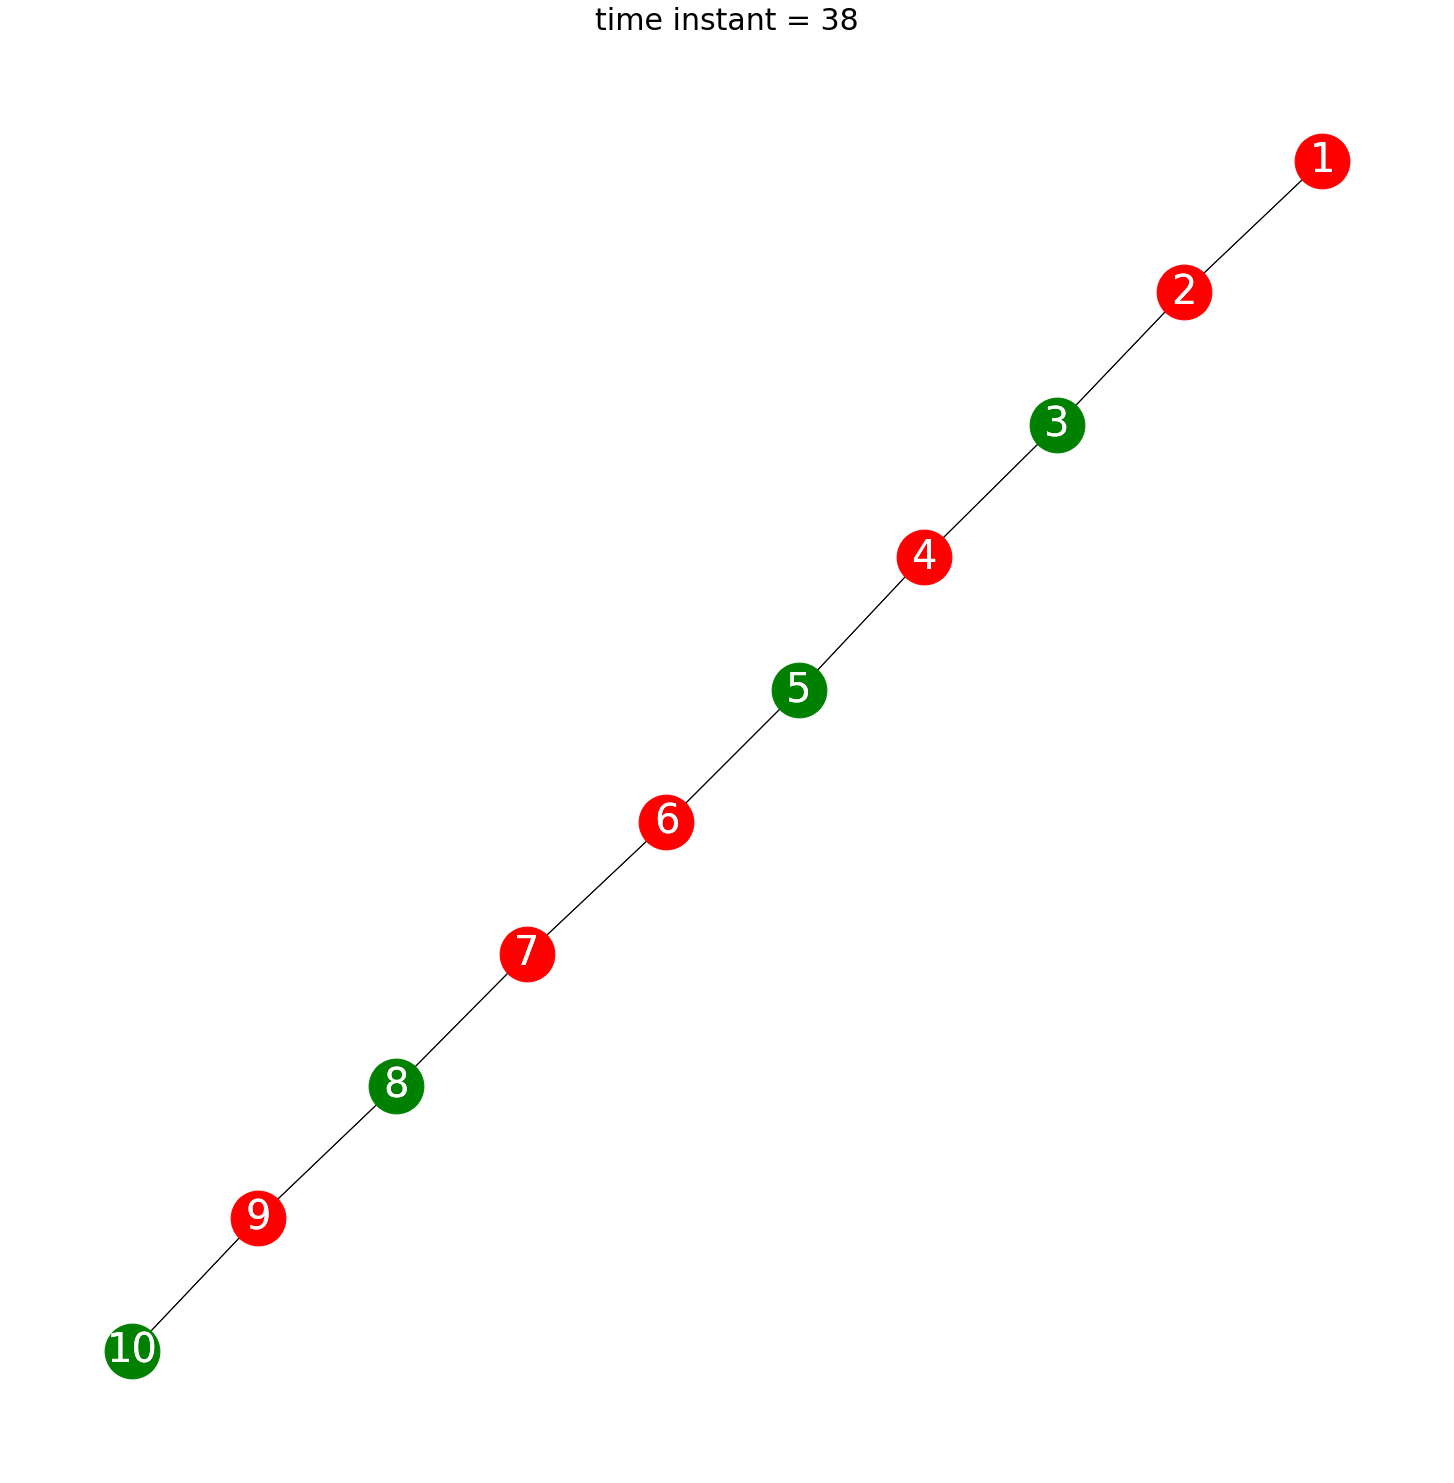

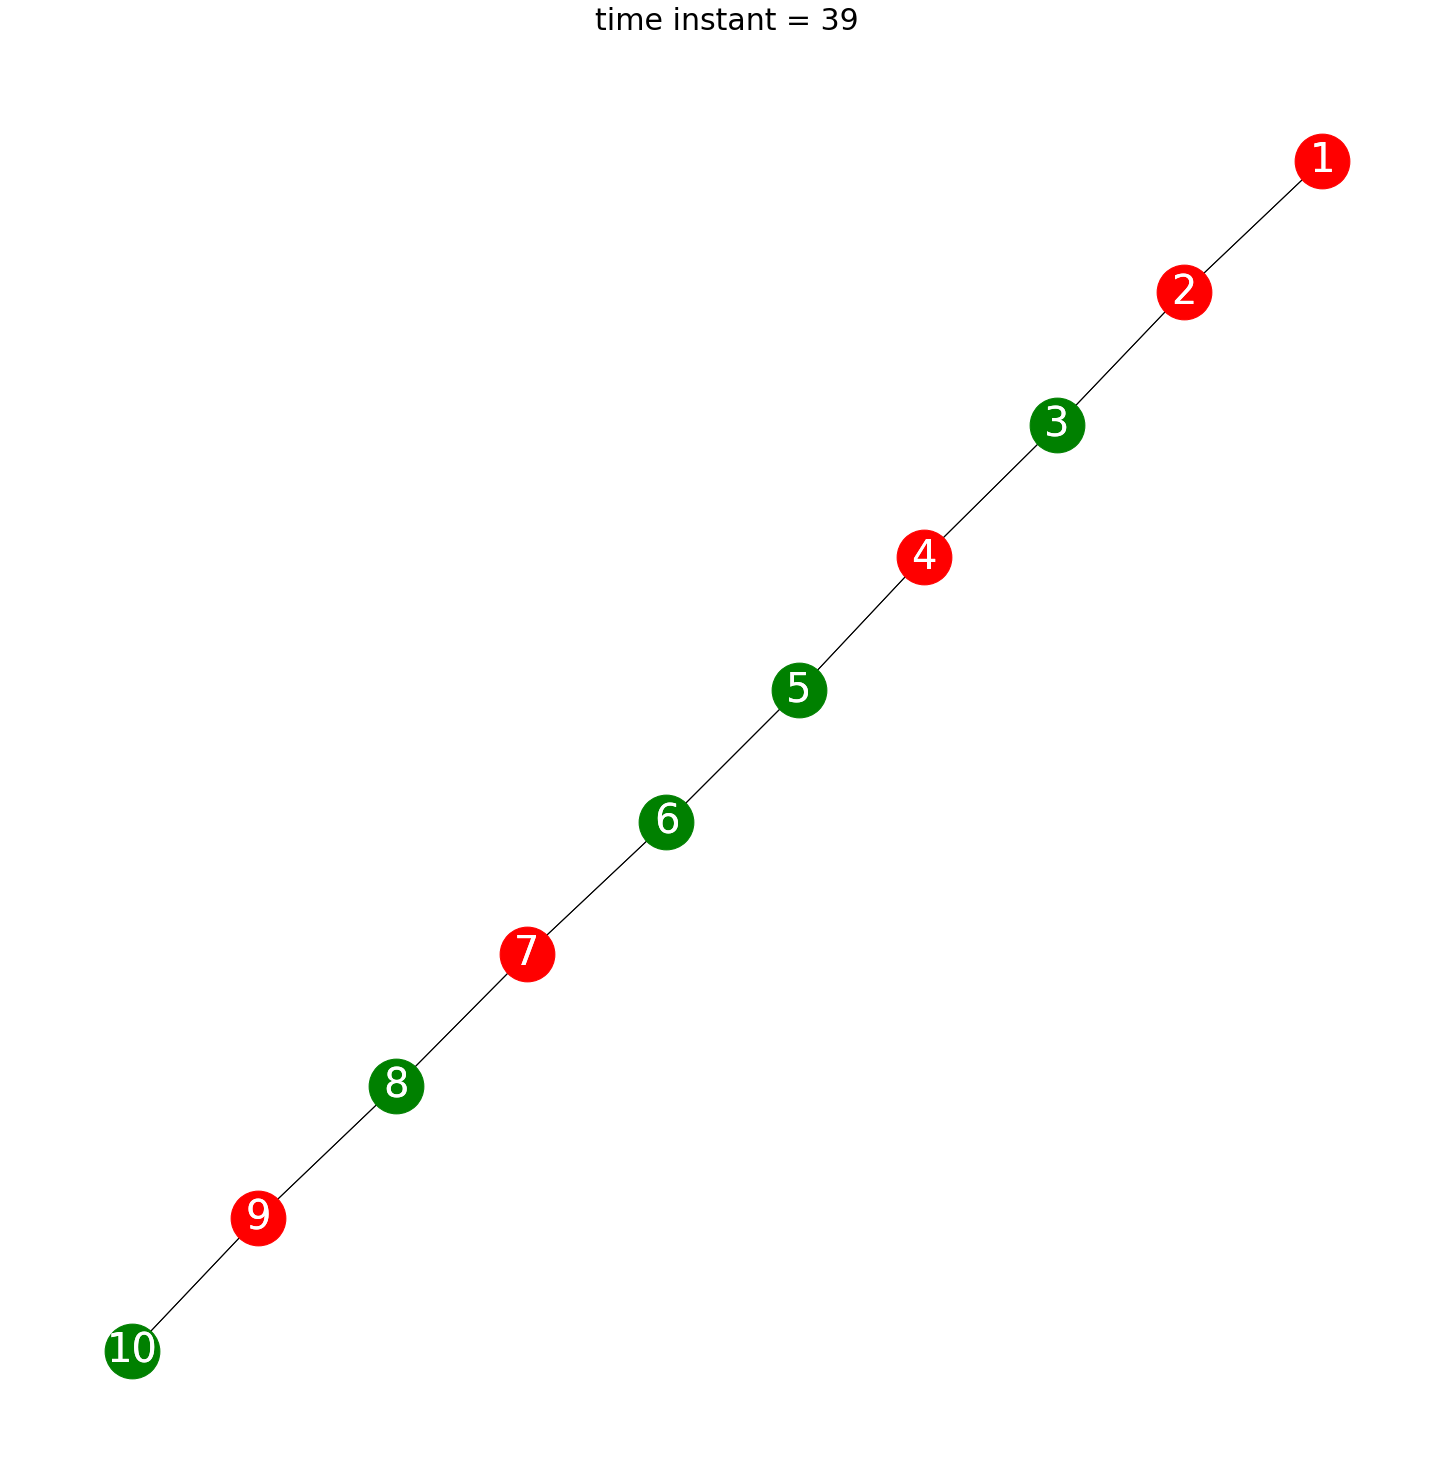

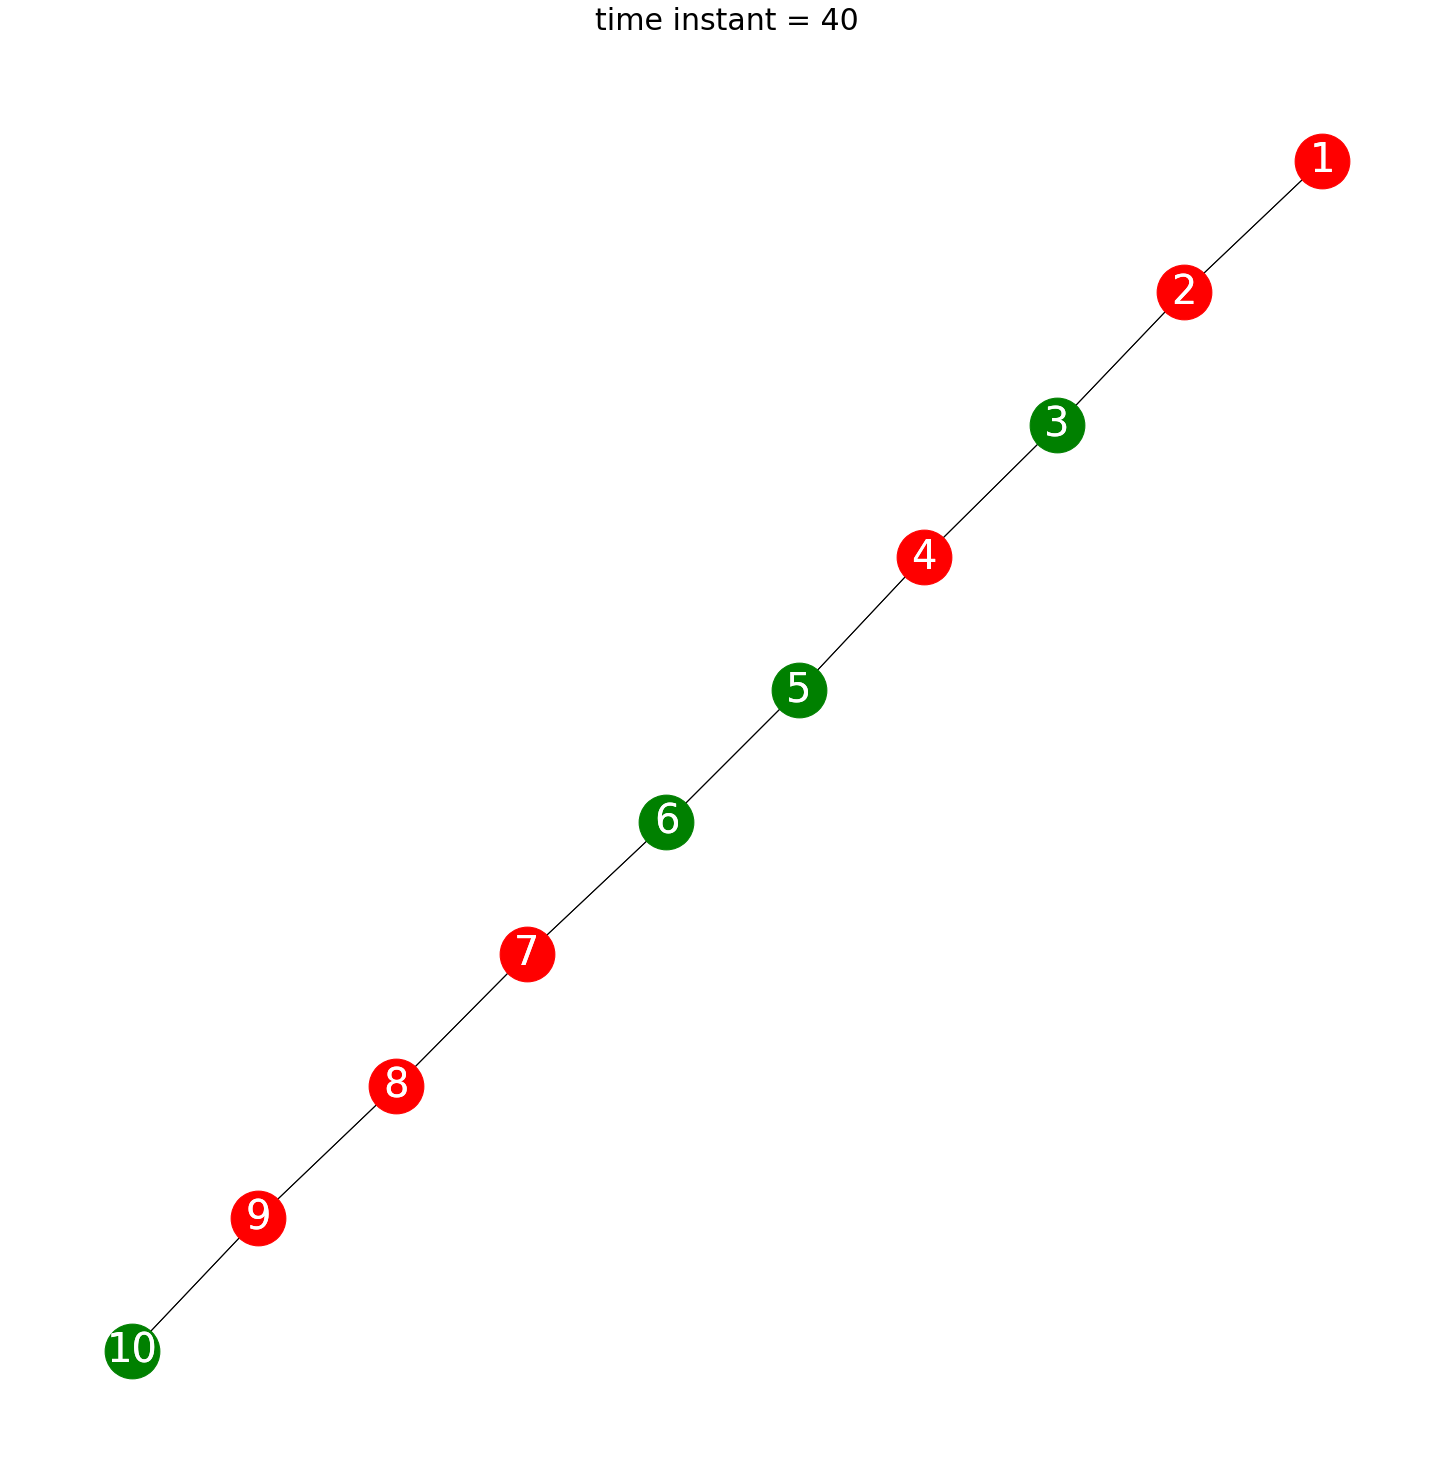

In [13]:
n_steps = t_final+1

# Plot the dynamics

C_rev = dict((v,k) for k,v in C.items())
pos = nx.kamada_kawai_layout(G)

for t in range(0,n_steps):
    fig = plt.figure(figsize=(20,20))
    x = states[t]
    for c in C_rev:
        nx.draw(G,
            pos = pos,
            with_labels=True,
            nodelist=(np.argwhere(x==c).T[0]+1).tolist(), # nodes start from 1
            node_color = C_rev[c],
            arrowsize=30, 
            node_size=3000,
            font_size=40, 
            font_color='white')
    plt.title('time instant = {0}'.format(t), fontsize=30)
    fig.savefig(img_dir + 'img ' + str(img_counter) + '.' + image_format, format=image_format, bbox_inches='tight')
    img_counter += 1

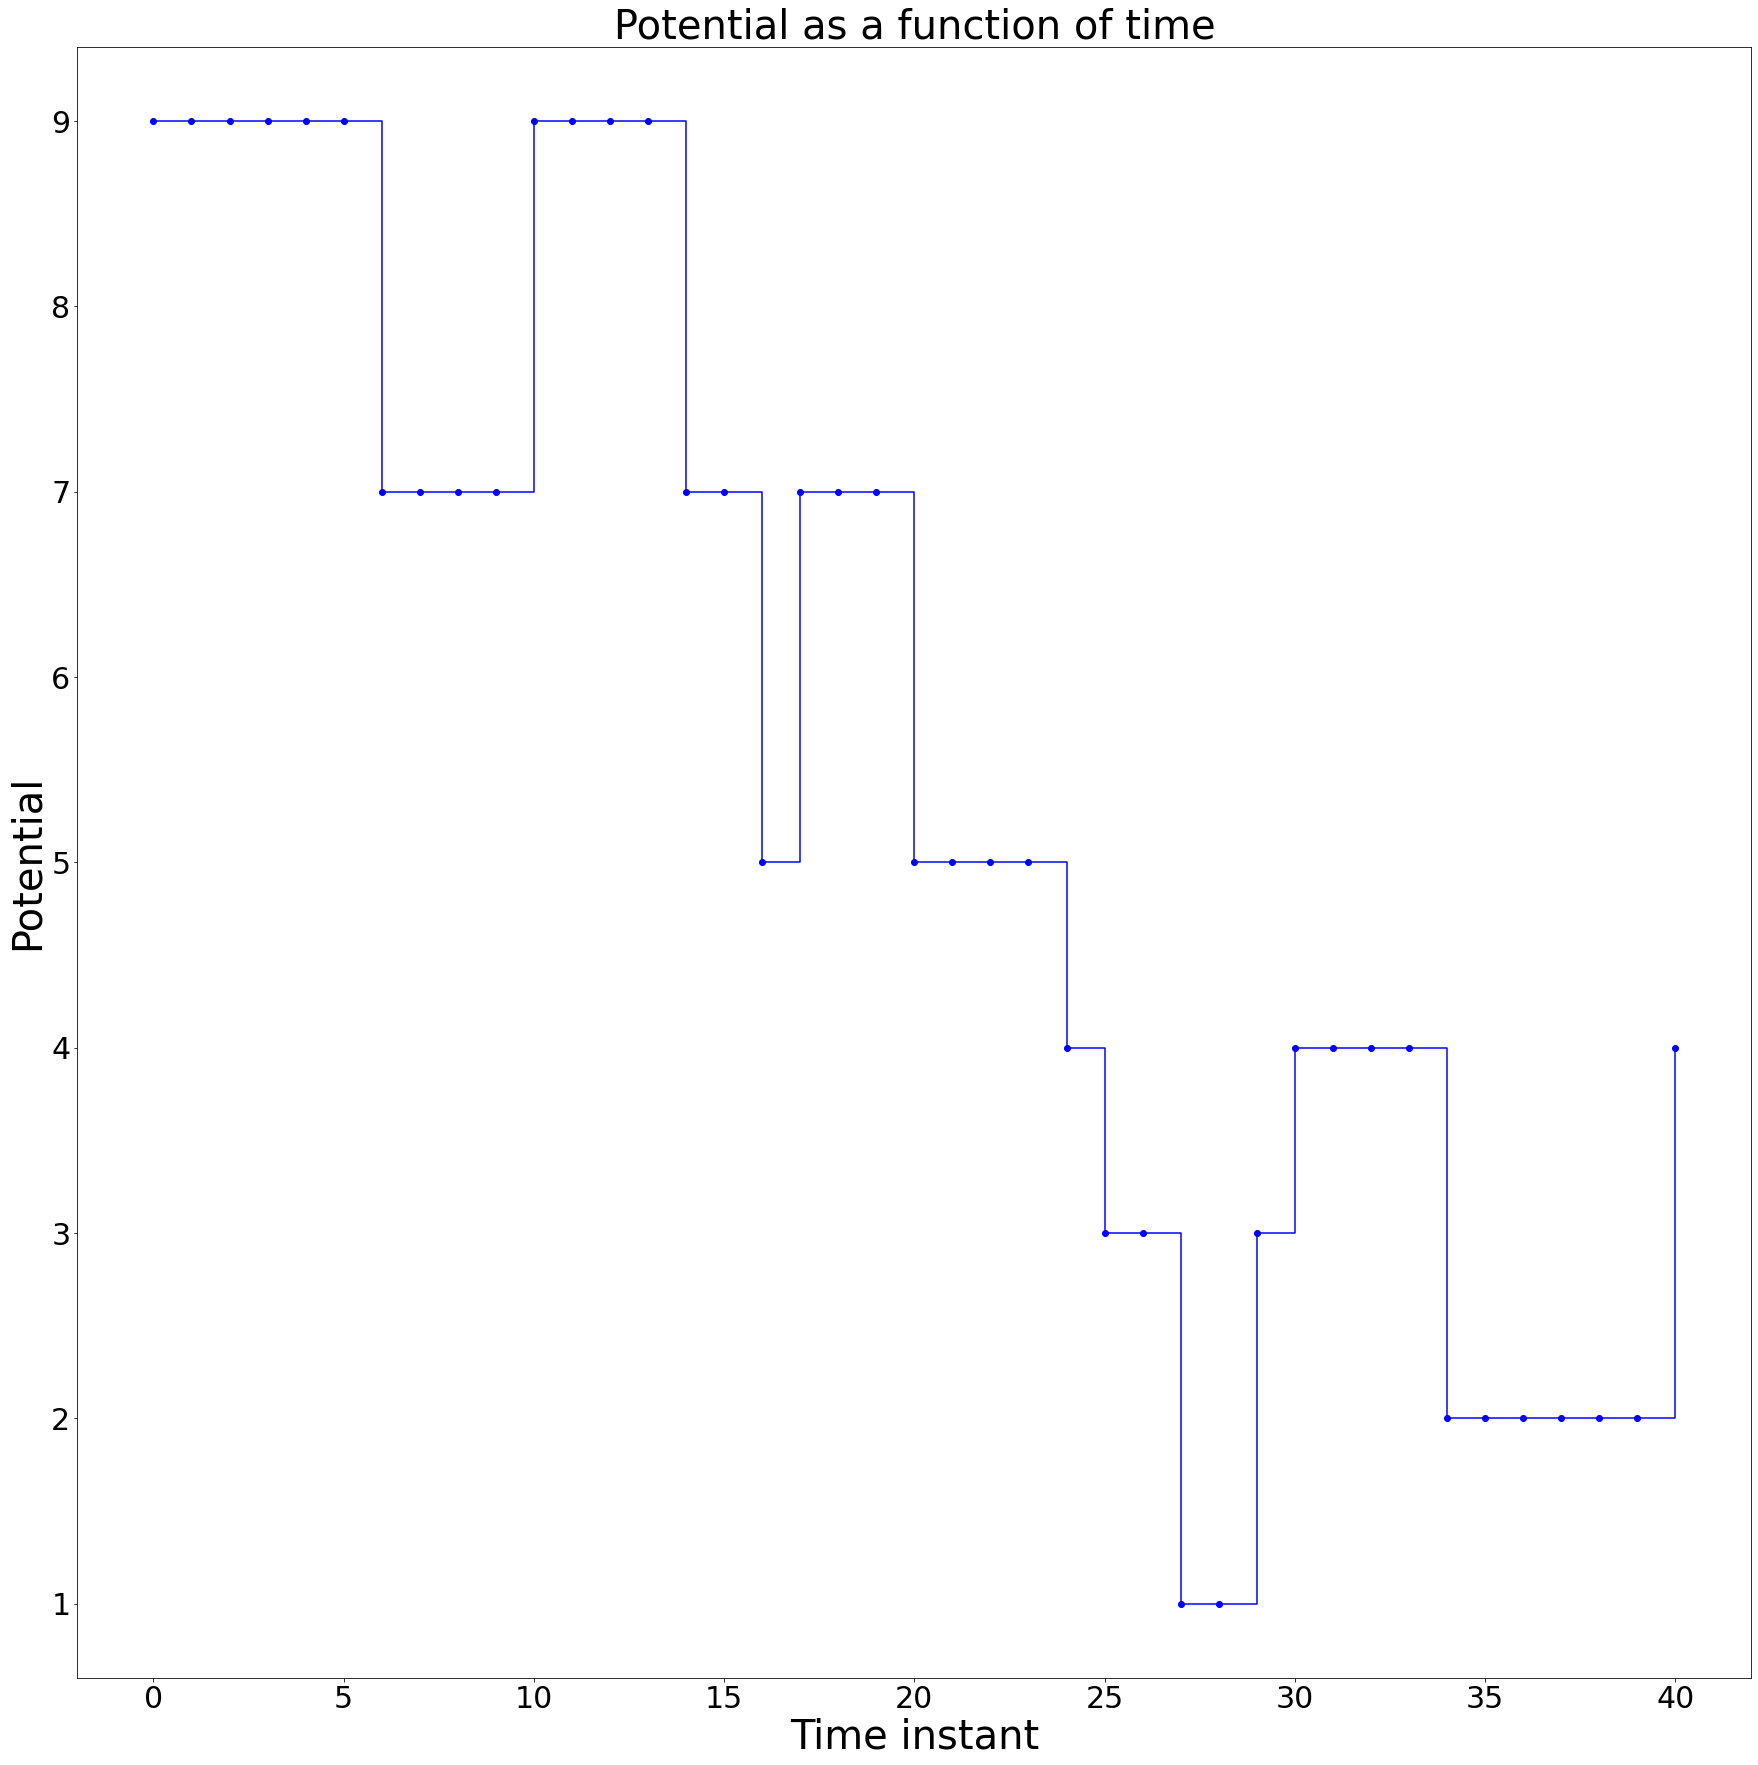

In [14]:
# Plot potential for each time instant

potentials = []
for t in range(0,t_final+1):
    x = states[t]
    pot = potential(x, W, cost)
    potentials.append(pot)

fig = plt.figure(figsize=(30, 30))
plt.step(potentials, 'bo-', where="post")

plt.title('Potential as a function of time', fontsize = 40)
plt.xlabel('Time instant', fontsize = 40)
plt.ylabel('Potential', fontsize = 40)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)

fig.savefig(img_dir + 'img ' + str(img_counter) + '.' + image_format, format=image_format)
img_counter += 1

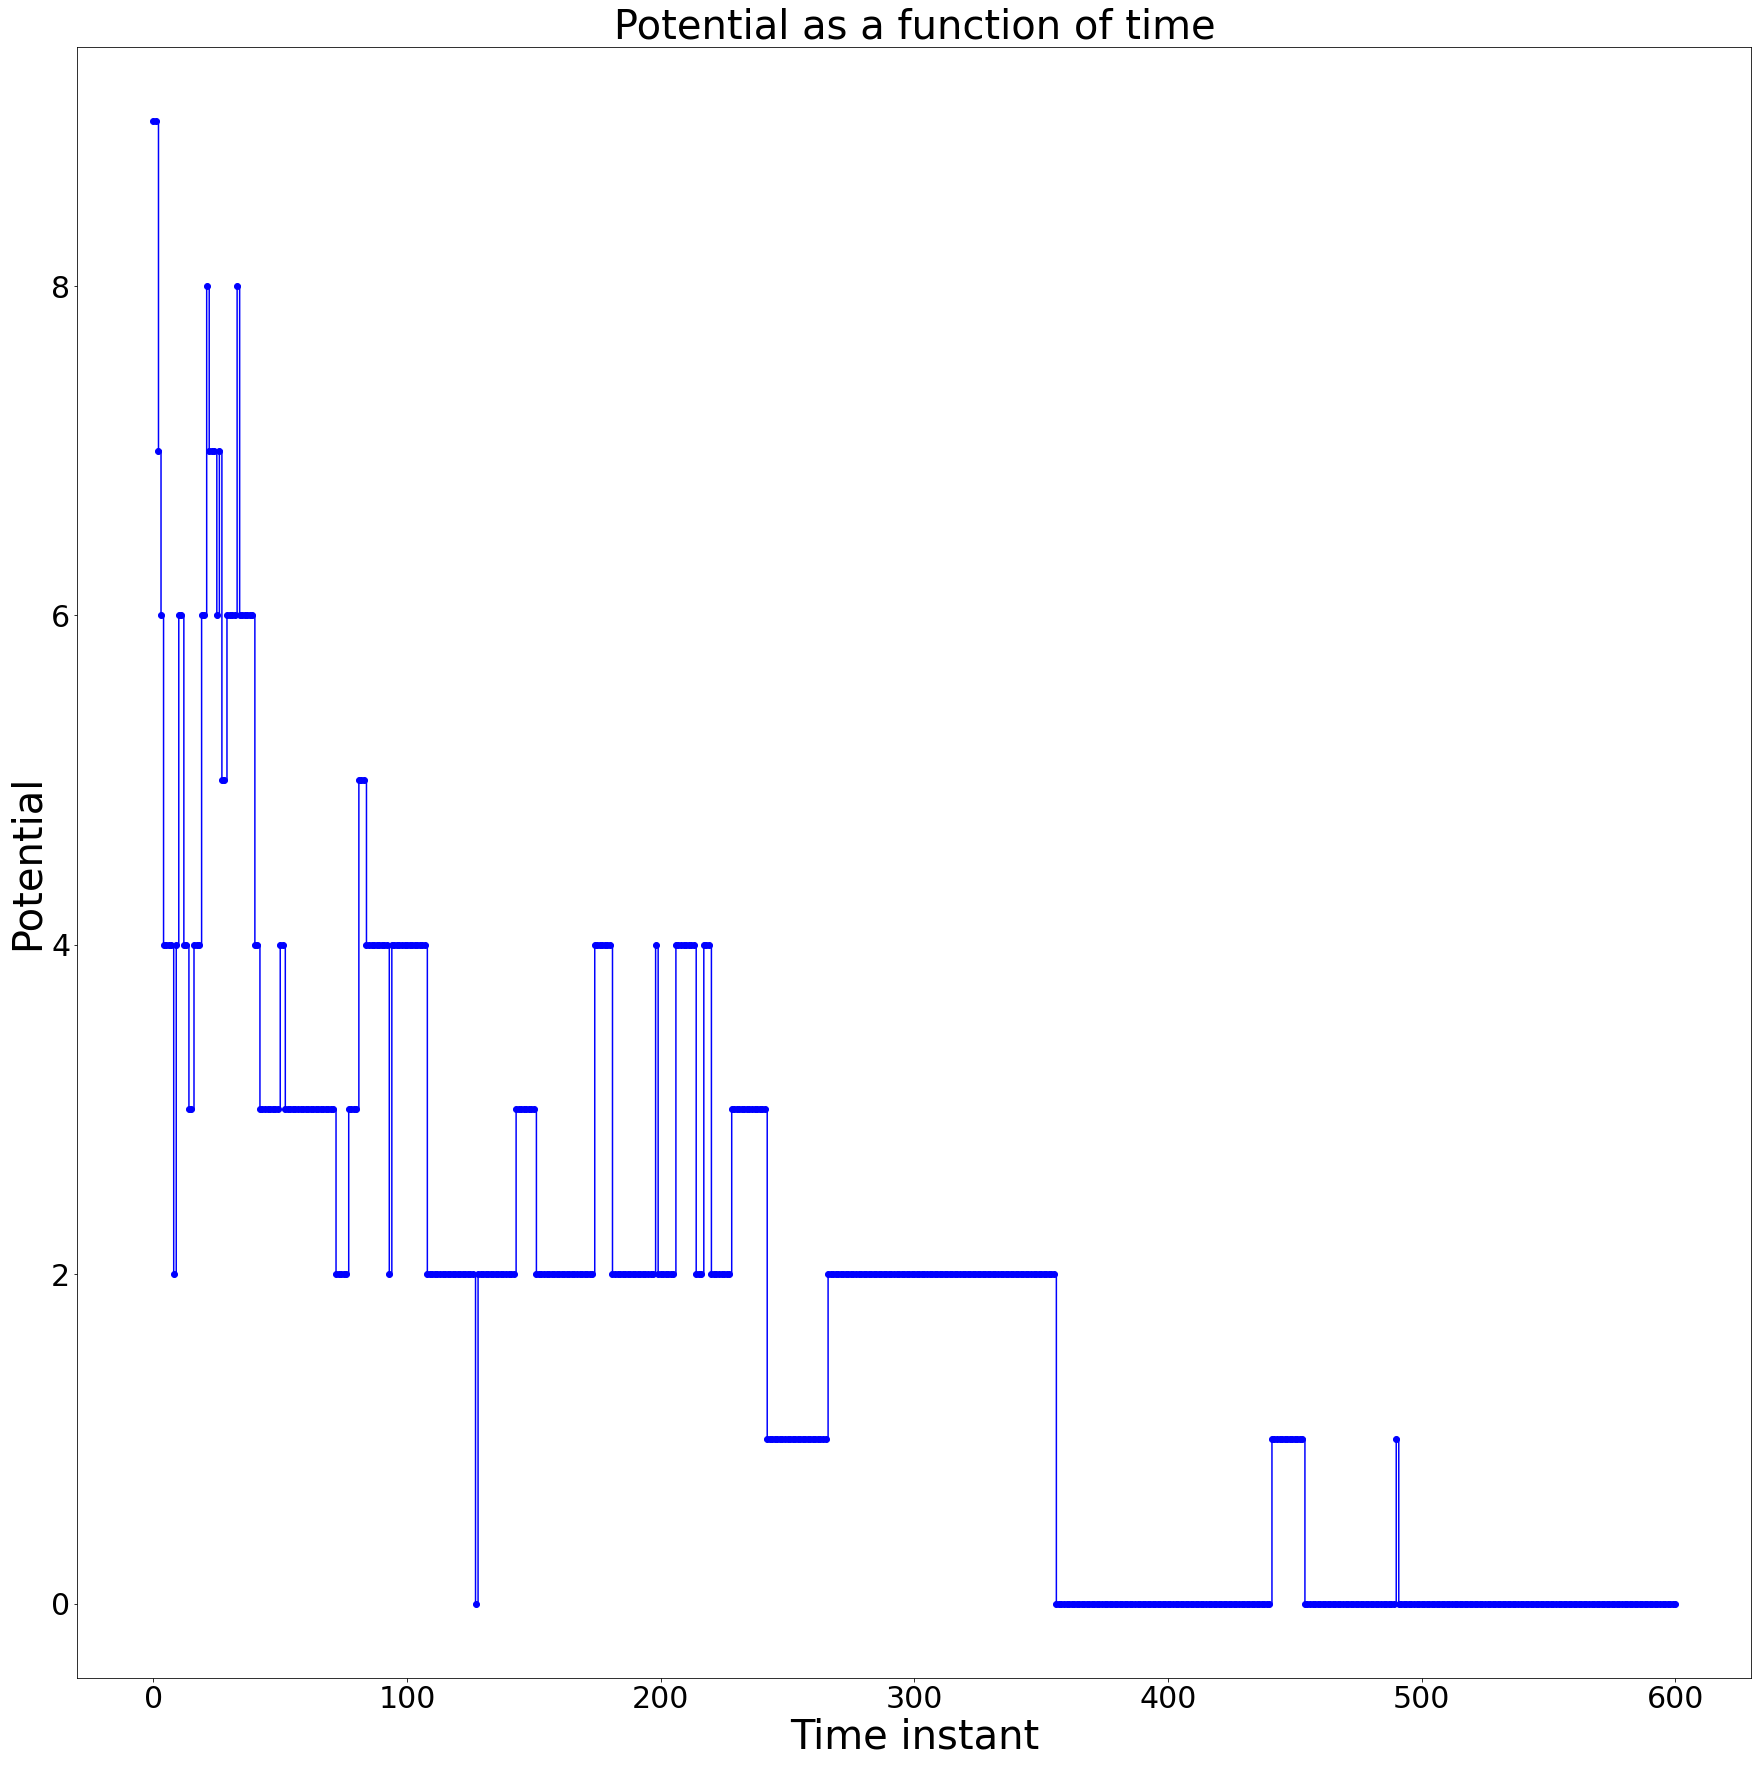

In [15]:
t_final = 600

# Plot potential for each time instant in a simulation with t_final = 600
states = simulate(C, W, initial_configuration, inv_noise, cost, t_final)

potentials = []
for t in range(0,t_final+1):
    x = states[t]
    pot = potential(x, W, cost)
    potentials.append(pot)

fig = plt.figure(figsize=(30, 30))
plt.step(potentials, 'bo-', where="post")

plt.title('Potential as a function of time', fontsize = 40)
plt.xlabel('Time instant', fontsize = 40)
plt.ylabel('Potential', fontsize = 40)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)

fig.savefig(img_dir + 'img ' + str(img_counter) + '.' + image_format, format=image_format)
img_counter += 1